# Analysing Diamonds

In this notebook I'm going to analyse diaomonds using machine learning to for instance calculate their price.

In [1]:
# First some setup
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
import numpy as np
from scipy.stats import sem
import seaborn as sns
import matplotlib.pyplot as plt

random_state = 4235109907 


def evaluate_cross_validation(clf, X, y, K):
    # Create a k-fold cross validation iterator of k=5 folds
    cv = KFold(K, shuffle=True, random_state=random_state)
    # By default the score used is the one returned by score method of the estimator (accuracy)
    scores = []
    for train, test in cv.split(X):
        clf.fit(X.iloc[train], y.iloc[train])
        y_pred = clf.predict(X.iloc[test])
        scores += [metrics.r2_score(y.iloc[test], y_pred)]
    # scores = cross_val_score(clf, X, y, cv=cv)
    print(scores)
    print("Mean score: {0:.3f}".format(np.mean(scores)))
    print("Standard error of the mean: (+/-{0:.3f})".format(sem(scores)))


def train_and_evaluate(clf, X_train, X_test, y_train, y_test):
    
    clf.fit(X_train, y_train)
    
    print("Accuracy on training set:")
    print(clf.score(X_train, y_train))
    print("Accuracy on testing set:")
    print(clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(metrics.confusion_matrix(y_test, y_pred))

In [2]:
# load the data-set

diamonds = pd.read_csv('MiniProject/diamonds.csv', sep=',')
diamonds.columns = ["id", "carat", "cut", "color", "clarity", "depth", "table", "price", "x", "y", "z"]

print(diamonds.dtypes)
diamonds[:10]

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object


,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
cut = pd.get_dummies(diamonds['cut'])
color = pd.get_dummies(diamonds['color'])
clarity = pd.get_dummies(diamonds['clarity'])

diamonds_hot = diamonds.join(cut).join(color).join(clarity)
print(diamonds_hot.columns)
diamonds_hot

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price',
       'x', 'y', 'z', 'Fair', 'Good', 'Ideal', 'Premium', 'Very Good', 'D',
       'E', 'F', 'G', 'H', 'I', 'J', 'I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2',
       'VVS1', 'VVS2'],
      dtype='object')


,id,carat,cut,color,clarity,depth,table,price,x,y,...,I,J,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,...,0,1,0,0,0,1,0,0,0,0
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,...,0,1,0,0,0,0,0,0,0,1
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,...,1,0,0,0,0,0,0,0,1,0
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,...,0,0,0,0,1,0,0,0,0,0
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,...,0,0,0,0,0,0,0,1,0,0
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# map cut, color and clarity

diamonds['old_cut'] = diamonds['cut']
diamonds['cut'] = diamonds['cut'].map({
    'Fair': 0,  # worst
    'Good': 1,
    'Very Good': 2,
    'Premium': 3,
    'Ideal': 4  # best
})

diamonds['old_color'] = diamonds['color']
diamonds['color'] = diamonds['color'].map(
    {
        'J': 0,  # worst
        'I': 1,
        'H': 2,
        'G': 3,
        'F': 4,
        'E': 5,
        'D': 6  # best
    }
)

diamonds['old_clarity'] = diamonds['clarity']
diamonds['clarity'] = diamonds['clarity'].map(
    {
        'I3': 0,  # worst
        'I2': 1,
        'I1': 2,
        'SI2': 3,
        'SI1': 4,
        'VS2': 5,
        'VS1': 6,
        'VVS2': 7,
        'VVS1': 8,
        'IF': 9,
        'FL': 10  # best
    }
)

diamonds[:10]

,id,carat,cut,color,clarity,depth,table,price,x,y,z,old_cut,old_color,old_clarity
0,1,0.23,4,5,3,61.5,55.0,326,3.95,3.98,2.43,Ideal,E,SI2
1,2,0.21,3,5,4,59.8,61.0,326,3.89,3.84,2.31,Premium,E,SI1
2,3,0.23,1,5,6,56.9,65.0,327,4.05,4.07,2.31,Good,E,VS1
3,4,0.29,3,1,5,62.4,58.0,334,4.20,4.23,2.63,Premium,I,VS2
4,5,0.31,1,0,3,63.3,58.0,335,4.34,4.35,2.75,Good,J,SI2
5,6,0.24,2,0,7,62.8,57.0,336,3.94,3.96,2.48,Very Good,J,VVS2
6,7,0.24,2,1,8,62.3,57.0,336,3.95,3.98,2.47,Very Good,I,VVS1
7,8,0.26,2,2,4,61.9,55.0,337,4.07,4.11,2.53,Very Good,H,SI1
8,9,0.22,0,5,5,65.1,61.0,337,3.87,3.78,2.49,Fair,E,VS2
9,10,0.23,2,2,6,59.4,61.0,338,4.00,4.05,2.39,Very Good,H,VS1


## Analysis
Now the preperation is done, the analysis can begin.  
The dataset fully consists out of numbers and is ready to be trained up on.

First try to calculate the price

In [10]:
y = diamonds['price']
X = diamonds[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
X_hot = diamonds_hot.copy()
del X_hot['color']
del X_hot['cut']
del X_hot['clarity']
del X_hot['price']
del X_hot['id']

### WARNING! Do not run the following block if you do not need to. It takes a long time

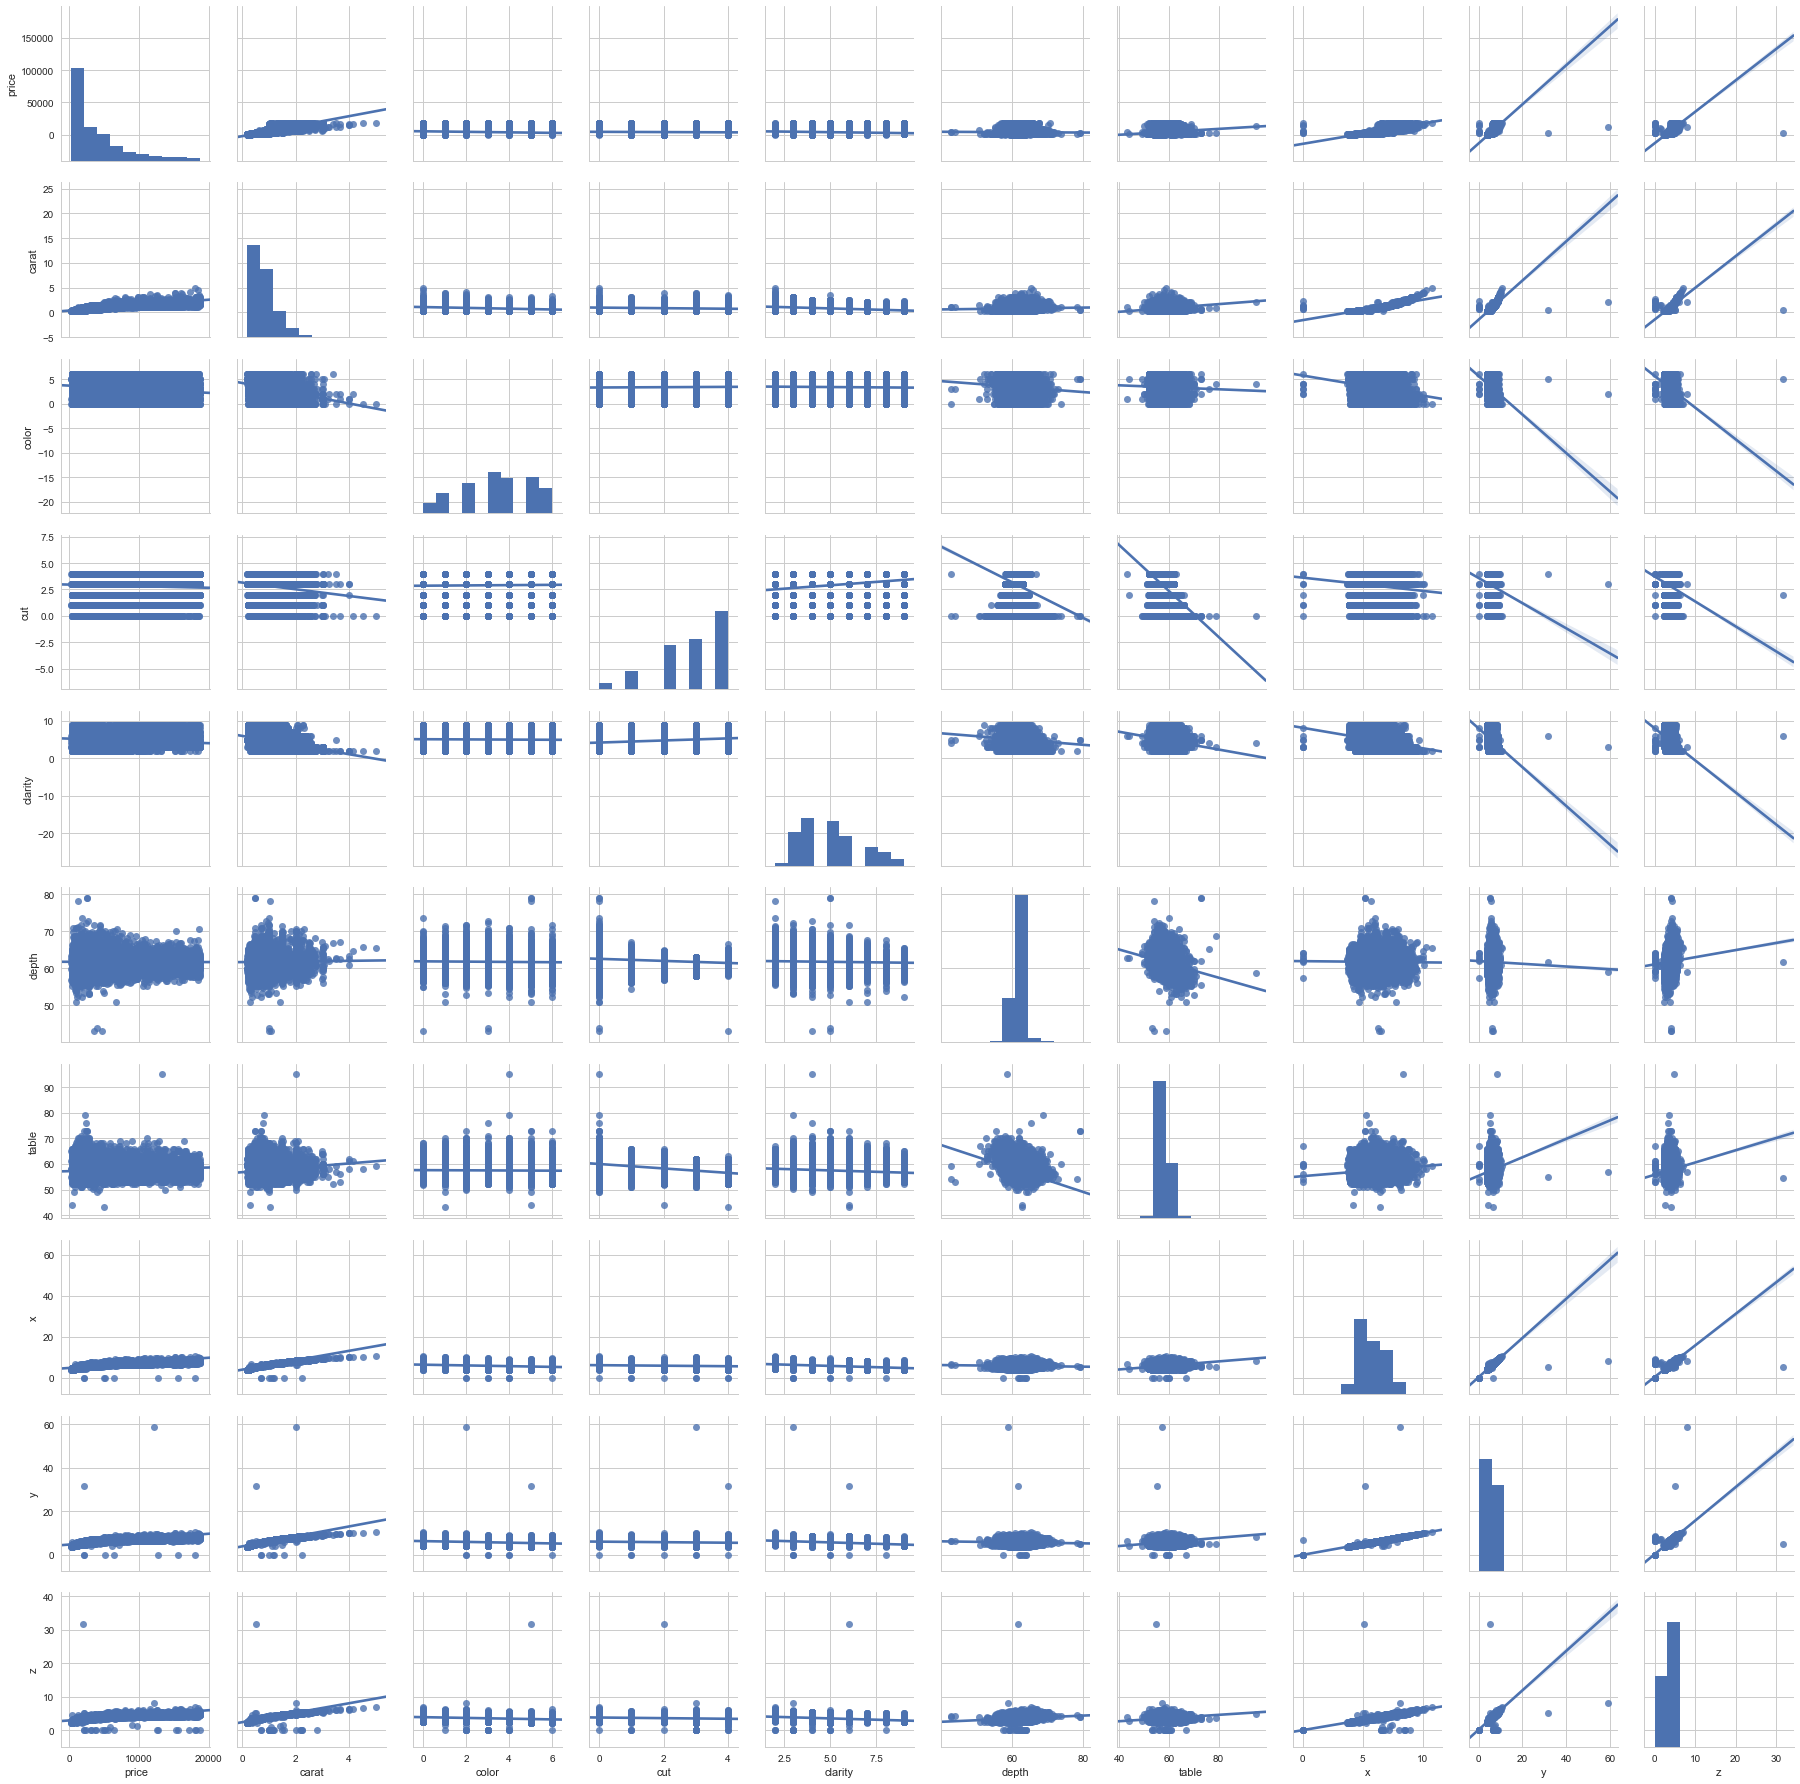

In [6]:
sns.set(style='whitegrid', context='notebook')
sns.pairplot(diamonds, kind='reg', vars=['price', 'carat', 'color', 'cut', 'clarity', 'depth', 'table', 'x', 'y', 'z'], size=2.5)
plt.show()

In the previous graph you can see that carat, x, y and z have the bigest infuence on the price.  
Table and depth do not seem to infuence it.

cut, color and clarity seem to not influence the price on it's own, but maybe combined it does.  
Let's check!

In [27]:
diamonds['quality'] = diamonds['cut'] * diamonds['color'] * diamonds['clarity']
diamonds['cutcolor'] = diamonds['cut'] * diamonds['color']
diamonds['colorclarity'] = diamonds['color'] * diamonds['clarity']
diamonds['cutclarity'] = diamonds['cut'] * diamonds['clarity']

plt.clf()
sns.pairplot(diamonds, kind='scatter', x_vars=['cutcolor', 'colorclarity', 'cutclarity', 'quality'], y_vars=['price'], size=2.5)
plt.show()

# Correlation
x, y and z seem to be coralated to carat, as they should be.  
Carat is the weight of the diamond, and that is relative to it's size.

What is weird is that table and depth are not realy correlated, while they are derrived from x, y and z.

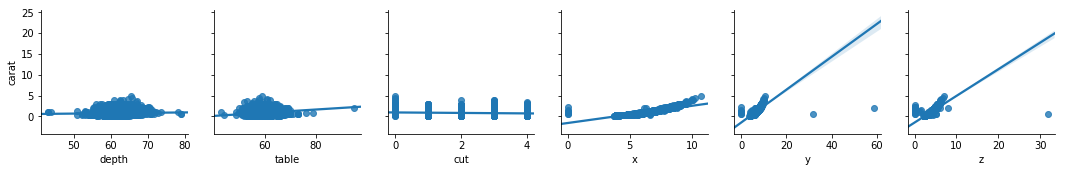

In [7]:
plt.clf()
sns.pairplot(diamonds, kind='reg', x_vars=['depth', 'table', 'cut', 'x', 'y', 'z'], y_vars=['carat'], size=2.5)
plt.show()

# Let's test a discision tree

As a dicsision tree seems to be the best option because of how diamonds are priced.  
See for instance http://www.diamonds.net/Prices/RapaportPriceGuide.aspx


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_state)

In [ ]:
# example of GirdSearchCV used to find the best parameters:
gs = GridSearchCV(tree.DecisionTreeClassifier(criterion='entropy'), 
                  {'max_depth': np.arange(22, 27), 'min_samples_leaf': np.arange(3, 7)})
gs.fit(X_train, y_train)

print(gs.best_params_)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=24, min_samples_leaf=5)

evaluate_cross_validation(clf, X, y, 5)

pred_y = clf.predict(X)

An accuracy of at leas 89%, that's amazing!  
But a 89% accuracy for a price is not the best.  
Let's see what the actual predictions are:

In [8]:
total = X.copy()
total['actual'] = y
total['predict'] = pred_y
total['delta'] = (y - pred_y).abs()
total[:20]

,carat,cut,color,clarity,depth,table,x,y,z,actual,predict,delta
0,0.23,4,5,3,61.5,55.0,3.95,3.98,2.43,326,548,222
1,0.21,3,5,4,59.8,61.0,3.89,3.84,2.31,326,386,60
2,0.23,1,5,6,56.9,65.0,4.05,4.07,2.31,327,357,30
3,0.29,3,1,5,62.4,58.0,4.20,4.23,2.63,334,334,0
4,0.31,1,0,3,63.3,58.0,4.34,4.35,2.75,335,363,28
5,0.24,2,0,7,62.8,57.0,3.94,3.96,2.48,336,449,113
6,0.24,2,1,8,62.3,57.0,3.95,3.98,2.47,336,449,113
7,0.26,2,2,4,61.9,55.0,4.07,4.11,2.53,337,434,97
8,0.22,0,5,5,65.1,61.0,3.87,3.78,2.49,337,357,20
9,0.23,2,2,6,59.4,61.0,4.00,4.05,2.39,338,357,19


The distance between the acutal and the prediction is sometimes prety close.  
But often it is quite a ways away. On avarage 0 or 50 difference, and I saw a case where it was at least 1000 euro to few.  
Let's try something else then.

# Random Forest
Looking around on Kaggle, Random Forest seems to have good results.  
Let's see if we can reproduce that.

_I tried to use GirdSearch on this one, but it took increadibly long and didn't even finish._

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(max_depth=24, n_estimators=10, min_samples_leaf=5, random_state=random_state)

evaluate_cross_validation(rf_clf, X_hot, y, 5)

[0.9251593882407545, 0.90988482905940393, 0.92191921302904567, 0.92291686920553129, 0.92496116808634532]
Mean score: 0.921
Standard error of the mean: (+/-0.003)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

rf_clf.fit(X_train, y_train)

pred_y = rf_clf.predict(X_test)

total = X_test.copy()
total['actual'] = y_test
total['predict'] = pred_y
total['delta'] = (y_test - pred_y).abs()
total[:20]

,carat,cut,color,clarity,depth,table,x,y,z,actual,predict,delta
19932,1.08,4,6,5,61.9,58.0,6.54,6.57,4.06,8481,8451,30
10661,1.20,3,0,4,60.6,59.0,6.88,6.84,4.16,4838,4717,121
31870,0.30,3,2,7,61.5,58.0,4.30,4.28,2.64,776,684,92
15424,1.01,3,6,4,62.0,60.0,6.40,6.37,3.96,6176,5939,237
50485,0.70,3,3,3,58.0,60.0,5.91,5.88,3.42,2268,2268,0
33309,0.41,1,5,6,62.8,58.0,4.67,4.70,2.94,827,1079,252
45504,0.61,4,4,4,61.4,56.0,5.46,5.42,3.34,1681,1830,149
12324,1.01,2,5,4,59.9,59.0,6.46,6.49,3.88,5224,5461,237
32783,0.31,4,6,5,62.1,54.0,4.40,4.36,2.72,804,942,138
4151,1.01,0,2,4,66.4,57.0,6.12,6.08,4.05,3546,2875,671


In my oppinion the results of the normal Dision Tree where closer.  
It sometimes is very accurate, but often is way off.  
This specific configuration can not be used.  
Maybe some other settings will work, that will be some more testing.

# Neural network
Let's give them a try: 

_I have tried many different Neural Network structures. But the simple one layer dense network seems to work best._

In [6]:
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from scipy import io
from keras.utils import np_utils

from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasRegressor

from keras_sequential_ascii import sequential_model_to_ascii_printout
from live_loss_plot import PlotLosses

# Keras layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.layers import Dropout, BatchNormalization

np.random.seed(random_state)

plot_losses = PlotLosses(figsize=(12, 6))

In [47]:
def get_model(X):
    def get_inner_model():
        model = Sequential()
        model.add(Dense(units=len(X.columns) * 2, input_dim=len(X.columns), activation='relu'))
        # model.add(BatchNormalization())
        model.add(Dense(units=len(X.columns), activation='relu'))
        # model.add(Dense(units=8, activation='relu'))
        # model.add(Dense(units=128, activation='relu'))
        # model.add(Dense(units=128, activation='relu'))
        # model.add(Dense(units=32, activation='relu'))
        # model.add(Dense(units=16, activation='relu'))
        # model.add(Dropout(0.4))
        model.add(Dense(units=1))
    
        model.compile(loss='mean_squared_error', optimizer='nadam')
        return model
    return get_inner_model


In [11]:
# Generate train and test data with hot encoding.
# Scale the X axes
X_train, X_test, y_train, y_test = train_test_split(X_hot, y)
sc = StandardScaler()
sc.fit(X_test, y_test)
X_tests = sc.transform(X_test)


In [ ]:
estimators = [
    ('standardize', StandardScaler()),
    ('mlp', KerasRegressor(build_fn=get_model(X_hot), epochs=30, batch_size=16, validation_data=(X_tests, y_test), callbacks=[plot_losses]))
    ]

pipeline = Pipeline(estimators)

np.random.seed(random_state)
pipeline.fit(X_train, y_train)


In [12]:
y_pred = pipeline.predict(X_test)

total = X_test.copy()
total['actual'] = y_test
total['predict'] = y_pred
total['delta'] = (y_test - y_pred).abs()
total

,carat,depth,table,x,y,z,Fair,Good,Ideal,Premium,...,IF,SI1,SI2,VS1,VS2,VVS1,VVS2,actual,predict,delta
12025,1.11,62.6,59.0,6.71,6.65,4.18,0,0,0,1,...,0,0,1,0,0,0,0,5152,4959.951172,192.048828
16024,0.30,59.1,59.0,4.38,4.35,2.58,0,0,0,1,...,0,0,0,1,0,0,0,608,557.601929,50.398071
6118,0.81,63.5,55.0,5.90,5.94,3.76,0,0,0,0,...,0,0,0,0,0,0,1,3981,3992.385986,11.385986
16589,1.36,61.9,59.0,7.09,7.06,4.38,0,0,0,1,...,0,0,0,0,1,0,0,6626,5855.728516,770.271484
42188,0.50,62.8,61.0,5.01,4.99,3.14,0,0,0,1,...,0,1,0,0,0,0,0,1286,1182.783691,103.216309
39979,0.41,61.3,56.0,4.85,4.80,2.96,0,0,1,0,...,0,0,0,0,0,1,0,1107,997.497925,109.502075
25016,2.22,59.2,59.0,8.54,8.46,5.03,0,0,0,1,...,0,0,1,0,0,0,0,13553,17245.753906,3692.753906
30373,0.36,63.7,55.0,4.52,4.49,2.87,0,1,0,0,...,0,0,0,0,1,0,0,729,634.598022,94.401978
335,0.71,58.0,62.0,5.85,5.81,3.38,0,0,0,1,...,0,0,0,0,1,0,0,2803,2675.012939,127.987061
16583,1.02,62.4,58.0,6.37,6.42,3.99,0,0,0,0,...,0,0,0,1,0,0,0,6622,6326.445312,295.554688


In [ ]:
# Without hot encoding
X_train, X_test, y_train, y_test = train_test_split(X, y)
sc = StandardScaler()
sc.fit(X_test, y_test)
X_tests = sc.transform(X_test)

estimators = [
    ('standardize', StandardScaler()),
    ('mlp', KerasRegressor(build_fn=get_model(X), epochs=100, batch_size=32, validation_data=(X_tests, y_test), callbacks=[plot_losses]))
    ]

pipeline = Pipeline(estimators)

np.random.seed(random_state)
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

total = X_test.copy()
total['actual'] = y_test
total['predict'] = y_pred
total['delta'] = (y_test - y_pred).abs()
total

Train on 40455 samples, validate on 13485 samples
Epoch 1/100
   32/40455 [..............................] - ETA: 2:16 - loss: 24565752.0000

  960/40455 [..............................] - ETA: 6s - loss: 27766540.7333  

 1920/40455 [>.............................] - ETA: 4s - loss: 29098811.4500

 2880/40455 [=>............................] - ETA: 3s - loss: 30421975.6333

 3744/40455 [=>............................] - ETA: 3s - loss: 31043357.4701

 4576/40455 [==>...........................] - ETA: 2s - loss: 30944691.3846

 5504/40455 [===>..........................] - ETA: 2s - loss: 30919879.1628

 6496/40455 [===>..........................] - ETA: 2s - loss: 30797396.7340

 7456/40455 [====>.........................] - ETA: 2s - loss: 30539238.6695

 8448/40455 [=====>........................] - ETA: 2s - loss: 30938904.1439

 9440/40455 [======>.......................] - ETA: 2s - loss: 31538414.5627

10432/40455 [======>.......................] - ETA: 1s - loss: 31782235.4110

11424/40455 [=======>......................] - ETA: 1s - loss: 31630767.9384

12416/40455 [========>.....................] - ETA: 1s - loss: 31597679.3144

13344/40455 [========>.....................] - ETA: 1s - loss: 31595573.4508

14336/40455 [=========>....................] - ETA: 1s - loss: 31495004.2522

15296/40455 [==========>...................] - ETA: 1s - loss: 31501960.5251

16288/40455 [===========>..................] - ETA: 1s - loss: 31375057.7957

17280/40455 [===========>..................] - ETA: 1s - loss: 31486639.7593

18272/40455 [============>.................] - ETA: 1s - loss: 31438977.5394

19072/40455 [=============>................] - ETA: 1s - loss: 31499501.8674

19968/40455 [=============>................] - ETA: 1s - loss: 31595332.2356

20928/40455 [==============>...............] - ETA: 1s - loss: 31450809.2630

21920/40455 [===============>..............] - ETA: 1s - loss: 31377749.8000

22912/40455 [===============>..............] - ETA: 1s - loss: 31236950.1466

23904/40455 [================>.............] - ETA: 0s - loss: 31317939.9411

24896/40455 [=================>............] - ETA: 0s - loss: 31288926.2982

25888/40455 [==================>...........] - ETA: 0s - loss: 31217586.1545

26880/40455 [==================>...........] - ETA: 0s - loss: 31198590.3310

27872/40455 [===================>..........] - ETA: 0s - loss: 31201456.8243

28768/40455 [====================>.........] - ETA: 0s - loss: 31216962.0478

29728/40455 [=====================>........] - ETA: 0s - loss: 31212574.8579

30688/40455 [=====================>........] - ETA: 0s - loss: 31220166.0125

31680/40455 [======================>.......] - ETA: 0s - loss: 31220509.9798

32640/40455 [=======================>......] - ETA: 0s - loss: 31190524.8686

33632/40455 [=======================>......] - ETA: 0s - loss: 31115770.3444

34624/40455 [========================>.....] - ETA: 0s - loss: 31091534.1590

35616/40455 [=========================>....] - ETA: 0s - loss: 31137336.5382

36544/40455 [==========================>...] - ETA: 0s - loss: 31120750.7986

37536/40455 [==========================>...] - ETA: 0s - loss: 31064653.5337

38496/40455 [===========================>..] - ETA: 0s - loss: 31065998.2477

39488/40455 [============================>.] - ETA: 0s - loss: 30944670.8922

40455/40455 [==============================] - 3s 66us/step - loss: 30909811.6976 - val_loss: 30052914.9627


Epoch 2/100
   32/40455 [..............................] - ETA: 4s - loss: 32057774.0000

  960/40455 [..............................] - ETA: 2s - loss: 31661718.4667

 1792/40455 [>.............................] - ETA: 2s - loss: 30651205.0536

 2624/40455 [>.............................] - ETA: 2s - loss: 31257804.2561

 3616/40455 [=>............................] - ETA: 2s - loss: 30862282.9823

 4544/40455 [==>...........................] - ETA: 2s - loss: 30908267.4437

 5536/40455 [===>..........................] - ETA: 1s - loss: 30765308.5087

 6464/40455 [===>..........................] - ETA: 1s - loss: 31064512.4851

 7424/40455 [====>.........................] - ETA: 1s - loss: 30886277.3017

 8384/40455 [=====>........................] - ETA: 1s - loss: 30579002.2061

 9376/40455 [=====>........................] - ETA: 1s - loss: 30515553.0922

10368/40455 [======>.......................] - ETA: 1s - loss: 30224649.7253

11328/40455 [=======>......................] - ETA: 1s - loss: 30187186.5763

12320/40455 [========>.....................] - ETA: 1s - loss: 30386659.8727

13312/40455 [========>.....................] - ETA: 1s - loss: 30390090.0409

14304/40455 [=========>....................] - ETA: 1s - loss: 30176777.5749

15296/40455 [==========>...................] - ETA: 1s - loss: 29999236.1339

16288/40455 [===========>..................] - ETA: 1s - loss: 29703249.1827

17248/40455 [===========>..................] - ETA: 1s - loss: 29862284.1289

18208/40455 [============>.................] - ETA: 1s - loss: 29769209.7988

19168/40455 [=============>................] - ETA: 1s - loss: 29687649.0492

20160/40455 [=============>................] - ETA: 1s - loss: 29576346.1825

21152/40455 [==============>...............] - ETA: 1s - loss: 29670700.5325

22144/40455 [===============>..............] - ETA: 0s - loss: 29672060.1040

23104/40455 [================>.............] - ETA: 0s - loss: 29496585.8615

24096/40455 [================>.............] - ETA: 0s - loss: 29386525.3054

25088/40455 [=================>............] - ETA: 0s - loss: 29327545.5880

26048/40455 [==================>...........] - ETA: 0s - loss: 29280413.3133

27040/40455 [===================>..........] - ETA: 0s - loss: 29241466.2355

27968/40455 [===================>..........] - ETA: 0s - loss: 29196352.7380

28928/40455 [====================>.........] - ETA: 0s - loss: 29176882.9126

29920/40455 [=====================>........] - ETA: 0s - loss: 29133649.8679

30880/40455 [=====================>........] - ETA: 0s - loss: 29089652.0772

31680/40455 [======================>.......] - ETA: 0s - loss: 29019359.2035

32672/40455 [=======================>......] - ETA: 0s - loss: 28962233.5392

33664/40455 [=======================>......] - ETA: 0s - loss: 28972264.6412

34624/40455 [========================>.....] - ETA: 0s - loss: 28841231.0869

35616/40455 [=========================>....] - ETA: 0s - loss: 28867123.5490

36512/40455 [==========================>...] - ETA: 0s - loss: 28776811.4347

37472/40455 [==========================>...] - ETA: 0s - loss: 28753273.8651



38432/40455 [===========================>..] - ETA: 0s - loss: 28730265.6220

39296/40455 [============================>.] - ETA: 0s - loss: 28668566.3933

40224/40455 [============================>.] - ETA: 0s - loss: 28611751.1313

40455/40455 [==============================] - 3s 62us/step - loss: 28608134.7576 - val_loss: 26919985.5893


Epoch 3/100
   32/40455 [..............................] - ETA: 4s - loss: 54141496.0000

  928/40455 [..............................] - ETA: 2s - loss: 26852052.3793

 1792/40455 [>.............................] - ETA: 2s - loss: 26240305.9464

 2592/40455 [>.............................] - ETA: 2s - loss: 26170748.8395

 3552/40455 [=>............................] - ETA: 2s - loss: 26016269.9099

 4480/40455 [==>...........................] - ETA: 2s - loss: 26273947.9929

 5472/40455 [===>..........................] - ETA: 1s - loss: 26067730.6725

 6432/40455 [===>..........................] - ETA: 1s - loss: 26213880.8308

 7296/40455 [====>.........................] - ETA: 1s - loss: 26143593.8289

 8096/40455 [=====>........................] - ETA: 1s - loss: 26291720.0435

 9056/40455 [=====>........................] - ETA: 1s - loss: 26155637.9329

10048/40455 [======>.......................] - ETA: 1s - loss: 26110016.9108

11008/40455 [=======>......................] - ETA: 1s - loss: 26141929.7994

11968/40455 [=======>......................] - ETA: 1s - loss: 26025540.9519

12960/40455 [========>.....................] - ETA: 1s - loss: 25972036.9173

13952/40455 [=========>....................] - ETA: 1s - loss: 25966996.9989

14944/40455 [==========>...................] - ETA: 1s - loss: 25899829.9882

15776/40455 [==========>...................] - ETA: 1s - loss: 25715659.5406

16672/40455 [===========>..................] - ETA: 1s - loss: 25767863.0835

17632/40455 [============>.................] - ETA: 1s - loss: 25778445.0699

18624/40455 [============>.................] - ETA: 1s - loss: 25932648.6881

19616/40455 [=============>................] - ETA: 1s - loss: 25906018.2374

20608/40455 [==============>...............] - ETA: 1s - loss: 25867019.6498

21600/40455 [===============>..............] - ETA: 1s - loss: 25962032.3800

22592/40455 [===============>..............] - ETA: 0s - loss: 25865962.9171

23584/40455 [================>.............] - ETA: 0s - loss: 25746754.4240

24512/40455 [=================>............] - ETA: 0s - loss: 25723885.5868

25504/40455 [=================>............] - ETA: 0s - loss: 25621124.5151

26464/40455 [==================>...........] - ETA: 0s - loss: 25709402.2908

27456/40455 [===================>..........] - ETA: 0s - loss: 25681169.8840

28448/40455 [====================>.........] - ETA: 0s - loss: 25590874.9792

29408/40455 [====================>.........] - ETA: 0s - loss: 25498861.7492

30400/40455 [=====================>........] - ETA: 0s - loss: 25409685.7700

31392/40455 [======================>.......] - ETA: 0s - loss: 25306839.5158

32320/40455 [======================>.......] - ETA: 0s - loss: 25222704.4871

33312/40455 [=======================>......] - ETA: 0s - loss: 25226429.6359

34240/40455 [========================>.....] - ETA: 0s - loss: 25201954.0738

35168/40455 [=========================>....] - ETA: 0s - loss: 25202563.1410

36096/40455 [=========================>....] - ETA: 0s - loss: 25143980.8059

37056/40455 [==========================>...] - ETA: 0s - loss: 25130185.4974

38048/40455 [===========================>..] - ETA: 0s - loss: 25013103.4188

38944/40455 [===========================>..] - ETA: 0s - loss: 25035516.4191

39904/40455 [============================>.] - ETA: 0s - loss: 25013490.7362

40455/40455 [==============================] - 3s 63us/step - loss: 24958833.7285 - val_loss: 22848945.3247


Epoch 4/100
   32/40455 [..............................] - ETA: 5s - loss: 17893000.0000

  960/40455 [..............................] - ETA: 2s - loss: 23402973.8000

 1856/40455 [>.............................] - ETA: 2s - loss: 23291343.0000

 2656/40455 [>.............................] - ETA: 2s - loss: 23309679.3976

 3584/40455 [=>............................] - ETA: 2s - loss: 22814197.3348

 4544/40455 [==>...........................] - ETA: 2s - loss: 22559975.2430

 5536/40455 [===>..........................] - ETA: 1s - loss: 22347576.7775

 6496/40455 [===>..........................] - ETA: 1s - loss: 22464828.3227

 7456/40455 [====>.........................] - ETA: 1s - loss: 22107338.9356

 8416/40455 [=====>........................] - ETA: 1s - loss: 21971598.2243

 9376/40455 [=====>........................] - ETA: 1s - loss: 21801490.0119

10368/40455 [======>.......................] - ETA: 1s - loss: 21654901.5941

11168/40455 [=======>......................] - ETA: 1s - loss: 21602767.3883

12128/40455 [=======>......................] - ETA: 1s - loss: 21560297.6082

13120/40455 [========>.....................] - ETA: 1s - loss: 21644941.6720

14112/40455 [=========>....................] - ETA: 1s - loss: 21782108.9399

15104/40455 [==========>...................] - ETA: 1s - loss: 21801660.3972

16064/40455 [==========>...................] - ETA: 1s - loss: 21872051.1932

16928/40455 [===========>..................] - ETA: 1s - loss: 21820607.0095

17920/40455 [============>.................] - ETA: 1s - loss: 21768380.2607

18912/40455 [=============>................] - ETA: 1s - loss: 21753450.8765

19904/40455 [=============>................] - ETA: 1s - loss: 21648426.4775

20800/40455 [==============>...............] - ETA: 1s - loss: 21553235.7892

21760/40455 [===============>..............] - ETA: 1s - loss: 21548719.2132

22752/40455 [===============>..............] - ETA: 0s - loss: 21548956.3305

23712/40455 [================>.............] - ETA: 0s - loss: 21437599.7314

24704/40455 [=================>............] - ETA: 0s - loss: 21447924.9734

25664/40455 [==================>...........] - ETA: 0s - loss: 21478796.8286

26528/40455 [==================>...........] - ETA: 0s - loss: 21385953.1683

27488/40455 [===================>..........] - ETA: 0s - loss: 21349610.3731

28448/40455 [====================>.........] - ETA: 0s - loss: 21354885.0039

29440/40455 [====================>.........] - ETA: 0s - loss: 21344473.0527

30368/40455 [=====================>........] - ETA: 0s - loss: 21252192.0922

31328/40455 [======================>.......] - ETA: 0s - loss: 21168127.0552

32288/40455 [======================>.......] - ETA: 0s - loss: 21088678.6739

33280/40455 [=======================>......] - ETA: 0s - loss: 21048426.9327

34240/40455 [========================>.....] - ETA: 0s - loss: 21084376.2495

35200/40455 [=========================>....] - ETA: 0s - loss: 21116586.3827

36192/40455 [=========================>....] - ETA: 0s - loss: 21057455.5393

37184/40455 [==========================>...] - ETA: 0s - loss: 20991181.6506

38176/40455 [===========================>..] - ETA: 0s - loss: 20909044.6760

39136/40455 [============================>.] - ETA: 0s - loss: 20826474.7874

40096/40455 [============================>.] - ETA: 0s - loss: 20778838.0910

40455/40455 [==============================] - 3s 63us/step - loss: 20748155.2913 - val_loss: 18536289.6245


Epoch 5/100
   32/40455 [..............................] - ETA: 4s - loss: 25666436.0000

  736/40455 [..............................] - ETA: 2s - loss: 19547766.1957

 1632/40455 [>.............................] - ETA: 2s - loss: 18655208.5588

 2432/40455 [>.............................] - ETA: 2s - loss: 17984595.3947

 3392/40455 [=>............................] - ETA: 2s - loss: 17722860.5849

 4352/40455 [==>...........................] - ETA: 2s - loss: 18085634.6324

 5248/40455 [==>...........................] - ETA: 2s - loss: 18006757.4817

 6176/40455 [===>..........................] - ETA: 2s - loss: 18205367.6788

 7136/40455 [====>.........................] - ETA: 1s - loss: 17930279.5493

 8096/40455 [=====>........................] - ETA: 1s - loss: 18194434.2352

 9056/40455 [=====>........................] - ETA: 1s - loss: 18277717.9912

10048/40455 [======>.......................] - ETA: 1s - loss: 18063973.2946

11008/40455 [=======>......................] - ETA: 1s - loss: 18077013.3430

12000/40455 [=======>......................] - ETA: 1s - loss: 18180815.4253

12960/40455 [========>.....................] - ETA: 1s - loss: 18083859.6988

13952/40455 [=========>....................] - ETA: 1s - loss: 17903967.0860

14880/40455 [==========>...................] - ETA: 1s - loss: 17808287.6968

15808/40455 [==========>...................] - ETA: 1s - loss: 17728758.7146

16768/40455 [===========>..................] - ETA: 1s - loss: 17674505.1097

17696/40455 [============>.................] - ETA: 1s - loss: 17690003.2324

18688/40455 [============>.................] - ETA: 1s - loss: 17576076.9486

19680/40455 [=============>................] - ETA: 1s - loss: 17493719.3577

20640/40455 [==============>...............] - ETA: 1s - loss: 17404590.0364

21504/40455 [==============>...............] - ETA: 1s - loss: 17375297.1399

22464/40455 [===============>..............] - ETA: 0s - loss: 17342100.7151

23456/40455 [================>.............] - ETA: 0s - loss: 17213486.4536

24352/40455 [=================>............] - ETA: 0s - loss: 17221925.7838

25344/40455 [=================>............] - ETA: 0s - loss: 17165894.7386

26272/40455 [==================>...........] - ETA: 0s - loss: 17098255.2942

27264/40455 [===================>..........] - ETA: 0s - loss: 17077987.1391

28256/40455 [===================>..........] - ETA: 0s - loss: 17053350.1920

29216/40455 [====================>.........] - ETA: 0s - loss: 16995932.0323

30176/40455 [=====================>........] - ETA: 0s - loss: 16965343.8075

31168/40455 [======================>.......] - ETA: 0s - loss: 16917501.8778

32128/40455 [======================>.......] - ETA: 0s - loss: 16876815.5787

33056/40455 [=======================>......] - ETA: 0s - loss: 16870821.0102

34016/40455 [========================>.....] - ETA: 0s - loss: 16844154.9337

34976/40455 [========================>.....] - ETA: 0s - loss: 16774238.2829

35968/40455 [=========================>....] - ETA: 0s - loss: 16727872.5331

36960/40455 [==========================>...] - ETA: 0s - loss: 16715064.4595

37952/40455 [===========================>..] - ETA: 0s - loss: 16675571.8050

38944/40455 [===========================>..] - ETA: 0s - loss: 16574777.3650

39936/40455 [============================>.] - ETA: 0s - loss: 16493549.0944

40455/40455 [==============================] - 3s 63us/step - loss: 16503297.8023 - val_loss: 14391749.7863


Epoch 6/100
   32/40455 [..............................] - ETA: 5s - loss: 9679087.0000

  864/40455 [..............................] - ETA: 2s - loss: 13647207.6111

 1664/40455 [>.............................] - ETA: 2s - loss: 14007449.2500

 2496/40455 [>.............................] - ETA: 2s - loss: 14113651.4167

 3456/40455 [=>............................] - ETA: 2s - loss: 14434497.5139

 4416/40455 [==>...........................] - ETA: 2s - loss: 14388918.6558

 5312/40455 [==>...........................] - ETA: 2s - loss: 14413646.7801

 6144/40455 [===>..........................] - ETA: 2s - loss: 14414881.8594

 7104/40455 [====>.........................] - ETA: 1s - loss: 14458106.6441

 8032/40455 [====>.........................] - ETA: 1s - loss: 14273031.6076

 9024/40455 [=====>........................] - ETA: 1s - loss: 14377546.9220

 9984/40455 [======>.......................] - ETA: 1s - loss: 14185914.2468

10912/40455 [=======>......................] - ETA: 1s - loss: 14058989.4604

11904/40455 [=======>......................] - ETA: 1s - loss: 13945865.9543

12896/40455 [========>.....................] - ETA: 1s - loss: 13965911.3313

13888/40455 [=========>....................] - ETA: 1s - loss: 13980289.4551

14816/40455 [=========>....................] - ETA: 1s - loss: 13939179.4039

15680/40455 [==========>...................] - ETA: 1s - loss: 13908613.6449

16672/40455 [===========>..................] - ETA: 1s - loss: 13862407.7668

17664/40455 [============>.................] - ETA: 1s - loss: 13883193.0942

18624/40455 [============>.................] - ETA: 1s - loss: 13818022.6667

19584/40455 [=============>................] - ETA: 1s - loss: 13719106.3775

20576/40455 [==============>...............] - ETA: 1s - loss: 13679852.1174

21568/40455 [==============>...............] - ETA: 1s - loss: 13605051.3190

22560/40455 [===============>..............] - ETA: 0s - loss: 13473498.1206

23552/40455 [================>.............] - ETA: 0s - loss: 13498849.6841

24512/40455 [=================>............] - ETA: 0s - loss: 13450221.1867

25504/40455 [=================>............] - ETA: 0s - loss: 13344621.3717

26464/40455 [==================>...........] - ETA: 0s - loss: 13303886.5348

27424/40455 [===================>..........] - ETA: 0s - loss: 13239137.2780

28352/40455 [====================>.........] - ETA: 0s - loss: 13172579.6383

29344/40455 [====================>.........] - ETA: 0s - loss: 13120359.6224

30336/40455 [=====================>........] - ETA: 0s - loss: 13102394.8325

31296/40455 [======================>.......] - ETA: 0s - loss: 13044325.9144

32288/40455 [======================>.......] - ETA: 0s - loss: 13013382.9879

33184/40455 [=======================>......] - ETA: 0s - loss: 12964739.3893

34176/40455 [========================>.....] - ETA: 0s - loss: 12947615.8804

35104/40455 [=========================>....] - ETA: 0s - loss: 12915179.2008

36064/40455 [=========================>....] - ETA: 0s - loss: 12867208.0082

37024/40455 [==========================>...] - ETA: 0s - loss: 12801613.0002

38016/40455 [===========================>..] - ETA: 0s - loss: 12771222.0957

38976/40455 [===========================>..] - ETA: 0s - loss: 12712414.5055

39968/40455 [============================>.] - ETA: 0s - loss: 12657593.3467

40455/40455 [==============================] - 3s 63us/step - loss: 12626375.2731 - val_loss: 10800275.9557


Epoch 7/100
   32/40455 [..............................] - ETA: 4s - loss: 9688757.0000

  928/40455 [..............................] - ETA: 2s - loss: 9649171.0000

 1792/40455 [>.............................] - ETA: 2s - loss: 10313147.3929

 2528/40455 [>.............................] - ETA: 2s - loss: 10360706.3671

 3456/40455 [=>............................] - ETA: 2s - loss: 10596044.9815

 4416/40455 [==>...........................] - ETA: 2s - loss: 10846771.3877

 5376/40455 [==>...........................] - ETA: 2s - loss: 10592608.1295

 6336/40455 [===>..........................] - ETA: 1s - loss: 10615469.9621

 7328/40455 [====>.........................] - ETA: 1s - loss: 10561154.3395

 8256/40455 [=====>........................] - ETA: 1s - loss: 10795417.2510

 9248/40455 [=====>........................] - ETA: 1s - loss: 10659805.3227

 9920/40455 [======>.......................] - ETA: 1s - loss: 10736196.5089

10848/40455 [=======>......................] - ETA: 1s - loss: 10741119.5413

11840/40455 [=======>......................] - ETA: 1s - loss: 10686344.0635

12800/40455 [========>.....................] - ETA: 1s - loss: 10651785.8856

13696/40455 [=========>....................] - ETA: 1s - loss: 10495509.9287

14592/40455 [=========>....................] - ETA: 1s - loss: 10475234.5921

15552/40455 [==========>...................] - ETA: 1s - loss: 10440201.5504

16512/40455 [===========>..................] - ETA: 1s - loss: 10442449.7587

17472/40455 [===========>..................] - ETA: 1s - loss: 10394207.1827

18400/40455 [============>.................] - ETA: 1s - loss: 10316070.9548

19296/40455 [=============>................] - ETA: 1s - loss: 10285916.5224

20256/40455 [==============>...............] - ETA: 1s - loss: 10182468.7962

21248/40455 [==============>...............] - ETA: 1s - loss: 10141745.2319

22208/40455 [===============>..............] - ETA: 1s - loss: 10135479.1290

23104/40455 [================>.............] - ETA: 0s - loss: 10070017.5648

24096/40455 [================>.............] - ETA: 0s - loss: 10022759.2955

25056/40455 [=================>............] - ETA: 0s - loss: 10026594.5655

26048/40455 [==================>...........] - ETA: 0s - loss: 9978629.7221 

27008/40455 [===================>..........] - ETA: 0s - loss: 9936901.2808

28000/40455 [===================>..........] - ETA: 0s - loss: 9910052.9343

28960/40455 [====================>.........] - ETA: 0s - loss: 9879512.4867

29952/40455 [=====================>........] - ETA: 0s - loss: 9817829.2329

30912/40455 [=====================>........] - ETA: 0s - loss: 9762208.4517

31904/40455 [======================>.......] - ETA: 0s - loss: 9723423.8223

32832/40455 [=======================>......] - ETA: 0s - loss: 9686161.0793

33824/40455 [========================>.....] - ETA: 0s - loss: 9684415.0446

34784/40455 [========================>.....] - ETA: 0s - loss: 9614631.1597

35744/40455 [=========================>....] - ETA: 0s - loss: 9570823.4574

36736/40455 [==========================>...] - ETA: 0s - loss: 9517732.3440

37696/40455 [==========================>...] - ETA: 0s - loss: 9500186.6735

38688/40455 [===========================>..] - ETA: 0s - loss: 9476534.4881

39648/40455 [============================>.] - ETA: 0s - loss: 9453973.6835

40455/40455 [==============================] - 3s 63us/step - loss: 9419260.1313 - val_loss: 7975966.7315


Epoch 8/100
   32/40455 [..............................] - ETA: 4s - loss: 5558797.0000

  928/40455 [..............................] - ETA: 2s - loss: 6991412.4914

 1792/40455 [>.............................] - ETA: 2s - loss: 7560993.1920

 2560/40455 [>.............................] - ETA: 2s - loss: 7703758.3969

 3488/40455 [=>............................] - ETA: 2s - loss: 7921192.4323

 4448/40455 [==>...........................] - ETA: 2s - loss: 7907460.0477

 5408/40455 [===>..........................] - ETA: 2s - loss: 7804669.5555

 6400/40455 [===>..........................] - ETA: 1s - loss: 7731716.0194

 7296/40455 [====>.........................] - ETA: 1s - loss: 7716204.9688

 8288/40455 [=====>........................] - ETA: 1s - loss: 7922484.1742

 9280/40455 [=====>........................] - ETA: 1s - loss: 8036458.6073

10272/40455 [======>.......................] - ETA: 1s - loss: 7911073.1538

11264/40455 [=======>......................] - ETA: 1s - loss: 7871379.8654

12224/40455 [========>.....................] - ETA: 1s - loss: 7735578.5592

13152/40455 [========>.....................] - ETA: 1s - loss: 7715828.0867

14112/40455 [=========>....................] - ETA: 1s - loss: 7641659.5249

15072/40455 [==========>...................] - ETA: 1s - loss: 7744054.8174

16064/40455 [==========>...................] - ETA: 1s - loss: 7733325.7709

17056/40455 [===========>..................] - ETA: 1s - loss: 7629237.2716

17952/40455 [============>.................] - ETA: 1s - loss: 7660222.4416

18912/40455 [=============>................] - ETA: 1s - loss: 7630111.9577

19904/40455 [=============>................] - ETA: 1s - loss: 7567998.6318

20864/40455 [==============>...............] - ETA: 1s - loss: 7556928.6212

21824/40455 [===============>..............] - ETA: 1s - loss: 7528106.4600

22720/40455 [===============>..............] - ETA: 0s - loss: 7516224.5011

23712/40455 [================>.............] - ETA: 0s - loss: 7486190.7783

24704/40455 [=================>............] - ETA: 0s - loss: 7416022.8475

25632/40455 [==================>...........] - ETA: 0s - loss: 7369208.7773

26624/40455 [==================>...........] - ETA: 0s - loss: 7375169.7922

27456/40455 [===================>..........] - ETA: 0s - loss: 7347805.2947

28448/40455 [====================>.........] - ETA: 0s - loss: 7316494.4363

29440/40455 [====================>.........] - ETA: 0s - loss: 7280603.0727

30432/40455 [=====================>........] - ETA: 0s - loss: 7241406.8353

31328/40455 [======================>.......] - ETA: 0s - loss: 7215310.4251

32224/40455 [======================>.......] - ETA: 0s - loss: 7195874.2134

33216/40455 [=======================>......] - ETA: 0s - loss: 7169947.1739

34176/40455 [========================>.....] - ETA: 0s - loss: 7153994.4466

35168/40455 [=========================>....] - ETA: 0s - loss: 7137613.7739

36160/40455 [=========================>....] - ETA: 0s - loss: 7135448.7625

37152/40455 [==========================>...] - ETA: 0s - loss: 7109757.3881

38112/40455 [===========================>..] - ETA: 0s - loss: 7066394.0509

39104/40455 [===========================>..] - ETA: 0s - loss: 7052710.4275

40064/40455 [============================>.] - ETA: 0s - loss: 7025883.2215

40455/40455 [==============================] - 3s 63us/step - loss: 7020759.4470 - val_loss: 5986476.4912


Epoch 9/100
   32/40455 [..............................] - ETA: 4s - loss: 5856252.0000

  928/40455 [..............................] - ETA: 2s - loss: 5400332.7759

 1760/40455 [>.............................] - ETA: 2s - loss: 5683296.6909

 2560/40455 [>.............................] - ETA: 2s - loss: 5646953.5969

 3520/40455 [=>............................] - ETA: 2s - loss: 5893519.3523

 4416/40455 [==>...........................] - ETA: 2s - loss: 5908456.5906

 5408/40455 [===>..........................] - ETA: 2s - loss: 5795608.7337

 6368/40455 [===>..........................] - ETA: 1s - loss: 5782412.1294

 7232/40455 [====>.........................] - ETA: 1s - loss: 5775761.5730

 8096/40455 [=====>........................] - ETA: 1s - loss: 5850402.4298

 9056/40455 [=====>........................] - ETA: 1s - loss: 5818134.1347

 9920/40455 [======>.......................] - ETA: 1s - loss: 5797586.3867

10816/40455 [=======>......................] - ETA: 1s - loss: 5812203.9227

11744/40455 [=======>......................] - ETA: 1s - loss: 5840761.4969

12704/40455 [========>.....................] - ETA: 1s - loss: 5785845.9877

13664/40455 [=========>....................] - ETA: 1s - loss: 5751425.6156

14592/40455 [=========>....................] - ETA: 1s - loss: 5903047.7182

15584/40455 [==========>...................] - ETA: 1s - loss: 5844571.9389

16576/40455 [===========>..................] - ETA: 1s - loss: 5857280.7191

17568/40455 [============>.................] - ETA: 1s - loss: 5836255.8989

18560/40455 [============>.................] - ETA: 1s - loss: 5840744.7726

19552/40455 [=============>................] - ETA: 1s - loss: 5790773.9994

20544/40455 [==============>...............] - ETA: 1s - loss: 5787219.1209

21504/40455 [==============>...............] - ETA: 1s - loss: 5731986.1460

22464/40455 [===============>..............] - ETA: 0s - loss: 5699242.3376

23328/40455 [================>.............] - ETA: 0s - loss: 5719165.7524

24320/40455 [=================>............] - ETA: 0s - loss: 5697449.0095

25312/40455 [=================>............] - ETA: 0s - loss: 5749348.2965

26272/40455 [==================>...........] - ETA: 0s - loss: 5714404.5113

27264/40455 [===================>..........] - ETA: 0s - loss: 5697372.8556

28256/40455 [===================>..........] - ETA: 0s - loss: 5651444.0849

29248/40455 [====================>.........] - ETA: 0s - loss: 5623275.3507

30208/40455 [=====================>........] - ETA: 0s - loss: 5607010.1012

31168/40455 [======================>.......] - ETA: 0s - loss: 5574191.9920

32096/40455 [======================>.......] - ETA: 0s - loss: 5570932.4758

33024/40455 [=======================>......] - ETA: 0s - loss: 5543357.3043

33984/40455 [========================>.....] - ETA: 0s - loss: 5527732.1226

34848/40455 [========================>.....] - ETA: 0s - loss: 5507926.5228

35712/40455 [=========================>....] - ETA: 0s - loss: 5484732.3495

36704/40455 [==========================>...] - ETA: 0s - loss: 5443852.8589

37664/40455 [==========================>...] - ETA: 0s - loss: 5437194.7176

38624/40455 [===========================>..] - ETA: 0s - loss: 5419746.7084

39616/40455 [============================>.] - ETA: 0s - loss: 5420010.8229

40455/40455 [==============================] - 3s 63us/step - loss: 5394796.2151 - val_loss: 4701249.1064


Epoch 10/100
   32/40455 [..............................] - ETA: 5s - loss: 6770777.0000

  896/40455 [..............................] - ETA: 2s - loss: 4458210.5357

 1696/40455 [>.............................] - ETA: 2s - loss: 4545593.8349

 2464/40455 [>.............................] - ETA: 2s - loss: 4349123.3929

 3456/40455 [=>............................] - ETA: 2s - loss: 4446794.3079

 4384/40455 [==>...........................] - ETA: 2s - loss: 4457454.1432

 5344/40455 [==>...........................] - ETA: 2s - loss: 4429678.8757

 6336/40455 [===>..........................] - ETA: 1s - loss: 4461932.6117

 7296/40455 [====>.........................] - ETA: 1s - loss: 4442467.7045

 8288/40455 [=====>........................] - ETA: 1s - loss: 4430831.9006

 9248/40455 [=====>........................] - ETA: 1s - loss: 4417126.0026

10240/40455 [======>.......................] - ETA: 1s - loss: 4433019.5672

11200/40455 [=======>......................] - ETA: 1s - loss: 4437169.1496

12160/40455 [========>.....................] - ETA: 1s - loss: 4448110.3155

13120/40455 [========>.....................] - ETA: 1s - loss: 4467670.9122

14112/40455 [=========>....................] - ETA: 1s - loss: 4489768.6743

15008/40455 [==========>...................] - ETA: 1s - loss: 4466294.8009

15968/40455 [==========>...................] - ETA: 1s - loss: 4457150.3768

16960/40455 [===========>..................] - ETA: 1s - loss: 4452068.9019

17920/40455 [============>.................] - ETA: 1s - loss: 4437682.2993

18816/40455 [============>.................] - ETA: 1s - loss: 4423634.1769

19808/40455 [=============>................] - ETA: 1s - loss: 4414656.2700

20768/40455 [==============>...............] - ETA: 1s - loss: 4519137.3155

21728/40455 [===============>..............] - ETA: 1s - loss: 4509751.2494

22688/40455 [===============>..............] - ETA: 0s - loss: 4492083.4469

23680/40455 [================>.............] - ETA: 0s - loss: 4489352.9149

24672/40455 [=================>............] - ETA: 0s - loss: 4464054.7006

25536/40455 [=================>............] - ETA: 0s - loss: 4451266.9936

26496/40455 [==================>...........] - ETA: 0s - loss: 4457176.5276

27488/40455 [===================>..........] - ETA: 0s - loss: 4435045.9262

28448/40455 [====================>.........] - ETA: 0s - loss: 4430896.2262

29408/40455 [====================>.........] - ETA: 0s - loss: 4395350.0638

30272/40455 [=====================>........] - ETA: 0s - loss: 4392199.9559

31264/40455 [======================>.......] - ETA: 0s - loss: 4383508.5605

32256/40455 [======================>.......] - ETA: 0s - loss: 4490512.5139

33216/40455 [=======================>......] - ETA: 0s - loss: 4498314.4228

34208/40455 [========================>.....] - ETA: 0s - loss: 4475166.0361

35200/40455 [=========================>....] - ETA: 0s - loss: 4453846.0401

36096/40455 [=========================>....] - ETA: 0s - loss: 4430954.6402

37088/40455 [==========================>...] - ETA: 0s - loss: 4443773.2184

38080/40455 [===========================>..] - ETA: 0s - loss: 4414318.4067

38976/40455 [===========================>..] - ETA: 0s - loss: 4400188.7463

39936/40455 [============================>.] - ETA: 0s - loss: 4383327.5840

40455/40455 [==============================] - 3s 63us/step - loss: 4365398.6664 - val_loss: 3885122.6532


Epoch 11/100
   32/40455 [..............................] - ETA: 4s - loss: 5177172.0000

  928/40455 [..............................] - ETA: 2s - loss: 3486284.4698

 1792/40455 [>.............................] - ETA: 2s - loss: 5725707.6295

 2592/40455 [>.............................] - ETA: 2s - loss: 5111318.2500

 3552/40455 [=>............................] - ETA: 2s - loss: 4775273.7038

 4512/40455 [==>...........................] - ETA: 2s - loss: 4456440.3794

 5504/40455 [===>..........................] - ETA: 1s - loss: 4367978.8358

 6432/40455 [===>..........................] - ETA: 1s - loss: 4363727.2811

 7360/40455 [====>.........................] - ETA: 1s - loss: 4266014.4462

 8288/40455 [=====>........................] - ETA: 1s - loss: 4167104.3499

 9280/40455 [=====>........................] - ETA: 1s - loss: 4086133.2280

10240/40455 [======>.......................] - ETA: 1s - loss: 4031433.6367

11168/40455 [=======>......................] - ETA: 1s - loss: 4012711.8213

12064/40455 [=======>......................] - ETA: 1s - loss: 3998491.2981

13024/40455 [========>.....................] - ETA: 1s - loss: 3998558.3566

14016/40455 [=========>....................] - ETA: 1s - loss: 3971801.3145

14912/40455 [==========>...................] - ETA: 1s - loss: 3958976.2822

15872/40455 [==========>...................] - ETA: 1s - loss: 3944737.0600

16864/40455 [===========>..................] - ETA: 1s - loss: 3915184.1136

17824/40455 [============>.................] - ETA: 1s - loss: 3900527.9621

18784/40455 [============>.................] - ETA: 1s - loss: 3886912.2308

19776/40455 [=============>................] - ETA: 1s - loss: 3868385.2553

20736/40455 [==============>...............] - ETA: 1s - loss: 3864604.2309

21696/40455 [===============>..............] - ETA: 1s - loss: 3834412.0997

22592/40455 [===============>..............] - ETA: 0s - loss: 3816253.9865

23552/40455 [================>.............] - ETA: 0s - loss: 3821145.2313

24512/40455 [=================>............] - ETA: 0s - loss: 3795679.6328

25504/40455 [=================>............] - ETA: 0s - loss: 3773528.7056

26496/40455 [==================>...........] - ETA: 0s - loss: 3776800.5082

27488/40455 [===================>..........] - ETA: 0s - loss: 3774347.0346

28480/40455 [====================>.........] - ETA: 0s - loss: 3776649.5438

29408/40455 [====================>.........] - ETA: 0s - loss: 3756120.5121

30368/40455 [=====================>........] - ETA: 0s - loss: 3745764.2313

31328/40455 [======================>.......] - ETA: 0s - loss: 3743604.5958

32320/40455 [======================>.......] - ETA: 0s - loss: 3814976.6108

33312/40455 [=======================>......] - ETA: 0s - loss: 3814906.8348

34304/40455 [========================>.....] - ETA: 0s - loss: 3811693.6979

35296/40455 [=========================>....] - ETA: 0s - loss: 3805256.9527

36256/40455 [=========================>....] - ETA: 0s - loss: 3781582.9380

37248/40455 [==========================>...] - ETA: 0s - loss: 3769789.2949

38112/40455 [===========================>..] - ETA: 0s - loss: 3746695.3350

39072/40455 [===========================>..] - ETA: 0s - loss: 3744699.8932

40032/40455 [============================>.] - ETA: 0s - loss: 3738775.7245

40455/40455 [==============================] - 3s 64us/step - loss: 3732757.4854 - val_loss: 3380482.8459


Epoch 12/100
   32/40455 [..............................] - ETA: 5s - loss: 4278324.0000

  832/40455 [..............................] - ETA: 2s - loss: 3087378.8077

 1664/40455 [>.............................] - ETA: 2s - loss: 3046990.8582

 2368/40455 [>.............................] - ETA: 2s - loss: 3150789.6030

 3328/40455 [=>............................] - ETA: 2s - loss: 3179329.1106

 4256/40455 [==>...........................] - ETA: 2s - loss: 3202603.7180

 5216/40455 [==>...........................] - ETA: 2s - loss: 3323066.1304

 6176/40455 [===>..........................] - ETA: 2s - loss: 3276864.5622

 7072/40455 [====>.........................] - ETA: 1s - loss: 3293850.2670

 8032/40455 [====>.........................] - ETA: 1s - loss: 3286968.9801

 8992/40455 [=====>........................] - ETA: 1s - loss: 3246978.3185

 9952/40455 [======>.......................] - ETA: 1s - loss: 3223282.6982

10944/40455 [=======>......................] - ETA: 1s - loss: 3182823.3838

11936/40455 [=======>......................] - ETA: 1s - loss: 3513327.7909

12928/40455 [========>.....................] - ETA: 1s - loss: 3477863.8577

13920/40455 [=========>....................] - ETA: 1s - loss: 3452378.4980

14912/40455 [==========>...................] - ETA: 1s - loss: 3616434.3340

15840/40455 [==========>...................] - ETA: 1s - loss: 3609189.9846

16800/40455 [===========>..................] - ETA: 1s - loss: 3607172.2810

17696/40455 [============>.................] - ETA: 1s - loss: 3588532.2642

18624/40455 [============>.................] - ETA: 1s - loss: 3573999.5110

19584/40455 [=============>................] - ETA: 1s - loss: 3559328.3337

20576/40455 [==============>...............] - ETA: 1s - loss: 3538535.9133

21536/40455 [==============>...............] - ETA: 1s - loss: 3513881.3912

22496/40455 [===============>..............] - ETA: 0s - loss: 3502011.4442

23456/40455 [================>.............] - ETA: 0s - loss: 3481664.8776

24416/40455 [=================>............] - ETA: 0s - loss: 3465710.3675

25408/40455 [=================>............] - ETA: 0s - loss: 3455114.1834

26368/40455 [==================>...........] - ETA: 0s - loss: 3477280.9041

27360/40455 [===================>..........] - ETA: 0s - loss: 3443622.5456

28320/40455 [====================>.........] - ETA: 0s - loss: 3421460.5554

29280/40455 [====================>.........] - ETA: 0s - loss: 3407263.5260

30272/40455 [=====================>........] - ETA: 0s - loss: 3398971.1702

31264/40455 [======================>.......] - ETA: 0s - loss: 3379430.9848

32192/40455 [======================>.......] - ETA: 0s - loss: 3377776.8478

33152/40455 [=======================>......] - ETA: 0s - loss: 3368306.3546

34112/40455 [========================>.....] - ETA: 0s - loss: 3361350.4227

35104/40455 [=========================>....] - ETA: 0s - loss: 3370959.9462

36032/40455 [=========================>....] - ETA: 0s - loss: 3370302.6776

36992/40455 [==========================>...] - ETA: 0s - loss: 3355693.9296

37952/40455 [===========================>..] - ETA: 0s - loss: 3346154.8456

38944/40455 [===========================>..] - ETA: 0s - loss: 3328134.3773

39936/40455 [============================>.] - ETA: 0s - loss: 3318566.4154

40455/40455 [==============================] - 3s 62us/step - loss: 3312859.6263 - val_loss: 3016269.0888


Epoch 13/100
   32/40455 [..............................] - ETA: 5s - loss: 2319577.5000

  896/40455 [..............................] - ETA: 2s - loss: 3427925.2589

 1792/40455 [>.............................] - ETA: 2s - loss: 3007190.8080

 2560/40455 [>.............................] - ETA: 2s - loss: 3043251.0328

 3520/40455 [=>............................] - ETA: 2s - loss: 3719329.5295

 4512/40455 [==>...........................] - ETA: 2s - loss: 3567987.6113

 5472/40455 [===>..........................] - ETA: 2s - loss: 3503026.8315

 6432/40455 [===>..........................] - ETA: 1s - loss: 3405103.8828

 7392/40455 [====>.........................] - ETA: 1s - loss: 3338874.0647

 8288/40455 [=====>........................] - ETA: 1s - loss: 3308669.8839

 9216/40455 [=====>........................] - ETA: 1s - loss: 3293756.0658

10176/40455 [======>.......................] - ETA: 1s - loss: 3274064.9511

11168/40455 [=======>......................] - ETA: 1s - loss: 3221918.9966

12128/40455 [=======>......................] - ETA: 1s - loss: 3202893.2106

12960/40455 [========>.....................] - ETA: 1s - loss: 3232985.1776

13920/40455 [=========>....................] - ETA: 1s - loss: 3195421.0522

14880/40455 [==========>...................] - ETA: 1s - loss: 3154864.1402

15808/40455 [==========>...................] - ETA: 1s - loss: 3138347.4143

16800/40455 [===========>..................] - ETA: 1s - loss: 3112614.3206

17760/40455 [============>.................] - ETA: 1s - loss: 3087312.7632

18720/40455 [============>.................] - ETA: 1s - loss: 3074834.6403

19680/40455 [=============>................] - ETA: 1s - loss: 3079200.6560

20672/40455 [==============>...............] - ETA: 1s - loss: 3068600.5090

21600/40455 [===============>..............] - ETA: 1s - loss: 3050921.4195

22528/40455 [===============>..............] - ETA: 0s - loss: 3052042.4571

23456/40455 [================>.............] - ETA: 0s - loss: 3026430.2534

24416/40455 [=================>............] - ETA: 0s - loss: 3016826.8059

25408/40455 [=================>............] - ETA: 0s - loss: 2994139.4773

26368/40455 [==================>...........] - ETA: 0s - loss: 2986743.4863

27328/40455 [===================>..........] - ETA: 0s - loss: 2979881.3699

28288/40455 [===================>..........] - ETA: 0s - loss: 2980329.3398

29248/40455 [====================>.........] - ETA: 0s - loss: 2964435.1294

30240/40455 [=====================>........] - ETA: 0s - loss: 2960898.8229

31232/40455 [======================>.......] - ETA: 0s - loss: 2951349.5026

32224/40455 [======================>.......] - ETA: 0s - loss: 2940592.7371

33216/40455 [=======================>......] - ETA: 0s - loss: 2920425.0568

34176/40455 [========================>.....] - ETA: 0s - loss: 2916590.9785

35168/40455 [=========================>....] - ETA: 0s - loss: 2910694.0792

36128/40455 [=========================>....] - ETA: 0s - loss: 2906230.5593

37056/40455 [==========================>...] - ETA: 0s - loss: 2899407.5583

37984/40455 [===========================>..] - ETA: 0s - loss: 2897986.1407

38944/40455 [===========================>..] - ETA: 0s - loss: 2891588.8237

39936/40455 [============================>.] - ETA: 0s - loss: 2981456.9074

40455/40455 [==============================] - 3s 63us/step - loss: 2999092.1870 - val_loss: 2719052.8752


Epoch 14/100
   32/40455 [..............................] - ETA: 4s - loss: 1426061.8750

  928/40455 [..............................] - ETA: 2s - loss: 2525740.1207

 1760/40455 [>.............................] - ETA: 2s - loss: 2578148.1432

 2496/40455 [>.............................] - ETA: 2s - loss: 2559023.8189

 3456/40455 [=>............................] - ETA: 2s - loss: 2653428.6470

 4416/40455 [==>...........................] - ETA: 2s - loss: 2584696.7056

 5408/40455 [===>..........................] - ETA: 1s - loss: 2772792.4312

 6400/40455 [===>..........................] - ETA: 1s - loss: 2799512.9597

 7360/40455 [====>.........................] - ETA: 1s - loss: 2795726.3861

 8320/40455 [=====>........................] - ETA: 1s - loss: 3348605.4022

 9248/40455 [=====>........................] - ETA: 1s - loss: 3310010.9669

10176/40455 [======>.......................] - ETA: 1s - loss: 3272805.9318

11104/40455 [=======>......................] - ETA: 1s - loss: 3250728.9407

12000/40455 [=======>......................] - ETA: 1s - loss: 3200619.5948

12928/40455 [========>.....................] - ETA: 1s - loss: 3176708.6598

13888/40455 [=========>....................] - ETA: 1s - loss: 3115996.5376

14880/40455 [==========>...................] - ETA: 1s - loss: 3090906.3152

15840/40455 [==========>...................] - ETA: 1s - loss: 3044958.6256

16832/40455 [===========>..................] - ETA: 1s - loss: 3010132.3754

17792/40455 [============>.................] - ETA: 1s - loss: 2995879.1330

18752/40455 [============>.................] - ETA: 1s - loss: 2972607.3617

19744/40455 [=============>................] - ETA: 1s - loss: 2968768.5277

20672/40455 [==============>...............] - ETA: 1s - loss: 2953015.4653

21632/40455 [===============>..............] - ETA: 1s - loss: 2923393.9626

22592/40455 [===============>..............] - ETA: 0s - loss: 2898593.1766

23552/40455 [================>.............] - ETA: 0s - loss: 2896177.3987

24512/40455 [=================>............] - ETA: 0s - loss: 2879081.6487

25504/40455 [=================>............] - ETA: 0s - loss: 2862610.6616

26432/40455 [==================>...........] - ETA: 0s - loss: 2839250.2764

27392/40455 [===================>..........] - ETA: 0s - loss: 2828581.6902

28352/40455 [====================>.........] - ETA: 0s - loss: 2805594.0915

29312/40455 [====================>.........] - ETA: 0s - loss: 2797809.5005

30304/40455 [=====================>........] - ETA: 0s - loss: 2790655.4231

31200/40455 [======================>.......] - ETA: 0s - loss: 2774191.5671

32192/40455 [======================>.......] - ETA: 0s - loss: 2766196.8431

33184/40455 [=======================>......] - ETA: 0s - loss: 2752723.1912

34176/40455 [========================>.....] - ETA: 0s - loss: 2732809.9688

35168/40455 [=========================>....] - ETA: 0s - loss: 2721435.9515

36096/40455 [=========================>....] - ETA: 0s - loss: 2714900.9436

37056/40455 [==========================>...] - ETA: 0s - loss: 2779710.3171

38048/40455 [===========================>..] - ETA: 0s - loss: 2765544.5784

39040/40455 [===========================>..] - ETA: 0s - loss: 2753092.1111

40032/40455 [============================>.] - ETA: 0s - loss: 2744197.1105

40455/40455 [==============================] - 3s 62us/step - loss: 2736472.9364 - val_loss: 2466935.2738


Epoch 15/100
   32/40455 [..............................] - ETA: 4s - loss: 1988171.1250

  928/40455 [..............................] - ETA: 2s - loss: 2380337.0970

 1728/40455 [>.............................] - ETA: 2s - loss: 2344031.5775

 2496/40455 [>.............................] - ETA: 2s - loss: 2330944.8037

 3424/40455 [=>............................] - ETA: 2s - loss: 2431115.5216

 4288/40455 [==>...........................] - ETA: 2s - loss: 2504855.5578

 5280/40455 [==>...........................] - ETA: 2s - loss: 2495512.7943

 6240/40455 [===>..........................] - ETA: 1s - loss: 2494248.4593

 7136/40455 [====>.........................] - ETA: 1s - loss: 2512722.8108

 8096/40455 [=====>........................] - ETA: 1s - loss: 2482638.5640

 9024/40455 [=====>........................] - ETA: 1s - loss: 2489386.3695

10016/40455 [======>.......................] - ETA: 1s - loss: 2469231.9175

10976/40455 [=======>......................] - ETA: 1s - loss: 2474108.9320

11840/40455 [=======>......................] - ETA: 1s - loss: 2471847.6529

12768/40455 [========>.....................] - ETA: 1s - loss: 2443275.1812

13760/40455 [=========>....................] - ETA: 1s - loss: 2455209.9634

14752/40455 [=========>....................] - ETA: 1s - loss: 2438566.3126

15712/40455 [==========>...................] - ETA: 1s - loss: 2420676.4800

16672/40455 [===========>..................] - ETA: 1s - loss: 2409381.8283

17632/40455 [============>.................] - ETA: 1s - loss: 2395623.3488

18464/40455 [============>.................] - ETA: 1s - loss: 2459273.6229

19456/40455 [=============>................] - ETA: 1s - loss: 2444738.7944

20416/40455 [==============>...............] - ETA: 1s - loss: 2424265.1766

21408/40455 [==============>...............] - ETA: 1s - loss: 2406647.3689

22368/40455 [===============>..............] - ETA: 0s - loss: 2407486.8962

23328/40455 [================>.............] - ETA: 0s - loss: 2397049.9879

24320/40455 [=================>............] - ETA: 0s - loss: 2400839.8942

25280/40455 [=================>............] - ETA: 0s - loss: 2386069.4237

26240/40455 [==================>...........] - ETA: 0s - loss: 2389713.5994

27104/40455 [===================>..........] - ETA: 0s - loss: 2387614.9984

28064/40455 [===================>..........] - ETA: 0s - loss: 2384009.5564

29024/40455 [====================>.........] - ETA: 0s - loss: 2372092.8696

29888/40455 [=====================>........] - ETA: 0s - loss: 2373370.3304

30880/40455 [=====================>........] - ETA: 0s - loss: 2378932.3448

31808/40455 [======================>.......] - ETA: 0s - loss: 2372041.6836

32768/40455 [=======================>......] - ETA: 0s - loss: 2368072.5858

33760/40455 [========================>.....] - ETA: 0s - loss: 2437529.3635

34688/40455 [========================>.....] - ETA: 0s - loss: 2431898.4511

35584/40455 [=========================>....] - ETA: 0s - loss: 2421195.0259

36576/40455 [==========================>...] - ETA: 0s - loss: 2413969.0719

37440/40455 [==========================>...] - ETA: 0s - loss: 2528672.4993

38400/40455 [===========================>..] - ETA: 0s - loss: 2516444.6507

39360/40455 [============================>.] - ETA: 0s - loss: 2504918.3026

40320/40455 [============================>.] - ETA: 0s - loss: 2505468.5253

40455/40455 [==============================] - 3s 64us/step - loss: 2506052.7351 - val_loss: 2236319.8159


Epoch 16/100
   32/40455 [..............................] - ETA: 4s - loss: 2152661.0000

  832/40455 [..............................] - ETA: 2s - loss: 2079086.0721

 1696/40455 [>.............................] - ETA: 2s - loss: 2079620.0189

 2496/40455 [>.............................] - ETA: 2s - loss: 3824387.5136

 3424/40455 [=>............................] - ETA: 2s - loss: 3378592.2985

 4384/40455 [==>...........................] - ETA: 2s - loss: 3075901.3791

 5248/40455 [==>...........................] - ETA: 2s - loss: 2909118.2420

 6176/40455 [===>..........................] - ETA: 1s - loss: 2736341.0055

 7104/40455 [====>.........................] - ETA: 1s - loss: 2673981.5555

 8064/40455 [====>.........................] - ETA: 1s - loss: 2610070.1173

 9024/40455 [=====>........................] - ETA: 1s - loss: 2544376.4297

10016/40455 [======>.......................] - ETA: 1s - loss: 2495834.1076

11008/40455 [=======>......................] - ETA: 1s - loss: 2471182.4991

11872/40455 [=======>......................] - ETA: 1s - loss: 2432297.1728

12832/40455 [========>.....................] - ETA: 1s - loss: 2411536.6669

13824/40455 [=========>....................] - ETA: 1s - loss: 2400579.7533

14784/40455 [=========>....................] - ETA: 1s - loss: 2368060.4980

15712/40455 [==========>...................] - ETA: 1s - loss: 2360751.3047

16704/40455 [===========>..................] - ETA: 1s - loss: 2335166.0523

17696/40455 [============>.................] - ETA: 1s - loss: 2335501.5663

18688/40455 [============>.................] - ETA: 1s - loss: 2341244.8820

19648/40455 [=============>................] - ETA: 1s - loss: 2333470.7621

20608/40455 [==============>...............] - ETA: 1s - loss: 2466171.0775

21568/40455 [==============>...............] - ETA: 1s - loss: 2454295.9244

22560/40455 [===============>..............] - ETA: 0s - loss: 2442680.3409

23520/40455 [================>.............] - ETA: 0s - loss: 2422413.0450

24480/40455 [=================>............] - ETA: 0s - loss: 2415925.2494

25440/40455 [=================>............] - ETA: 0s - loss: 2390924.6697

26400/40455 [==================>...........] - ETA: 0s - loss: 2420637.7423

27392/40455 [===================>..........] - ETA: 0s - loss: 2411791.6342

28384/40455 [====================>.........] - ETA: 0s - loss: 2410670.5229

29312/40455 [====================>.........] - ETA: 0s - loss: 2412798.8498

30304/40455 [=====================>........] - ETA: 0s - loss: 2404868.3021

31264/40455 [======================>.......] - ETA: 0s - loss: 2386123.1905

32256/40455 [======================>.......] - ETA: 0s - loss: 2369918.1057

33248/40455 [=======================>......] - ETA: 0s - loss: 2364640.6765

34208/40455 [========================>.....] - ETA: 0s - loss: 2354329.0641

35168/40455 [=========================>....] - ETA: 0s - loss: 2346515.3172

36128/40455 [=========================>....] - ETA: 0s - loss: 2342016.3050

37120/40455 [==========================>...] - ETA: 0s - loss: 2324552.8718

38112/40455 [===========================>..] - ETA: 0s - loss: 2320176.3565

39104/40455 [===========================>..] - ETA: 0s - loss: 2312818.8574

40064/40455 [============================>.] - ETA: 0s - loss: 2303634.5915

40455/40455 [==============================] - 3s 63us/step - loss: 2297617.7486 - val_loss: 2035930.8309


Epoch 17/100
   32/40455 [..............................] - ETA: 5s - loss: 1343666.5000

  800/40455 [..............................] - ETA: 2s - loss: 2050046.7975

 1696/40455 [>.............................] - ETA: 2s - loss: 2247503.3125

 2496/40455 [>.............................] - ETA: 2s - loss: 2210730.1819

 3456/40455 [=>............................] - ETA: 2s - loss: 2123314.5191

 4416/40455 [==>...........................] - ETA: 2s - loss: 2084030.3148

 5376/40455 [==>...........................] - ETA: 2s - loss: 2036258.5547

 6336/40455 [===>..........................] - ETA: 1s - loss: 2011202.1954

 7328/40455 [====>.........................] - ETA: 1s - loss: 1998683.7819

 8288/40455 [=====>........................] - ETA: 1s - loss: 2354306.1962

 9248/40455 [=====>........................] - ETA: 1s - loss: 2297406.8817

10240/40455 [======>.......................] - ETA: 1s - loss: 2236227.5986

11200/40455 [=======>......................] - ETA: 1s - loss: 2215541.5266

12128/40455 [=======>......................] - ETA: 1s - loss: 2206879.5176

13088/40455 [========>.....................] - ETA: 1s - loss: 2227320.0909

14080/40455 [=========>....................] - ETA: 1s - loss: 2217625.9001

15040/40455 [==========>...................] - ETA: 1s - loss: 2225788.2746

15968/40455 [==========>...................] - ETA: 1s - loss: 2211838.7356

16928/40455 [===========>..................] - ETA: 1s - loss: 2190655.7023

17888/40455 [============>.................] - ETA: 1s - loss: 2168662.3907

18752/40455 [============>.................] - ETA: 1s - loss: 2165222.7014

19680/40455 [=============>................] - ETA: 1s - loss: 2143534.8623

20576/40455 [==============>...............] - ETA: 1s - loss: 2132787.2251

21504/40455 [==============>...............] - ETA: 1s - loss: 2112050.5640

22464/40455 [===============>..............] - ETA: 0s - loss: 2109704.0987

23424/40455 [================>.............] - ETA: 0s - loss: 2125656.0831

24384/40455 [=================>............] - ETA: 0s - loss: 2122052.6743

25376/40455 [=================>............] - ETA: 0s - loss: 2117703.8584

26368/40455 [==================>...........] - ETA: 0s - loss: 2098731.1245

27328/40455 [===================>..........] - ETA: 0s - loss: 2092037.0125

28288/40455 [===================>..........] - ETA: 0s - loss: 2087705.8581

29184/40455 [====================>.........] - ETA: 0s - loss: 2088859.7527

30176/40455 [=====================>........] - ETA: 0s - loss: 2086807.6454

31104/40455 [======================>.......] - ETA: 0s - loss: 2072926.5844

32096/40455 [======================>.......] - ETA: 0s - loss: 2060841.9878

33056/40455 [=======================>......] - ETA: 0s - loss: 2045390.3029

34016/40455 [========================>.....] - ETA: 0s - loss: 2040364.3323

35008/40455 [========================>.....] - ETA: 0s - loss: 2025732.8675

35968/40455 [=========================>....] - ETA: 0s - loss: 2023717.2945

36928/40455 [==========================>...] - ETA: 0s - loss: 2017775.0400

37920/40455 [===========================>..] - ETA: 0s - loss: 2036004.0744

38848/40455 [===========================>..] - ETA: 0s - loss: 2023688.9939

39744/40455 [============================>.] - ETA: 0s - loss: 2123139.1922

40455/40455 [==============================] - 3s 63us/step - loss: 2117029.1420 - val_loss: 1860772.7973


Epoch 18/100
   32/40455 [..............................] - ETA: 5s - loss: 1155854.7500

  928/40455 [..............................] - ETA: 2s - loss: 3185486.6703

 1792/40455 [>.............................] - ETA: 2s - loss: 2583165.6953

 2560/40455 [>.............................] - ETA: 2s - loss: 2300967.7641

 3520/40455 [=>............................] - ETA: 2s - loss: 2135249.8665

 4480/40455 [==>...........................] - ETA: 2s - loss: 2027371.8121

 5440/40455 [===>..........................] - ETA: 1s - loss: 2018103.6287

 6400/40455 [===>..........................] - ETA: 1s - loss: 1979079.3750

 7328/40455 [====>.........................] - ETA: 1s - loss: 1966382.5046

 8192/40455 [=====>........................] - ETA: 1s - loss: 1927825.0835

 9024/40455 [=====>........................] - ETA: 1s - loss: 1914931.4448

 9920/40455 [======>.......................] - ETA: 1s - loss: 1888819.2778

10752/40455 [======>.......................] - ETA: 1s - loss: 1894021.1507

11616/40455 [=======>......................] - ETA: 1s - loss: 1880897.9277

12544/40455 [========>.....................] - ETA: 1s - loss: 1891486.1958

13504/40455 [=========>....................] - ETA: 1s - loss: 1866875.7404

14368/40455 [=========>....................] - ETA: 1s - loss: 1847950.9819

15232/40455 [==========>...................] - ETA: 1s - loss: 1839064.8900

16192/40455 [===========>..................] - ETA: 1s - loss: 1827128.2687

17152/40455 [===========>..................] - ETA: 1s - loss: 1831067.4781

18016/40455 [============>.................] - ETA: 1s - loss: 1831076.8320

19008/40455 [=============>................] - ETA: 1s - loss: 1818803.7259

19968/40455 [=============>................] - ETA: 1s - loss: 2041246.1688

20960/40455 [==============>...............] - ETA: 1s - loss: 2161796.8805

21824/40455 [===============>..............] - ETA: 1s - loss: 2150444.9718

22752/40455 [===============>..............] - ETA: 0s - loss: 2151554.8791

23744/40455 [================>.............] - ETA: 0s - loss: 2136864.7711

24704/40455 [=================>............] - ETA: 0s - loss: 2122418.9241

25696/40455 [==================>...........] - ETA: 0s - loss: 2101847.4967

26656/40455 [==================>...........] - ETA: 0s - loss: 2080057.3140

27584/40455 [===================>..........] - ETA: 0s - loss: 2067555.8759

28544/40455 [====================>.........] - ETA: 0s - loss: 2059952.6307

29472/40455 [====================>.........] - ETA: 0s - loss: 2056216.3404

30432/40455 [=====================>........] - ETA: 0s - loss: 2039838.7038

31392/40455 [======================>.......] - ETA: 0s - loss: 2023373.5088

32320/40455 [======================>.......] - ETA: 0s - loss: 2017396.7744

33280/40455 [=======================>......] - ETA: 0s - loss: 2013647.5966

34240/40455 [========================>.....] - ETA: 0s - loss: 2009487.5164

35168/40455 [=========================>....] - ETA: 0s - loss: 2002497.7067

36032/40455 [=========================>....] - ETA: 0s - loss: 2005800.7639

36928/40455 [==========================>...] - ETA: 0s - loss: 1995515.8135

37888/40455 [===========================>..] - ETA: 0s - loss: 1984972.3473

38880/40455 [===========================>..] - ETA: 0s - loss: 1977708.5816

39840/40455 [============================>.] - ETA: 0s - loss: 1969038.3173

40455/40455 [==============================] - 3s 64us/step - loss: 1962018.0602 - val_loss: 1714887.9790


Epoch 19/100
   32/40455 [..............................] - ETA: 4s - loss: 1330417.0000

  928/40455 [..............................] - ETA: 2s - loss: 1599927.4612

 1824/40455 [>.............................] - ETA: 2s - loss: 1569890.1382

 2592/40455 [>.............................] - ETA: 2s - loss: 1541977.0093

 3424/40455 [=>............................] - ETA: 2s - loss: 2355568.6828

 4352/40455 [==>...........................] - ETA: 2s - loss: 2216932.3640

 5280/40455 [==>...........................] - ETA: 2s - loss: 2160699.6481

 6240/40455 [===>..........................] - ETA: 1s - loss: 2095535.5865

 7168/40455 [====>.........................] - ETA: 1s - loss: 2025461.5251

 8096/40455 [=====>........................] - ETA: 1s - loss: 2008471.5813

 9056/40455 [=====>........................] - ETA: 1s - loss: 1975248.7171

 9984/40455 [======>.......................] - ETA: 1s - loss: 1950254.9485

10880/40455 [=======>......................] - ETA: 1s - loss: 1943349.7511

11808/40455 [=======>......................] - ETA: 1s - loss: 1930898.6187

12608/40455 [========>.....................] - ETA: 1s - loss: 1919711.5379

13536/40455 [=========>....................] - ETA: 1s - loss: 1915056.4082

14496/40455 [=========>....................] - ETA: 1s - loss: 1906681.8187

15424/40455 [==========>...................] - ETA: 1s - loss: 1891096.5193

16320/40455 [===========>..................] - ETA: 1s - loss: 1879823.2083

17280/40455 [===========>..................] - ETA: 1s - loss: 1868162.0950

18240/40455 [============>.................] - ETA: 1s - loss: 2074508.2200

19232/40455 [=============>................] - ETA: 1s - loss: 2053194.7996

20224/40455 [=============>................] - ETA: 1s - loss: 2028296.5553

21184/40455 [==============>...............] - ETA: 1s - loss: 2011085.2796

22144/40455 [===============>..............] - ETA: 1s - loss: 1993833.3963

23104/40455 [================>.............] - ETA: 0s - loss: 1975730.6054

24064/40455 [================>.............] - ETA: 0s - loss: 1959499.0016

24928/40455 [=================>............] - ETA: 0s - loss: 1947012.6100

25888/40455 [==================>...........] - ETA: 0s - loss: 1935006.1840

26848/40455 [==================>...........] - ETA: 0s - loss: 1924061.4558

27776/40455 [===================>..........] - ETA: 0s - loss: 1917091.6258

28736/40455 [====================>.........] - ETA: 0s - loss: 1900016.2551

29696/40455 [=====================>........] - ETA: 0s - loss: 1892496.9246

30592/40455 [=====================>........] - ETA: 0s - loss: 1877900.7195

31552/40455 [======================>.......] - ETA: 0s - loss: 1873272.2351

32480/40455 [=======================>......] - ETA: 0s - loss: 1867130.1153

33440/40455 [=======================>......] - ETA: 0s - loss: 1859871.4742

34432/40455 [========================>.....] - ETA: 0s - loss: 1850888.7992

35296/40455 [=========================>....] - ETA: 0s - loss: 1842234.1690

36288/40455 [=========================>....] - ETA: 0s - loss: 1865556.8796

37280/40455 [==========================>...] - ETA: 0s - loss: 1856586.1337

38208/40455 [===========================>..] - ETA: 0s - loss: 1847724.2844

39168/40455 [============================>.] - ETA: 0s - loss: 1844191.8183

40128/40455 [============================>.] - ETA: 0s - loss: 1837636.9771

40455/40455 [==============================] - 3s 64us/step - loss: 1836293.6178 - val_loss: 1596897.9000


Epoch 20/100
   32/40455 [..............................] - ETA: 4s - loss: 1785758.0000

  896/40455 [..............................] - ETA: 2s - loss: 1413917.7812

 1728/40455 [>.............................] - ETA: 2s - loss: 1579111.2338

 2528/40455 [>.............................] - ETA: 2s - loss: 1483019.7563

 3488/40455 [=>............................] - ETA: 2s - loss: 1486992.9799

 4384/40455 [==>...........................] - ETA: 2s - loss: 1508634.2450

 5344/40455 [==>...........................] - ETA: 2s - loss: 1528610.4575

 6304/40455 [===>..........................] - ETA: 1s - loss: 1516380.2429

 7264/40455 [====>.........................] - ETA: 1s - loss: 1520089.6053

 8224/40455 [=====>........................] - ETA: 1s - loss: 1882279.9884

 9152/40455 [=====>........................] - ETA: 1s - loss: 1860799.1856

10112/40455 [======>.......................] - ETA: 1s - loss: 2253317.8007

11040/40455 [=======>......................] - ETA: 1s - loss: 2187648.0204

12032/40455 [=======>......................] - ETA: 1s - loss: 2122440.6499

12928/40455 [========>.....................] - ETA: 1s - loss: 2081378.8362

13920/40455 [=========>....................] - ETA: 1s - loss: 2050855.3233

14912/40455 [==========>...................] - ETA: 1s - loss: 2029105.8855

15872/40455 [==========>...................] - ETA: 1s - loss: 1992911.5327

16832/40455 [===========>..................] - ETA: 1s - loss: 1974337.0289

17824/40455 [============>.................] - ETA: 1s - loss: 1957440.8046

18752/40455 [============>.................] - ETA: 1s - loss: 1941320.1510

19712/40455 [=============>................] - ETA: 1s - loss: 1927554.9235

20640/40455 [==============>...............] - ETA: 1s - loss: 1911825.9117

21600/40455 [===============>..............] - ETA: 1s - loss: 1942608.1753

22560/40455 [===============>..............] - ETA: 0s - loss: 1919314.5993

23488/40455 [================>.............] - ETA: 0s - loss: 1906552.5571

24448/40455 [=================>............] - ETA: 0s - loss: 1893963.2136

25376/40455 [=================>............] - ETA: 0s - loss: 1882001.1810

26368/40455 [==================>...........] - ETA: 0s - loss: 1879472.6456

27360/40455 [===================>..........] - ETA: 0s - loss: 1856273.4644

28320/40455 [====================>.........] - ETA: 0s - loss: 1837372.5715

29248/40455 [====================>.........] - ETA: 0s - loss: 1841523.3739

30144/40455 [=====================>........] - ETA: 0s - loss: 1828656.6662

31072/40455 [======================>.......] - ETA: 0s - loss: 1819159.0111

32032/40455 [======================>.......] - ETA: 0s - loss: 1814850.0119

33024/40455 [=======================>......] - ETA: 0s - loss: 1802553.9996

33984/40455 [========================>.....] - ETA: 0s - loss: 1789909.2739

34976/40455 [========================>.....] - ETA: 0s - loss: 1778172.9394

35936/40455 [=========================>....] - ETA: 0s - loss: 1772137.2690

36928/40455 [==========================>...] - ETA: 0s - loss: 1769586.3750

37888/40455 [===========================>..] - ETA: 0s - loss: 1759350.1148

38848/40455 [===========================>..] - ETA: 0s - loss: 1744914.4532

39808/40455 [============================>.] - ETA: 0s - loss: 1738650.6854

40455/40455 [==============================] - 3s 63us/step - loss: 1735783.0422 - val_loss: 1502991.2834


Epoch 21/100
   32/40455 [..............................] - ETA: 4s - loss: 601838.0000

  896/40455 [..............................] - ETA: 2s - loss: 1252308.6183

 1792/40455 [>.............................] - ETA: 2s - loss: 1361156.9542

 2528/40455 [>.............................] - ETA: 2s - loss: 1363435.1464

 3456/40455 [=>............................] - ETA: 2s - loss: 1388164.2824

 4320/40455 [==>...........................] - ETA: 2s - loss: 1395460.7076

 5184/40455 [==>...........................] - ETA: 2s - loss: 1624275.7510

 6016/40455 [===>..........................] - ETA: 2s - loss: 1583338.6558

 6848/40455 [====>.........................] - ETA: 2s - loss: 1576281.4558

 7680/40455 [====>.........................] - ETA: 1s - loss: 1562784.0191

 8544/40455 [=====>........................] - ETA: 1s - loss: 1563529.5233

 9472/40455 [======>.......................] - ETA: 1s - loss: 1557115.1110

10400/40455 [======>.......................] - ETA: 1s - loss: 1571976.4864

11296/40455 [=======>......................] - ETA: 1s - loss: 1552097.2864

12256/40455 [========>.....................] - ETA: 1s - loss: 1882743.6709

13248/40455 [========>.....................] - ETA: 1s - loss: 1855517.6381

14208/40455 [=========>....................] - ETA: 1s - loss: 1817585.5432

15168/40455 [==========>...................] - ETA: 1s - loss: 1798895.2777

16160/40455 [==========>...................] - ETA: 1s - loss: 1770717.0989

17152/40455 [===========>..................] - ETA: 1s - loss: 1743488.5001

18112/40455 [============>.................] - ETA: 1s - loss: 1721687.8239

19040/40455 [=============>................] - ETA: 1s - loss: 1716783.8466

19904/40455 [=============>................] - ETA: 1s - loss: 1723851.6675

20896/40455 [==============>...............] - ETA: 1s - loss: 1858842.4984

21888/40455 [===============>..............] - ETA: 1s - loss: 1844069.5470

22848/40455 [===============>..............] - ETA: 0s - loss: 1829785.5961

23840/40455 [================>.............] - ETA: 0s - loss: 1807227.2447

24704/40455 [=================>............] - ETA: 0s - loss: 1790406.0693

25664/40455 [==================>...........] - ETA: 0s - loss: 1777813.6946

26592/40455 [==================>...........] - ETA: 0s - loss: 1759243.2217

27520/40455 [===================>..........] - ETA: 0s - loss: 1749386.1852

28448/40455 [====================>.........] - ETA: 0s - loss: 1734588.3450

29408/40455 [====================>.........] - ETA: 0s - loss: 1726944.6268

30400/40455 [=====================>........] - ETA: 0s - loss: 1726499.0408

31392/40455 [======================>.......] - ETA: 0s - loss: 1719495.2807

32288/40455 [======================>.......] - ETA: 0s - loss: 1711501.0798

33248/40455 [=======================>......] - ETA: 0s - loss: 1710729.3268

34240/40455 [========================>.....] - ETA: 0s - loss: 1703147.8154

35104/40455 [=========================>....] - ETA: 0s - loss: 1694896.8766

36064/40455 [=========================>....] - ETA: 0s - loss: 1689911.9155

37024/40455 [==========================>...] - ETA: 0s - loss: 1676007.1520

37952/40455 [===========================>..] - ETA: 0s - loss: 1668157.1774

38816/40455 [===========================>..] - ETA: 0s - loss: 1659986.3272

39776/40455 [============================>.] - ETA: 0s - loss: 1654558.9439

40455/40455 [==============================] - 3s 64us/step - loss: 1657247.0962 - val_loss: 1431419.4701


Epoch 22/100
   32/40455 [..............................] - ETA: 6s - loss: 1058645.3750

  928/40455 [..............................] - ETA: 2s - loss: 1362272.6401

 1792/40455 [>.............................] - ETA: 2s - loss: 3007279.7467

 2528/40455 [>.............................] - ETA: 2s - loss: 2477319.9407

 3488/40455 [=>............................] - ETA: 2s - loss: 2190369.6560

 4448/40455 [==>...........................] - ETA: 2s - loss: 2009463.2639

 5408/40455 [===>..........................] - ETA: 2s - loss: 1883607.7973

 6368/40455 [===>..........................] - ETA: 1s - loss: 1802537.4796

 7296/40455 [====>.........................] - ETA: 1s - loss: 1754964.0160

 8064/40455 [====>.........................] - ETA: 1s - loss: 1722663.3843

 8960/40455 [=====>........................] - ETA: 1s - loss: 1699489.2613

 9920/40455 [======>.......................] - ETA: 1s - loss: 1704780.3975

10880/40455 [=======>......................] - ETA: 1s - loss: 1691425.8205

11872/40455 [=======>......................] - ETA: 1s - loss: 1769211.4736

12832/40455 [========>.....................] - ETA: 1s - loss: 1748840.9870

13792/40455 [=========>....................] - ETA: 1s - loss: 1718283.5298

14784/40455 [=========>....................] - ETA: 1s - loss: 1701199.5223

15744/40455 [==========>...................] - ETA: 1s - loss: 1685840.2446

16704/40455 [===========>..................] - ETA: 1s - loss: 1665425.7752

17632/40455 [============>.................] - ETA: 1s - loss: 1654129.9322

18592/40455 [============>.................] - ETA: 1s - loss: 1625992.6810

19584/40455 [=============>................] - ETA: 1s - loss: 1616705.9131

20544/40455 [==============>...............] - ETA: 1s - loss: 1602567.7788

21408/40455 [==============>...............] - ETA: 1s - loss: 1600193.5426

22336/40455 [===============>..............] - ETA: 0s - loss: 1600982.4452

23296/40455 [================>.............] - ETA: 0s - loss: 1590619.4296

24288/40455 [=================>............] - ETA: 0s - loss: 1575917.8092

25248/40455 [=================>............] - ETA: 0s - loss: 1562407.3824

26208/40455 [==================>...........] - ETA: 0s - loss: 1561205.8972

27168/40455 [===================>..........] - ETA: 0s - loss: 1556821.2854

28128/40455 [===================>..........] - ETA: 0s - loss: 1555718.3290

29056/40455 [====================>.........] - ETA: 0s - loss: 1547450.0532

30016/40455 [=====================>........] - ETA: 0s - loss: 1539747.8001

30976/40455 [=====================>........] - ETA: 0s - loss: 1529891.6563

31936/40455 [======================>.......] - ETA: 0s - loss: 1525492.4792

32928/40455 [=======================>......] - ETA: 0s - loss: 1518833.4133

33888/40455 [========================>.....] - ETA: 0s - loss: 1516908.1061

34848/40455 [========================>.....] - ETA: 0s - loss: 1510773.4186

35776/40455 [=========================>....] - ETA: 0s - loss: 1507407.1969

36736/40455 [==========================>...] - ETA: 0s - loss: 1499765.8043

37696/40455 [==========================>...] - ETA: 0s - loss: 1495482.1426

38688/40455 [===========================>..] - ETA: 0s - loss: 1495794.1559

39616/40455 [============================>.] - ETA: 0s - loss: 1497881.3375

40455/40455 [==============================] - 3s 65us/step - loss: 1598114.4609 - val_loss: 1375887.3997


Epoch 23/100
   32/40455 [..............................] - ETA: 4s - loss: 865478.1250

  864/40455 [..............................] - ETA: 2s - loss: 2543119.3171

 1728/40455 [>.............................] - ETA: 2s - loss: 1836206.1759

 2432/40455 [>.............................] - ETA: 2s - loss: 1673860.6867

 3392/40455 [=>............................] - ETA: 2s - loss: 1666429.9811

 4352/40455 [==>...........................] - ETA: 2s - loss: 1620629.5627

 5312/40455 [==>...........................] - ETA: 2s - loss: 1593814.4588

 6208/40455 [===>..........................] - ETA: 1s - loss: 1557651.4736

 7168/40455 [====>.........................] - ETA: 1s - loss: 1541542.2028

 8064/40455 [====>.........................] - ETA: 1s - loss: 1490505.0317

 9024/40455 [=====>........................] - ETA: 1s - loss: 1467034.5328

 9952/40455 [======>.......................] - ETA: 1s - loss: 1457606.5717

10880/40455 [=======>......................] - ETA: 1s - loss: 1449226.3794

11712/40455 [=======>......................] - ETA: 1s - loss: 1441137.6612

12608/40455 [========>.....................] - ETA: 1s - loss: 1662326.8834

13568/40455 [=========>....................] - ETA: 1s - loss: 1651603.7484

14496/40455 [=========>....................] - ETA: 1s - loss: 1635423.0152

15392/40455 [==========>...................] - ETA: 1s - loss: 1632485.4389

16384/40455 [===========>..................] - ETA: 1s - loss: 1880299.6586

17312/40455 [===========>..................] - ETA: 1s - loss: 1843431.5115

18272/40455 [============>.................] - ETA: 1s - loss: 1814425.6752

19264/40455 [=============>................] - ETA: 1s - loss: 1787069.8858

20128/40455 [=============>................] - ETA: 1s - loss: 1754639.0030

21088/40455 [==============>...............] - ETA: 1s - loss: 1740897.0345

22080/40455 [===============>..............] - ETA: 1s - loss: 1718858.8965

23040/40455 [================>.............] - ETA: 0s - loss: 1700568.7903

24000/40455 [================>.............] - ETA: 0s - loss: 1683304.2335

24896/40455 [=================>............] - ETA: 0s - loss: 1675402.6888

25824/40455 [==================>...........] - ETA: 0s - loss: 1656501.1127

26784/40455 [==================>...........] - ETA: 0s - loss: 1641349.0019

27680/40455 [===================>..........] - ETA: 0s - loss: 1633975.1761

28640/40455 [====================>.........] - ETA: 0s - loss: 1625908.7623

29632/40455 [====================>.........] - ETA: 0s - loss: 1630660.7014

30592/40455 [=====================>........] - ETA: 0s - loss: 1622189.6002

31552/40455 [======================>.......] - ETA: 0s - loss: 1615590.6958

32512/40455 [=======================>......] - ETA: 0s - loss: 1607846.3877

33472/40455 [=======================>......] - ETA: 0s - loss: 1601387.8538

34432/40455 [========================>.....] - ETA: 0s - loss: 1593389.6629

35392/40455 [=========================>....] - ETA: 0s - loss: 1585384.7783

36352/40455 [=========================>....] - ETA: 0s - loss: 1577093.2585

37312/40455 [==========================>...] - ETA: 0s - loss: 1572591.4029

38176/40455 [===========================>..] - ETA: 0s - loss: 1570860.3593

39136/40455 [============================>.] - ETA: 0s - loss: 1564105.3113

40096/40455 [============================>.] - ETA: 0s - loss: 1560044.2954

40455/40455 [==============================] - 3s 64us/step - loss: 1554953.6813 - val_loss: 1338391.3968


Epoch 24/100
   32/40455 [..............................] - ETA: 4s - loss: 1343095.5000

  800/40455 [..............................] - ETA: 2s - loss: 1252073.7250

 1696/40455 [>.............................] - ETA: 2s - loss: 1289074.5236

 2336/40455 [>.............................] - ETA: 2s - loss: 1319543.6147

 3296/40455 [=>............................] - ETA: 2s - loss: 1317768.7385

 4256/40455 [==>...........................] - ETA: 2s - loss: 1362874.1870

 5184/40455 [==>...........................] - ETA: 2s - loss: 1373351.6213

 6144/40455 [===>..........................] - ETA: 2s - loss: 1348001.2845

 7104/40455 [====>.........................] - ETA: 1s - loss: 1352006.1799

 8064/40455 [====>.........................] - ETA: 1s - loss: 1349517.7309

 9024/40455 [=====>........................] - ETA: 1s - loss: 1338839.0738

 9984/40455 [======>.......................] - ETA: 1s - loss: 1334895.3610

10848/40455 [=======>......................] - ETA: 1s - loss: 1332357.4978

11840/40455 [=======>......................] - ETA: 1s - loss: 1351008.0919

12800/40455 [========>.....................] - ETA: 1s - loss: 1350047.9363

13760/40455 [=========>....................] - ETA: 1s - loss: 1339081.5501

14720/40455 [=========>....................] - ETA: 1s - loss: 1338540.1807

15680/40455 [==========>...................] - ETA: 1s - loss: 1329164.2477

16672/40455 [===========>..................] - ETA: 1s - loss: 1339969.9317

17568/40455 [============>.................] - ETA: 1s - loss: 1337401.8619

18528/40455 [============>.................] - ETA: 1s - loss: 1329819.2659

19488/40455 [=============>................] - ETA: 1s - loss: 1326087.7673

20480/40455 [==============>...............] - ETA: 1s - loss: 1318778.4235

21408/40455 [==============>...............] - ETA: 1s - loss: 1319540.0987

22368/40455 [===============>..............] - ETA: 0s - loss: 1322370.6949

23264/40455 [================>.............] - ETA: 0s - loss: 1323660.7162

24256/40455 [================>.............] - ETA: 0s - loss: 1315301.8965

25216/40455 [=================>............] - ETA: 0s - loss: 1482812.6513

26176/40455 [==================>...........] - ETA: 0s - loss: 1470268.8288

27168/40455 [===================>..........] - ETA: 0s - loss: 1563640.0947

28128/40455 [===================>..........] - ETA: 0s - loss: 1562457.6409

29056/40455 [====================>.........] - ETA: 0s - loss: 1571643.0321

29984/40455 [=====================>........] - ETA: 0s - loss: 1561721.3187

30944/40455 [=====================>........] - ETA: 0s - loss: 1558814.4482

31872/40455 [======================>.......] - ETA: 0s - loss: 1557629.3564

32800/40455 [=======================>......] - ETA: 0s - loss: 1549116.5146

33728/40455 [========================>.....] - ETA: 0s - loss: 1542918.4678

34688/40455 [========================>.....] - ETA: 0s - loss: 1534045.8410

35648/40455 [=========================>....] - ETA: 0s - loss: 1524617.1639

36640/40455 [==========================>...] - ETA: 0s - loss: 1514538.5820

37600/40455 [==========================>...] - ETA: 0s - loss: 1541236.2319

38464/40455 [===========================>..] - ETA: 0s - loss: 1539285.6125

39424/40455 [============================>.] - ETA: 0s - loss: 1527336.2029

40352/40455 [============================>.] - ETA: 0s - loss: 1525205.1751

40455/40455 [==============================] - 3s 64us/step - loss: 1524652.6835 - val_loss: 1310674.6344


Epoch 25/100
   32/40455 [..............................] - ETA: 5s - loss: 2011268.5000

  928/40455 [..............................] - ETA: 2s - loss: 1222531.4030

 1792/40455 [>.............................] - ETA: 2s - loss: 1226213.8488

 2592/40455 [>.............................] - ETA: 2s - loss: 1259491.9996

 3488/40455 [=>............................] - ETA: 2s - loss: 1225237.4189

 4384/40455 [==>...........................] - ETA: 2s - loss: 1516101.6097

 5312/40455 [==>...........................] - ETA: 2s - loss: 1451220.5725

 6272/40455 [===>..........................] - ETA: 1s - loss: 1408149.9563

 7232/40455 [====>.........................] - ETA: 1s - loss: 1412967.8025

 8192/40455 [=====>........................] - ETA: 1s - loss: 1408449.4929

 9152/40455 [=====>........................] - ETA: 1s - loss: 1386169.3671

10080/40455 [======>.......................] - ETA: 1s - loss: 1379582.0133

11040/40455 [=======>......................] - ETA: 1s - loss: 1366946.7389

12000/40455 [=======>......................] - ETA: 1s - loss: 1379387.3539

12928/40455 [========>.....................] - ETA: 1s - loss: 1356213.0685

13792/40455 [=========>....................] - ETA: 1s - loss: 1352149.2186

14752/40455 [=========>....................] - ETA: 1s - loss: 1352883.5928

15712/40455 [==========>...................] - ETA: 1s - loss: 1351459.2165

16672/40455 [===========>..................] - ETA: 1s - loss: 1354169.5396

17600/40455 [============>.................] - ETA: 1s - loss: 1354781.6622

18560/40455 [============>.................] - ETA: 1s - loss: 1347530.2068

19520/40455 [=============>................] - ETA: 1s - loss: 1340970.6788

20480/40455 [==============>...............] - ETA: 1s - loss: 1335014.2609

21440/40455 [==============>...............] - ETA: 1s - loss: 1343576.3827

22400/40455 [===============>..............] - ETA: 0s - loss: 1339908.7084

23264/40455 [================>.............] - ETA: 0s - loss: 1346423.9128

24192/40455 [================>.............] - ETA: 0s - loss: 1342289.9601

25152/40455 [=================>............] - ETA: 0s - loss: 1342644.2646

26112/40455 [==================>...........] - ETA: 0s - loss: 1332749.9355

27040/40455 [===================>..........] - ETA: 0s - loss: 1328945.1828

28000/40455 [===================>..........] - ETA: 0s - loss: 1325782.4416

28960/40455 [====================>.........] - ETA: 0s - loss: 1339986.7146

29920/40455 [=====================>........] - ETA: 0s - loss: 1334585.6923

30880/40455 [=====================>........] - ETA: 0s - loss: 1335125.3806

31776/40455 [======================>.......] - ETA: 0s - loss: 1328081.3922

32768/40455 [=======================>......] - ETA: 0s - loss: 1332936.9873

33760/40455 [========================>.....] - ETA: 0s - loss: 1332272.1323

34720/40455 [========================>.....] - ETA: 0s - loss: 1332301.5481

35680/40455 [=========================>....] - ETA: 0s - loss: 1337436.3869

36608/40455 [==========================>...] - ETA: 0s - loss: 1333137.6029

37568/40455 [==========================>...] - ETA: 0s - loss: 1332710.2183

38528/40455 [===========================>..] - ETA: 0s - loss: 1407113.4879

39520/40455 [============================>.] - ETA: 0s - loss: 1507713.3973

40448/40455 [============================>.] - ETA: 0s - loss: 1502234.5452

40455/40455 [==============================] - 3s 63us/step - loss: 1502518.4731 - val_loss: 1290296.1422


Epoch 26/100
   32/40455 [..............................] - ETA: 4s - loss: 1046347.0625

  896/40455 [..............................] - ETA: 2s - loss: 1258044.0893

 1760/40455 [>.............................] - ETA: 2s - loss: 1400433.4705

 2496/40455 [>.............................] - ETA: 2s - loss: 1362822.4944

 3456/40455 [=>............................] - ETA: 2s - loss: 1342447.8513

 4288/40455 [==>...........................] - ETA: 2s - loss: 1310320.0574

 5248/40455 [==>...........................] - ETA: 2s - loss: 1815042.0328

 6208/40455 [===>..........................] - ETA: 1s - loss: 1761271.9987

 7008/40455 [====>.........................] - ETA: 1s - loss: 1704558.6467

 8000/40455 [====>.........................] - ETA: 1s - loss: 1620711.4317

 8960/40455 [=====>........................] - ETA: 1s - loss: 1607241.1114

 9952/40455 [======>.......................] - ETA: 1s - loss: 1571351.8368

10848/40455 [=======>......................] - ETA: 1s - loss: 1536287.1150

11744/40455 [=======>......................] - ETA: 1s - loss: 1506732.1858

12704/40455 [========>.....................] - ETA: 1s - loss: 1491079.3380

13664/40455 [=========>....................] - ETA: 1s - loss: 1484113.3981

14592/40455 [=========>....................] - ETA: 1s - loss: 1463267.6623

15520/40455 [==========>...................] - ETA: 1s - loss: 1465528.0240

16512/40455 [===========>..................] - ETA: 1s - loss: 1452611.2108

17472/40455 [===========>..................] - ETA: 1s - loss: 1444571.3098

18432/40455 [============>.................] - ETA: 1s - loss: 1431326.7867

19424/40455 [=============>................] - ETA: 1s - loss: 1420176.1307

20384/40455 [==============>...............] - ETA: 1s - loss: 1409867.1221

21312/40455 [==============>...............] - ETA: 1s - loss: 1405752.7341

22272/40455 [===============>..............] - ETA: 1s - loss: 1394338.4609

23200/40455 [================>.............] - ETA: 0s - loss: 1386803.5629

24192/40455 [================>.............] - ETA: 0s - loss: 1559329.0739

25152/40455 [=================>............] - ETA: 0s - loss: 1548240.3093

26112/40455 [==================>...........] - ETA: 0s - loss: 1539576.2909

27104/40455 [===================>..........] - ETA: 0s - loss: 1540319.7176

28064/40455 [===================>..........] - ETA: 0s - loss: 1532611.3364

29056/40455 [====================>.........] - ETA: 0s - loss: 1526323.4226

29984/40455 [=====================>........] - ETA: 0s - loss: 1514543.8630

30912/40455 [=====================>........] - ETA: 0s - loss: 1506859.6992

31872/40455 [======================>.......] - ETA: 0s - loss: 1495761.2354

32832/40455 [=======================>......] - ETA: 0s - loss: 1488245.6852

33792/40455 [========================>.....] - ETA: 0s - loss: 1516097.2177

34752/40455 [========================>.....] - ETA: 0s - loss: 1507936.7049

35712/40455 [=========================>....] - ETA: 0s - loss: 1507321.7399

36672/40455 [==========================>...] - ETA: 0s - loss: 1504870.4700

37632/40455 [==========================>...] - ETA: 0s - loss: 1500731.5441

38528/40455 [===========================>..] - ETA: 0s - loss: 1495751.5905

39456/40455 [============================>.] - ETA: 0s - loss: 1490793.4000

40384/40455 [============================>.] - ETA: 0s - loss: 1487143.4685

40455/40455 [==============================] - 3s 63us/step - loss: 1486595.2263 - val_loss: 1276328.0777


Epoch 27/100
   32/40455 [..............................] - ETA: 5s - loss: 1072880.8750

  864/40455 [..............................] - ETA: 2s - loss: 1215018.0556

 1728/40455 [>.............................] - ETA: 2s - loss: 1206802.4329

 2432/40455 [>.............................] - ETA: 2s - loss: 1256571.1965

 3392/40455 [=>............................] - ETA: 2s - loss: 1276008.2801

 4352/40455 [==>...........................] - ETA: 2s - loss: 1980143.6866

 5344/40455 [==>...........................] - ETA: 2s - loss: 1865311.1407

 6304/40455 [===>..........................] - ETA: 1s - loss: 1775102.2852

 7136/40455 [====>.........................] - ETA: 1s - loss: 1746364.9888

 7872/40455 [====>.........................] - ETA: 1s - loss: 1687382.7890

 8832/40455 [=====>........................] - ETA: 1s - loss: 1657432.8676

 9792/40455 [======>.......................] - ETA: 1s - loss: 1629004.2116

10752/40455 [======>.......................] - ETA: 1s - loss: 1606961.2228

11712/40455 [=======>......................] - ETA: 1s - loss: 1591081.8258

12672/40455 [========>.....................] - ETA: 1s - loss: 1562223.6415

13664/40455 [=========>....................] - ETA: 1s - loss: 1544003.7594

14656/40455 [=========>....................] - ETA: 1s - loss: 1529494.5208

15616/40455 [==========>...................] - ETA: 1s - loss: 1505077.6721

16608/40455 [===========>..................] - ETA: 1s - loss: 1487471.7330

17568/40455 [============>.................] - ETA: 1s - loss: 1550874.5382

18528/40455 [============>.................] - ETA: 1s - loss: 1527452.2282

19456/40455 [=============>................] - ETA: 1s - loss: 1526334.5183

20416/40455 [==============>...............] - ETA: 1s - loss: 1513414.1480

21248/40455 [==============>...............] - ETA: 1s - loss: 1498878.1616

22240/40455 [===============>..............] - ETA: 1s - loss: 1484810.8027

23200/40455 [================>.............] - ETA: 0s - loss: 1474418.7319

24192/40455 [================>.............] - ETA: 0s - loss: 1460115.9462

25088/40455 [=================>............] - ETA: 0s - loss: 1443458.6578

26048/40455 [==================>...........] - ETA: 0s - loss: 1430556.5705

27040/40455 [===================>..........] - ETA: 0s - loss: 1436285.9670

28000/40455 [===================>..........] - ETA: 0s - loss: 1427451.5237

28960/40455 [====================>.........] - ETA: 0s - loss: 1419700.4038

29920/40455 [=====================>........] - ETA: 0s - loss: 1538699.1549

30880/40455 [=====================>........] - ETA: 0s - loss: 1535041.8835

31872/40455 [======================>.......] - ETA: 0s - loss: 1531035.3995

32800/40455 [=======================>......] - ETA: 0s - loss: 1522820.5360

33728/40455 [========================>.....] - ETA: 0s - loss: 1513385.7988

34624/40455 [========================>.....] - ETA: 0s - loss: 1504519.4401

35616/40455 [=========================>....] - ETA: 0s - loss: 1498056.4522

36576/40455 [==========================>...] - ETA: 0s - loss: 1492664.8339

37536/40455 [==========================>...] - ETA: 0s - loss: 1487039.2111

38464/40455 [===========================>..] - ETA: 0s - loss: 1485816.5189

39424/40455 [============================>.] - ETA: 0s - loss: 1480060.6514

40384/40455 [============================>.] - ETA: 0s - loss: 1475667.4287

40455/40455 [==============================] - 3s 63us/step - loss: 1474468.8322 - val_loss: 1265562.9277


Epoch 28/100
   32/40455 [..............................] - ETA: 5s - loss: 1537709.2500

  864/40455 [..............................] - ETA: 2s - loss: 1231991.6528

 1600/40455 [>.............................] - ETA: 2s - loss: 1347438.1800

 2368/40455 [>.............................] - ETA: 2s - loss: 1297144.6858

 3328/40455 [=>............................] - ETA: 2s - loss: 1246514.2602

 4288/40455 [==>...........................] - ETA: 2s - loss: 1234545.6775

 5248/40455 [==>...........................] - ETA: 2s - loss: 1290105.1744

 6208/40455 [===>..........................] - ETA: 1s - loss: 1247059.6256

 7168/40455 [====>.........................] - ETA: 1s - loss: 1251160.8608

 8096/40455 [=====>........................] - ETA: 1s - loss: 1599359.8787

 9024/40455 [=====>........................] - ETA: 1s - loss: 1700079.1687

 9984/40455 [======>.......................] - ETA: 1s - loss: 1654626.9267

10944/40455 [=======>......................] - ETA: 1s - loss: 1604611.0160

11904/40455 [=======>......................] - ETA: 1s - loss: 1565695.5906

12832/40455 [========>.....................] - ETA: 1s - loss: 1544635.4608

13824/40455 [=========>....................] - ETA: 1s - loss: 1536294.8691

14752/40455 [=========>....................] - ETA: 1s - loss: 1531548.3130

15616/40455 [==========>...................] - ETA: 1s - loss: 1516432.8574

16608/40455 [===========>..................] - ETA: 1s - loss: 1494946.6330

17568/40455 [============>.................] - ETA: 1s - loss: 1482318.9887

18496/40455 [============>.................] - ETA: 1s - loss: 1472594.1399

19456/40455 [=============>................] - ETA: 1s - loss: 1462135.0149

20416/40455 [==============>...............] - ETA: 1s - loss: 1446535.9335

21376/40455 [==============>...............] - ETA: 1s - loss: 1450664.7936

22368/40455 [===============>..............] - ETA: 0s - loss: 1438522.9668

23328/40455 [================>.............] - ETA: 0s - loss: 1440451.7963

24320/40455 [=================>............] - ETA: 0s - loss: 1434371.1879

25312/40455 [=================>............] - ETA: 0s - loss: 1421317.4641

26240/40455 [==================>...........] - ETA: 0s - loss: 1423838.1327

27232/40455 [===================>..........] - ETA: 0s - loss: 1415946.6361

28160/40455 [===================>..........] - ETA: 0s - loss: 1410416.2448

29120/40455 [====================>.........] - ETA: 0s - loss: 1404534.7411

30048/40455 [=====================>........] - ETA: 0s - loss: 1402838.2736

31008/40455 [=====================>........] - ETA: 0s - loss: 1400050.1004

31968/40455 [======================>.......] - ETA: 0s - loss: 1393265.8970

32928/40455 [=======================>......] - ETA: 0s - loss: 1386609.2031

33888/40455 [========================>.....] - ETA: 0s - loss: 1386387.8097

34848/40455 [========================>.....] - ETA: 0s - loss: 1383890.7654

35808/40455 [=========================>....] - ETA: 0s - loss: 1491497.9281

36800/40455 [==========================>...] - ETA: 0s - loss: 1484013.0938

37760/40455 [===========================>..] - ETA: 0s - loss: 1476526.0112

38720/40455 [===========================>..] - ETA: 0s - loss: 1474583.7016

39680/40455 [============================>.] - ETA: 0s - loss: 1470303.7926

40455/40455 [==============================] - 3s 63us/step - loss: 1464055.1796 - val_loss: 1256098.0994


Epoch 29/100
   32/40455 [..............................] - ETA: 4s - loss: 651766.9375

  928/40455 [..............................] - ETA: 2s - loss: 1295690.0733

 1792/40455 [>.............................] - ETA: 2s - loss: 1254984.8281

 2624/40455 [>.............................] - ETA: 2s - loss: 1251256.2127

 3584/40455 [=>............................] - ETA: 2s - loss: 1265429.2349

 4544/40455 [==>...........................] - ETA: 2s - loss: 1342020.6180

 5440/40455 [===>..........................] - ETA: 2s - loss: 1321079.6257

 6400/40455 [===>..........................] - ETA: 1s - loss: 1316647.1620

 7328/40455 [====>.........................] - ETA: 1s - loss: 1329558.2365

 8288/40455 [=====>........................] - ETA: 1s - loss: 1809297.2721

 9248/40455 [=====>........................] - ETA: 1s - loss: 1741229.8018

10176/40455 [======>.......................] - ETA: 1s - loss: 1708594.4545

11168/40455 [=======>......................] - ETA: 1s - loss: 1917785.7936

12128/40455 [=======>......................] - ETA: 1s - loss: 1863721.1749

13056/40455 [========>.....................] - ETA: 1s - loss: 1834116.7986

13984/40455 [=========>....................] - ETA: 1s - loss: 1796241.3795

14944/40455 [==========>...................] - ETA: 1s - loss: 1771394.9105

15840/40455 [==========>...................] - ETA: 1s - loss: 1739645.8885

16800/40455 [===========>..................] - ETA: 1s - loss: 1784732.3019

17696/40455 [============>.................] - ETA: 1s - loss: 1757068.7495

18624/40455 [============>.................] - ETA: 1s - loss: 1743489.7157

19616/40455 [=============>................] - ETA: 1s - loss: 1715618.5670

20576/40455 [==============>...............] - ETA: 1s - loss: 1681933.0121

21536/40455 [==============>...............] - ETA: 1s - loss: 1664507.6914

22496/40455 [===============>..............] - ETA: 0s - loss: 1644415.4433

23456/40455 [================>.............] - ETA: 0s - loss: 1629612.5898

24416/40455 [=================>............] - ETA: 0s - loss: 1611926.1143

25376/40455 [=================>............] - ETA: 0s - loss: 1594019.5928

26336/40455 [==================>...........] - ETA: 0s - loss: 1583262.0642

27168/40455 [===================>..........] - ETA: 0s - loss: 1578590.4079

28096/40455 [===================>..........] - ETA: 0s - loss: 1565064.8913

29056/40455 [====================>.........] - ETA: 0s - loss: 1551408.9524

29984/40455 [=====================>........] - ETA: 0s - loss: 1540832.5520

30976/40455 [=====================>........] - ETA: 0s - loss: 1531287.4025

31904/40455 [======================>.......] - ETA: 0s - loss: 1523339.5182

32832/40455 [=======================>......] - ETA: 0s - loss: 1515797.1198

33792/40455 [========================>.....] - ETA: 0s - loss: 1503874.4750

34784/40455 [========================>.....] - ETA: 0s - loss: 1497067.1858

35744/40455 [=========================>....] - ETA: 0s - loss: 1489131.6676

36704/40455 [==========================>...] - ETA: 0s - loss: 1479011.1485

37664/40455 [==========================>...] - ETA: 0s - loss: 1473563.3914

38592/40455 [===========================>..] - ETA: 0s - loss: 1465170.8932

39552/40455 [============================>.] - ETA: 0s - loss: 1461508.5425

40455/40455 [==============================] - 3s 63us/step - loss: 1454418.0701 - val_loss: 1247822.7698


Epoch 30/100
   32/40455 [..............................] - ETA: 5s - loss: 1493127.5000

  928/40455 [..............................] - ETA: 2s - loss: 1348487.9397

 1696/40455 [>.............................] - ETA: 2s - loss: 1288872.1710

 2464/40455 [>.............................] - ETA: 2s - loss: 1297792.8263

 3424/40455 [=>............................] - ETA: 2s - loss: 1319028.9626

 4384/40455 [==>...........................] - ETA: 2s - loss: 1306304.9056

 5280/40455 [==>...........................] - ETA: 2s - loss: 1314486.0379

 6240/40455 [===>..........................] - ETA: 1s - loss: 1369990.6285

 7136/40455 [====>.........................] - ETA: 1s - loss: 1342320.9919

 8064/40455 [====>.........................] - ETA: 1s - loss: 1336209.3965

 9024/40455 [=====>........................] - ETA: 1s - loss: 1316196.6032

 9952/40455 [======>.......................] - ETA: 1s - loss: 1293481.5697

10912/40455 [=======>......................] - ETA: 1s - loss: 1276907.4674

11872/40455 [=======>......................] - ETA: 1s - loss: 1272529.6755

12832/40455 [========>.....................] - ETA: 1s - loss: 1264921.3855

13824/40455 [=========>....................] - ETA: 1s - loss: 1265157.8266

14784/40455 [=========>....................] - ETA: 1s - loss: 1260082.2869

15744/40455 [==========>...................] - ETA: 1s - loss: 1258671.8155

16704/40455 [===========>..................] - ETA: 1s - loss: 1261980.9759

17664/40455 [============>.................] - ETA: 1s - loss: 1269148.3747

18624/40455 [============>.................] - ETA: 1s - loss: 1268405.6322

19584/40455 [=============>................] - ETA: 1s - loss: 1270816.7076

20576/40455 [==============>...............] - ETA: 1s - loss: 1263140.5021

21536/40455 [==============>...............] - ETA: 1s - loss: 1265518.8867

22496/40455 [===============>..............] - ETA: 0s - loss: 1276757.7703

23456/40455 [================>.............] - ETA: 0s - loss: 1273907.8486

24352/40455 [=================>............] - ETA: 0s - loss: 1279134.1932

25312/40455 [=================>............] - ETA: 0s - loss: 1281615.5037

26240/40455 [==================>...........] - ETA: 0s - loss: 1283091.5901

27168/40455 [===================>..........] - ETA: 0s - loss: 1276303.3072

28096/40455 [===================>..........] - ETA: 0s - loss: 1276901.1119

29056/40455 [====================>.........] - ETA: 0s - loss: 1276445.4479

30016/40455 [=====================>........] - ETA: 0s - loss: 1273180.2185

30976/40455 [=====================>........] - ETA: 0s - loss: 1270419.1133

31968/40455 [======================>.......] - ETA: 0s - loss: 1267287.8468

32864/40455 [=======================>......] - ETA: 0s - loss: 1261469.1630

33824/40455 [========================>.....] - ETA: 0s - loss: 1257348.1828

34720/40455 [========================>.....] - ETA: 0s - loss: 1283029.5074

35520/40455 [=========================>....] - ETA: 0s - loss: 1279270.3759

36416/40455 [==========================>...] - ETA: 0s - loss: 1278847.3858

37376/40455 [==========================>...] - ETA: 0s - loss: 1381274.2134

38368/40455 [===========================>..] - ETA: 0s - loss: 1452594.1907

39360/40455 [============================>.] - ETA: 0s - loss: 1448751.8301

40320/40455 [============================>.] - ETA: 0s - loss: 1443684.9222

40455/40455 [==============================] - 3s 64us/step - loss: 1445253.9655 - val_loss: 1239245.6973


Epoch 31/100
   32/40455 [..............................] - ETA: 5s - loss: 669148.7500

  896/40455 [..............................] - ETA: 2s - loss: 1275809.3125

 1760/40455 [>.............................] - ETA: 2s - loss: 1228950.0301

 2432/40455 [>.............................] - ETA: 2s - loss: 1217366.7767

 3392/40455 [=>............................] - ETA: 2s - loss: 1226369.4192

 4352/40455 [==>...........................] - ETA: 2s - loss: 1186113.7946

 5312/40455 [==>...........................] - ETA: 2s - loss: 1166498.3976

 6240/40455 [===>..........................] - ETA: 1s - loss: 1202226.2462

 7168/40455 [====>.........................] - ETA: 1s - loss: 1188252.9238

 8128/40455 [=====>........................] - ETA: 1s - loss: 1218352.8376

 9056/40455 [=====>........................] - ETA: 1s - loss: 1222713.8494

 9888/40455 [======>.......................] - ETA: 1s - loss: 1211824.1497

10848/40455 [=======>......................] - ETA: 1s - loss: 1207110.3252

11840/40455 [=======>......................] - ETA: 1s - loss: 1228601.2338

12800/40455 [========>.....................] - ETA: 1s - loss: 1525776.8036

13792/40455 [=========>....................] - ETA: 1s - loss: 1496195.2048

14752/40455 [=========>....................] - ETA: 1s - loss: 1478676.8330

15680/40455 [==========>...................] - ETA: 1s - loss: 1472158.6140

16672/40455 [===========>..................] - ETA: 1s - loss: 1476550.4046

17632/40455 [============>.................] - ETA: 1s - loss: 1462292.5264

18592/40455 [============>.................] - ETA: 1s - loss: 1448293.5283

19584/40455 [=============>................] - ETA: 1s - loss: 1444950.5880

20512/40455 [==============>...............] - ETA: 1s - loss: 1435332.0989

21408/40455 [==============>...............] - ETA: 1s - loss: 1608011.2529

22368/40455 [===============>..............] - ETA: 0s - loss: 1594231.5080

23328/40455 [================>.............] - ETA: 0s - loss: 1582883.7291

24288/40455 [=================>............] - ETA: 0s - loss: 1568307.2848

25216/40455 [=================>............] - ETA: 0s - loss: 1550777.4095

26208/40455 [==================>...........] - ETA: 0s - loss: 1545467.7347

27200/40455 [===================>..........] - ETA: 0s - loss: 1528808.8588

28096/40455 [===================>..........] - ETA: 0s - loss: 1519411.2952

29056/40455 [====================>.........] - ETA: 0s - loss: 1509369.8557

30016/40455 [=====================>........] - ETA: 0s - loss: 1497769.4447

30944/40455 [=====================>........] - ETA: 0s - loss: 1492373.6715

31904/40455 [======================>.......] - ETA: 0s - loss: 1484846.9406

32864/40455 [=======================>......] - ETA: 0s - loss: 1477060.7698

33792/40455 [========================>.....] - ETA: 0s - loss: 1465884.1754

34720/40455 [========================>.....] - ETA: 0s - loss: 1465805.3838

35680/40455 [=========================>....] - ETA: 0s - loss: 1464946.7807

36640/40455 [==========================>...] - ETA: 0s - loss: 1459385.2340

37600/40455 [==========================>...] - ETA: 0s - loss: 1450232.9420

38592/40455 [===========================>..] - ETA: 0s - loss: 1447349.5351

39456/40455 [============================>.] - ETA: 0s - loss: 1442966.8644

40352/40455 [============================>.] - ETA: 0s - loss: 1437668.6716

40455/40455 [==============================] - 3s 63us/step - loss: 1436150.1254 - val_loss: 1231807.0959


Epoch 32/100
   32/40455 [..............................] - ETA: 5s - loss: 1314669.8750

  768/40455 [..............................] - ETA: 2s - loss: 1221562.0443

 1632/40455 [>.............................] - ETA: 2s - loss: 1180093.6881

 2464/40455 [>.............................] - ETA: 2s - loss: 1179067.9598

 3392/40455 [=>............................] - ETA: 2s - loss: 1162788.5304

 4352/40455 [==>...........................] - ETA: 2s - loss: 1189018.6294

 5280/40455 [==>...........................] - ETA: 2s - loss: 1197406.4907

 6240/40455 [===>..........................] - ETA: 1s - loss: 1199188.1505

 7168/40455 [====>.........................] - ETA: 1s - loss: 1203974.9455

 8064/40455 [====>.........................] - ETA: 1s - loss: 1211668.3511

 9024/40455 [=====>........................] - ETA: 1s - loss: 1510215.4921

 9984/40455 [======>.......................] - ETA: 1s - loss: 1472640.7207

10880/40455 [=======>......................] - ETA: 1s - loss: 1438694.7451

11744/40455 [=======>......................] - ETA: 1s - loss: 1419164.8019

12704/40455 [========>.....................] - ETA: 1s - loss: 1397684.8545

13696/40455 [=========>....................] - ETA: 1s - loss: 1394386.1013

14656/40455 [=========>....................] - ETA: 1s - loss: 1370915.6022

15616/40455 [==========>...................] - ETA: 1s - loss: 1371171.3386

16608/40455 [===========>..................] - ETA: 1s - loss: 1367594.3538

17568/40455 [============>.................] - ETA: 1s - loss: 1372867.7272

18528/40455 [============>.................] - ETA: 1s - loss: 1364121.3732

19488/40455 [=============>................] - ETA: 1s - loss: 1360013.6747

20448/40455 [==============>...............] - ETA: 1s - loss: 1347886.3593

21408/40455 [==============>...............] - ETA: 1s - loss: 1340209.6128

22400/40455 [===============>..............] - ETA: 0s - loss: 1336769.1575

23360/40455 [================>.............] - ETA: 0s - loss: 1335945.6732

24320/40455 [=================>............] - ETA: 0s - loss: 1497034.3282

25216/40455 [=================>............] - ETA: 0s - loss: 1481857.2841

26176/40455 [==================>...........] - ETA: 0s - loss: 1470341.2982

27072/40455 [===================>..........] - ETA: 0s - loss: 1456054.2104

28032/40455 [===================>..........] - ETA: 0s - loss: 1451195.9835

28992/40455 [====================>.........] - ETA: 0s - loss: 1448690.3963

29984/40455 [=====================>........] - ETA: 0s - loss: 1453681.3556

30944/40455 [=====================>........] - ETA: 0s - loss: 1449439.3614

31904/40455 [======================>.......] - ETA: 0s - loss: 1442900.2667

32864/40455 [=======================>......] - ETA: 0s - loss: 1434749.0027

33792/40455 [========================>.....] - ETA: 0s - loss: 1428309.6760

34720/40455 [========================>.....] - ETA: 0s - loss: 1422617.8703

35680/40455 [=========================>....] - ETA: 0s - loss: 1414237.8212

36544/40455 [==========================>...] - ETA: 0s - loss: 1436482.7378

37536/40455 [==========================>...] - ETA: 0s - loss: 1427462.6584

38400/40455 [===========================>..] - ETA: 0s - loss: 1426362.5162

39392/40455 [============================>.] - ETA: 0s - loss: 1423649.6475

40320/40455 [============================>.] - ETA: 0s - loss: 1429022.2757

40455/40455 [==============================] - 3s 64us/step - loss: 1427457.9262 - val_loss: 1223934.5441


Epoch 33/100
   32/40455 [..............................] - ETA: 4s - loss: 1166297.0000

  896/40455 [..............................] - ETA: 2s - loss: 1179381.2310

 1664/40455 [>.............................] - ETA: 2s - loss: 1156549.0799

 2400/40455 [>.............................] - ETA: 2s - loss: 1191605.6904

 3232/40455 [=>............................] - ETA: 2s - loss: 2378573.2670

 4192/40455 [==>...........................] - ETA: 2s - loss: 2104740.6396

 5152/40455 [==>...........................] - ETA: 2s - loss: 2005132.2483

 6112/40455 [===>..........................] - ETA: 2s - loss: 1865151.7024

 7072/40455 [====>.........................] - ETA: 1s - loss: 1790118.5663

 7936/40455 [====>.........................] - ETA: 1s - loss: 1733235.2282

 8896/40455 [=====>........................] - ETA: 1s - loss: 1670437.9257

 9824/40455 [======>.......................] - ETA: 1s - loss: 1628387.1055

10784/40455 [======>.......................] - ETA: 1s - loss: 1583630.3644

11744/40455 [=======>......................] - ETA: 1s - loss: 1558329.7301

12672/40455 [========>.....................] - ETA: 1s - loss: 1527332.0099

13632/40455 [=========>....................] - ETA: 1s - loss: 1497084.8413

14592/40455 [=========>....................] - ETA: 1s - loss: 1674136.2390

15424/40455 [==========>...................] - ETA: 1s - loss: 1650034.6433

16352/40455 [===========>..................] - ETA: 1s - loss: 1687444.4056

17312/40455 [===========>..................] - ETA: 1s - loss: 1656528.7178

18272/40455 [============>.................] - ETA: 1s - loss: 1621263.0512

19232/40455 [=============>................] - ETA: 1s - loss: 1610734.9311

20096/40455 [=============>................] - ETA: 1s - loss: 1592498.2706

21056/40455 [==============>...............] - ETA: 1s - loss: 1589414.8110

21984/40455 [===============>..............] - ETA: 1s - loss: 1576327.0918

22944/40455 [================>.............] - ETA: 0s - loss: 1564425.7218

23936/40455 [================>.............] - ETA: 0s - loss: 1545835.9197

24896/40455 [=================>............] - ETA: 0s - loss: 1530659.7785

25856/40455 [==================>...........] - ETA: 0s - loss: 1526562.2396

26848/40455 [==================>...........] - ETA: 0s - loss: 1508302.4902

27808/40455 [===================>..........] - ETA: 0s - loss: 1498614.5603

28768/40455 [====================>.........] - ETA: 0s - loss: 1491396.3517

29760/40455 [=====================>........] - ETA: 0s - loss: 1477636.1322

30656/40455 [=====================>........] - ETA: 0s - loss: 1473054.7608

31584/40455 [======================>.......] - ETA: 0s - loss: 1461766.2103

32576/40455 [=======================>......] - ETA: 0s - loss: 1449462.7398

33536/40455 [=======================>......] - ETA: 0s - loss: 1452979.3710

34496/40455 [========================>.....] - ETA: 0s - loss: 1447655.4512

35456/40455 [=========================>....] - ETA: 0s - loss: 1439782.2019

36448/40455 [==========================>...] - ETA: 0s - loss: 1434514.2437

37440/40455 [==========================>...] - ETA: 0s - loss: 1436675.4624

38400/40455 [===========================>..] - ETA: 0s - loss: 1424827.0893

39360/40455 [============================>.] - ETA: 0s - loss: 1420343.2836

40288/40455 [============================>.] - ETA: 0s - loss: 1415610.3686

40455/40455 [==============================] - 3s 65us/step - loss: 1418628.7124 - val_loss: 1216266.6449


Epoch 34/100
   32/40455 [..............................] - ETA: 4s - loss: 997039.9375

  864/40455 [..............................] - ETA: 2s - loss: 976741.4699

 1728/40455 [>.............................] - ETA: 2s - loss: 1003149.9005

 2432/40455 [>.............................] - ETA: 2s - loss: 1075882.8277

 3360/40455 [=>............................] - ETA: 2s - loss: 1133031.1295

 4320/40455 [==>...........................] - ETA: 2s - loss: 1215823.6192

 5280/40455 [==>...........................] - ETA: 2s - loss: 1203309.7472

 6240/40455 [===>..........................] - ETA: 1s - loss: 1190433.0707

 7200/40455 [====>.........................] - ETA: 1s - loss: 1199127.9974

 8128/40455 [=====>........................] - ETA: 1s - loss: 1178294.9982

 9088/40455 [=====>........................] - ETA: 1s - loss: 1167620.3700

10048/40455 [======>.......................] - ETA: 1s - loss: 1187729.8500

10976/40455 [=======>......................] - ETA: 1s - loss: 1190959.0248

11968/40455 [=======>......................] - ETA: 1s - loss: 1182183.7579

12928/40455 [========>.....................] - ETA: 1s - loss: 1176058.8114

13888/40455 [=========>....................] - ETA: 1s - loss: 1191773.8288

14880/40455 [==========>...................] - ETA: 1s - loss: 1435875.8785

15840/40455 [==========>...................] - ETA: 1s - loss: 1415061.3717

16832/40455 [===========>..................] - ETA: 1s - loss: 1405760.3914

17792/40455 [============>.................] - ETA: 1s - loss: 1396330.3933

18752/40455 [============>.................] - ETA: 1s - loss: 1386768.7372

19680/40455 [=============>................] - ETA: 1s - loss: 1541888.6003

20640/40455 [==============>...............] - ETA: 1s - loss: 1579684.3378

21568/40455 [==============>...............] - ETA: 1s - loss: 1571375.8311

22528/40455 [===============>..............] - ETA: 0s - loss: 1554296.4812

23456/40455 [================>.............] - ETA: 0s - loss: 1534414.6418

24384/40455 [=================>............] - ETA: 0s - loss: 1525682.6743

25376/40455 [=================>............] - ETA: 0s - loss: 1510500.0175

26336/40455 [==================>...........] - ETA: 0s - loss: 1501811.9834

27328/40455 [===================>..........] - ETA: 0s - loss: 1494766.7269

28288/40455 [===================>..........] - ETA: 0s - loss: 1480505.6845

29216/40455 [====================>.........] - ETA: 0s - loss: 1468769.8830

30208/40455 [=====================>........] - ETA: 0s - loss: 1461002.2674

31168/40455 [======================>.......] - ETA: 0s - loss: 1452763.5513

32128/40455 [======================>.......] - ETA: 0s - loss: 1447322.0822

33088/40455 [=======================>......] - ETA: 0s - loss: 1442562.7186

34048/40455 [========================>.....] - ETA: 0s - loss: 1435765.6959

35008/40455 [========================>.....] - ETA: 0s - loss: 1436775.7483

35968/40455 [=========================>....] - ETA: 0s - loss: 1429827.1361

36960/40455 [==========================>...] - ETA: 0s - loss: 1427034.2072

37920/40455 [===========================>..] - ETA: 0s - loss: 1423488.2897

38848/40455 [===========================>..] - ETA: 0s - loss: 1418713.8110

39808/40455 [============================>.] - ETA: 0s - loss: 1411875.4504

40455/40455 [==============================] - 3s 63us/step - loss: 1409513.9942 - val_loss: 1208668.2077


Epoch 35/100
   32/40455 [..............................] - ETA: 8s - loss: 1478430.6250

  832/40455 [..............................] - ETA: 2s - loss: 1127736.2067

 1536/40455 [>.............................] - ETA: 2s - loss: 1113207.0749

 2368/40455 [>.............................] - ETA: 2s - loss: 1205809.7006

 3232/40455 [=>............................] - ETA: 2s - loss: 1214353.8580

 4160/40455 [==>...........................] - ETA: 2s - loss: 1226814.9252

 5120/40455 [==>...........................] - ETA: 2s - loss: 1182829.7787

 6080/40455 [===>..........................] - ETA: 2s - loss: 1179027.8942

 7040/40455 [====>.........................] - ETA: 1s - loss: 1231469.7214

 7968/40455 [====>.........................] - ETA: 1s - loss: 1211672.0847

 8928/40455 [=====>........................] - ETA: 1s - loss: 1349585.0026

 9888/40455 [======>.......................] - ETA: 1s - loss: 1333696.9736

10816/40455 [=======>......................] - ETA: 1s - loss: 1323172.3977

11776/40455 [=======>......................] - ETA: 1s - loss: 1341350.4244

12736/40455 [========>.....................] - ETA: 1s - loss: 1531970.9620

13664/40455 [=========>....................] - ETA: 1s - loss: 1512992.9123

14624/40455 [=========>....................] - ETA: 1s - loss: 1502260.9751

15552/40455 [==========>...................] - ETA: 1s - loss: 1487077.6649

16512/40455 [===========>..................] - ETA: 1s - loss: 1467395.6245

17472/40455 [===========>..................] - ETA: 1s - loss: 1434836.7763

18400/40455 [============>.................] - ETA: 1s - loss: 1419229.3910

19360/40455 [=============>................] - ETA: 1s - loss: 1412702.7295

20320/40455 [==============>...............] - ETA: 1s - loss: 1399874.3526

21152/40455 [==============>...............] - ETA: 1s - loss: 1395740.8168

22112/40455 [===============>..............] - ETA: 1s - loss: 1387511.3860

23040/40455 [================>.............] - ETA: 0s - loss: 1372921.4536

23904/40455 [================>.............] - ETA: 0s - loss: 1367378.3444

24896/40455 [=================>............] - ETA: 0s - loss: 1364616.9810

25824/40455 [==================>...........] - ETA: 0s - loss: 1362646.4366

26784/40455 [==================>...........] - ETA: 0s - loss: 1363305.7590

27712/40455 [===================>..........] - ETA: 0s - loss: 1357129.3622

28640/40455 [====================>.........] - ETA: 0s - loss: 1351216.5706

29600/40455 [====================>.........] - ETA: 0s - loss: 1346693.3888

30560/40455 [=====================>........] - ETA: 0s - loss: 1338034.3897

31552/40455 [======================>.......] - ETA: 0s - loss: 1336140.4208

32512/40455 [=======================>......] - ETA: 0s - loss: 1329261.5284

33472/40455 [=======================>......] - ETA: 0s - loss: 1324793.5379

34432/40455 [========================>.....] - ETA: 0s - loss: 1328167.7475

35360/40455 [=========================>....] - ETA: 0s - loss: 1434892.4333

36352/40455 [=========================>....] - ETA: 0s - loss: 1428473.0744

37280/40455 [==========================>...] - ETA: 0s - loss: 1428551.9716

38240/40455 [===========================>..] - ETA: 0s - loss: 1416196.2879

39168/40455 [============================>.] - ETA: 0s - loss: 1409253.4076

40032/40455 [============================>.] - ETA: 0s - loss: 1402241.2910

40455/40455 [==============================] - 3s 64us/step - loss: 1400619.0303 - val_loss: 1200921.1943


Epoch 36/100
   32/40455 [..............................] - ETA: 5s - loss: 623654.1250

  864/40455 [..............................] - ETA: 2s - loss: 1104698.4954

 1728/40455 [>.............................] - ETA: 2s - loss: 1138365.2535

 2528/40455 [>.............................] - ETA: 2s - loss: 1170262.8070

 3488/40455 [=>............................] - ETA: 2s - loss: 1163966.0806

 4448/40455 [==>...........................] - ETA: 2s - loss: 1134099.2527

 5408/40455 [===>..........................] - ETA: 2s - loss: 1154787.2763

 6368/40455 [===>..........................] - ETA: 1s - loss: 1174007.4055

 7328/40455 [====>.........................] - ETA: 1s - loss: 1174118.6445

 8256/40455 [=====>........................] - ETA: 1s - loss: 1166619.8001

 9216/40455 [=====>........................] - ETA: 1s - loss: 1161444.9654

10176/40455 [======>.......................] - ETA: 1s - loss: 1174058.4554

11136/40455 [=======>......................] - ETA: 1s - loss: 1184768.3459

12096/40455 [=======>......................] - ETA: 1s - loss: 1408756.0465

13024/40455 [========>.....................] - ETA: 1s - loss: 1394194.3664

14016/40455 [=========>....................] - ETA: 1s - loss: 1379150.3411

15008/40455 [==========>...................] - ETA: 1s - loss: 1362628.5094

15968/40455 [==========>...................] - ETA: 1s - loss: 1651969.4259

16864/40455 [===========>..................] - ETA: 1s - loss: 1624563.9305

17792/40455 [============>.................] - ETA: 1s - loss: 1598768.3622

18720/40455 [============>.................] - ETA: 1s - loss: 1593917.4467

19680/40455 [=============>................] - ETA: 1s - loss: 1582105.8099

20640/40455 [==============>...............] - ETA: 1s - loss: 1558004.9576

21600/40455 [===============>..............] - ETA: 1s - loss: 1541402.8815

22560/40455 [===============>..............] - ETA: 0s - loss: 1517251.6325

23552/40455 [================>.............] - ETA: 0s - loss: 1497553.7943

24512/40455 [=================>............] - ETA: 0s - loss: 1499641.8076

25408/40455 [=================>............] - ETA: 0s - loss: 1487525.2140

26368/40455 [==================>...........] - ETA: 0s - loss: 1479282.8841

27200/40455 [===================>..........] - ETA: 0s - loss: 1471311.2656

28128/40455 [===================>..........] - ETA: 0s - loss: 1459303.2840

29024/40455 [====================>.........] - ETA: 0s - loss: 1453517.7703

29984/40455 [=====================>........] - ETA: 0s - loss: 1444400.1772

30944/40455 [=====================>........] - ETA: 0s - loss: 1441972.5694

31904/40455 [======================>.......] - ETA: 0s - loss: 1438633.8246

32864/40455 [=======================>......] - ETA: 0s - loss: 1433311.4897

33856/40455 [========================>.....] - ETA: 0s - loss: 1427107.7949

34784/40455 [========================>.....] - ETA: 0s - loss: 1420181.4385

35744/40455 [=========================>....] - ETA: 0s - loss: 1414770.4134

36672/40455 [==========================>...] - ETA: 0s - loss: 1411050.4771

37600/40455 [==========================>...] - ETA: 0s - loss: 1402098.7211

38592/40455 [===========================>..] - ETA: 0s - loss: 1396335.5414

39552/40455 [============================>.] - ETA: 0s - loss: 1395984.9739

40455/40455 [==============================] - 3s 63us/step - loss: 1391474.5788 - val_loss: 1194258.9872


Epoch 37/100
   32/40455 [..............................] - ETA: 5s - loss: 1909650.7500

  864/40455 [..............................] - ETA: 2s - loss: 1083596.7801

 1696/40455 [>.............................] - ETA: 2s - loss: 1148062.9127

 2432/40455 [>.............................] - ETA: 2s - loss: 1117829.5308

 3104/40455 [=>............................] - ETA: 2s - loss: 1118917.1840

 4000/40455 [=>............................] - ETA: 2s - loss: 1168432.5133

 4960/40455 [==>...........................] - ETA: 2s - loss: 1157020.6794

 5888/40455 [===>..........................] - ETA: 2s - loss: 1184405.2600

 6784/40455 [====>.........................] - ETA: 2s - loss: 1166583.0256

 7744/40455 [====>.........................] - ETA: 1s - loss: 1184285.4409

 8704/40455 [=====>........................] - ETA: 1s - loss: 1174412.0007

 9664/40455 [======>.......................] - ETA: 1s - loss: 1551297.4543

10656/40455 [======>.......................] - ETA: 1s - loss: 1525250.1959

11552/40455 [=======>......................] - ETA: 1s - loss: 1486050.9791

12512/40455 [========>.....................] - ETA: 1s - loss: 1451951.9412

13376/40455 [========>.....................] - ETA: 1s - loss: 1443260.5069

14240/40455 [=========>....................] - ETA: 1s - loss: 1417486.5883

15168/40455 [==========>...................] - ETA: 1s - loss: 1424004.8216

16032/40455 [==========>...................] - ETA: 1s - loss: 1412064.7095

16928/40455 [===========>..................] - ETA: 1s - loss: 1409154.8590

17792/40455 [============>.................] - ETA: 1s - loss: 1396987.6836

18656/40455 [============>.................] - ETA: 1s - loss: 1380313.4719

19520/40455 [=============>................] - ETA: 1s - loss: 1376865.4147

20416/40455 [==============>...............] - ETA: 1s - loss: 1361526.7193

21280/40455 [==============>...............] - ETA: 1s - loss: 1471454.2487

22176/40455 [===============>..............] - ETA: 1s - loss: 1452573.5968

23008/40455 [================>.............] - ETA: 1s - loss: 1485189.4830

23904/40455 [================>.............] - ETA: 0s - loss: 1467084.2600

24704/40455 [=================>............] - ETA: 0s - loss: 1467289.3446

25696/40455 [==================>...........] - ETA: 0s - loss: 1458932.3575

26688/40455 [==================>...........] - ETA: 0s - loss: 1464015.0938

27648/40455 [===================>..........] - ETA: 0s - loss: 1465459.5468

28576/40455 [====================>.........] - ETA: 0s - loss: 1456052.8442

29568/40455 [====================>.........] - ETA: 0s - loss: 1454524.8350

30528/40455 [=====================>........] - ETA: 0s - loss: 1441019.1017

31456/40455 [======================>.......] - ETA: 0s - loss: 1431965.6184

32416/40455 [=======================>......] - ETA: 0s - loss: 1420079.8860

33344/40455 [=======================>......] - ETA: 0s - loss: 1417900.5228

34304/40455 [========================>.....] - ETA: 0s - loss: 1409582.0216

35264/40455 [=========================>....] - ETA: 0s - loss: 1407430.8575

36256/40455 [=========================>....] - ETA: 0s - loss: 1404028.6967

37216/40455 [==========================>...] - ETA: 0s - loss: 1397445.6585

38176/40455 [===========================>..] - ETA: 0s - loss: 1396094.0476

39136/40455 [============================>.] - ETA: 0s - loss: 1393190.3746

40096/40455 [============================>.] - ETA: 0s - loss: 1385681.8026

40455/40455 [==============================] - 3s 65us/step - loss: 1382875.5223 - val_loss: 1187204.8312


Epoch 38/100
   32/40455 [..............................] - ETA: 4s - loss: 561702.1250

  800/40455 [..............................] - ETA: 2s - loss: 1064963.4563

 1632/40455 [>.............................] - ETA: 2s - loss: 1139547.4498

 2336/40455 [>.............................] - ETA: 2s - loss: 1162614.2740

 3264/40455 [=>............................] - ETA: 2s - loss: 1134668.3566

 4192/40455 [==>...........................] - ETA: 2s - loss: 1129041.7512

 5152/40455 [==>...........................] - ETA: 2s - loss: 1827432.7354

 6144/40455 [===>..........................] - ETA: 1s - loss: 1715093.6984

 7104/40455 [====>.........................] - ETA: 1s - loss: 1659688.2929

 8064/40455 [====>.........................] - ETA: 1s - loss: 1618047.3103

 9024/40455 [=====>........................] - ETA: 1s - loss: 1593199.3114

10016/40455 [======>.......................] - ETA: 1s - loss: 1561504.1635

10976/40455 [=======>......................] - ETA: 1s - loss: 1522389.2697

11936/40455 [=======>......................] - ETA: 1s - loss: 1496585.4948

12896/40455 [========>.....................] - ETA: 1s - loss: 1472301.5540

13856/40455 [=========>....................] - ETA: 1s - loss: 1456727.0873

14816/40455 [=========>....................] - ETA: 1s - loss: 1448600.1668

15712/40455 [==========>...................] - ETA: 1s - loss: 1426551.6911

16640/40455 [===========>..................] - ETA: 1s - loss: 1417655.1751

17568/40455 [============>.................] - ETA: 1s - loss: 1407103.5412

18528/40455 [============>.................] - ETA: 1s - loss: 1395711.5122

19488/40455 [=============>................] - ETA: 1s - loss: 1384950.5182

20448/40455 [==============>...............] - ETA: 1s - loss: 1374424.0862

21376/40455 [==============>...............] - ETA: 1s - loss: 1360830.2137

22336/40455 [===============>..............] - ETA: 0s - loss: 1354106.5198

23264/40455 [================>.............] - ETA: 0s - loss: 1349265.6279

24224/40455 [================>.............] - ETA: 0s - loss: 1339023.7301

25184/40455 [=================>............] - ETA: 0s - loss: 1333245.4385

26144/40455 [==================>...........] - ETA: 0s - loss: 1332699.9882

27136/40455 [===================>..........] - ETA: 0s - loss: 1338180.9610

28064/40455 [===================>..........] - ETA: 0s - loss: 1334033.0438

28992/40455 [====================>.........] - ETA: 0s - loss: 1330466.3286

29952/40455 [=====================>........] - ETA: 0s - loss: 1416784.5679

30912/40455 [=====================>........] - ETA: 0s - loss: 1412425.6191

31872/40455 [======================>.......] - ETA: 0s - loss: 1407664.0542

32768/40455 [=======================>......] - ETA: 0s - loss: 1401035.3843

33728/40455 [========================>.....] - ETA: 0s - loss: 1396251.5538

34688/40455 [========================>.....] - ETA: 0s - loss: 1396677.6231

35648/40455 [=========================>....] - ETA: 0s - loss: 1385973.7449

36608/40455 [==========================>...] - ETA: 0s - loss: 1373707.8947

37600/40455 [==========================>...] - ETA: 0s - loss: 1368248.8867

38560/40455 [===========================>..] - ETA: 0s - loss: 1361374.1148

39520/40455 [============================>.] - ETA: 0s - loss: 1378854.5561

40416/40455 [============================>.] - ETA: 0s - loss: 1374091.4645

40455/40455 [==============================] - 3s 63us/step - loss: 1374434.9242 - val_loss: 1179357.4971


Epoch 39/100
   32/40455 [..............................] - ETA: 4s - loss: 1488922.2500

  928/40455 [..............................] - ETA: 2s - loss: 1186057.1498

 1824/40455 [>.............................] - ETA: 2s - loss: 1174448.7873

 2624/40455 [>.............................] - ETA: 2s - loss: 1181836.3590

 3584/40455 [=>............................] - ETA: 2s - loss: 1128216.9905

 4480/40455 [==>...........................] - ETA: 2s - loss: 1179804.4402

 5440/40455 [===>..........................] - ETA: 1s - loss: 1191575.4000

 6400/40455 [===>..........................] - ETA: 1s - loss: 1182738.4509

 7328/40455 [====>.........................] - ETA: 1s - loss: 1181489.6627

 8192/40455 [=====>........................] - ETA: 1s - loss: 1498226.8176

 9152/40455 [=====>........................] - ETA: 1s - loss: 1490072.0170

10016/40455 [======>.......................] - ETA: 1s - loss: 1457345.3265

10976/40455 [=======>......................] - ETA: 1s - loss: 1447121.0561

11936/40455 [=======>......................] - ETA: 1s - loss: 1419184.8311

12768/40455 [========>.....................] - ETA: 1s - loss: 1395374.5155

13664/40455 [=========>....................] - ETA: 1s - loss: 1389367.0113

14624/40455 [=========>....................] - ETA: 1s - loss: 1378445.1447

15584/40455 [==========>...................] - ETA: 1s - loss: 1367416.3608

16544/40455 [===========>..................] - ETA: 1s - loss: 1367243.6061

17504/40455 [===========>..................] - ETA: 1s - loss: 1356948.6502

18464/40455 [============>.................] - ETA: 1s - loss: 1345001.8676

19424/40455 [=============>................] - ETA: 1s - loss: 1337950.0580

20416/40455 [==============>...............] - ETA: 1s - loss: 1325457.7909

21344/40455 [==============>...............] - ETA: 1s - loss: 1323530.2466

22272/40455 [===============>..............] - ETA: 0s - loss: 1322010.9010

23200/40455 [================>.............] - ETA: 0s - loss: 1320682.5457

24096/40455 [================>.............] - ETA: 0s - loss: 1316151.4207

25056/40455 [=================>............] - ETA: 0s - loss: 1326846.0986

26048/40455 [==================>...........] - ETA: 0s - loss: 1318989.0754

27008/40455 [===================>..........] - ETA: 0s - loss: 1311713.4618

27968/40455 [===================>..........] - ETA: 0s - loss: 1302822.2808

28896/40455 [====================>.........] - ETA: 0s - loss: 1333948.7708

29856/40455 [=====================>........] - ETA: 0s - loss: 1330418.0730

30816/40455 [=====================>........] - ETA: 0s - loss: 1324354.2872

31744/40455 [======================>.......] - ETA: 0s - loss: 1320033.9733

32704/40455 [=======================>......] - ETA: 0s - loss: 1314338.4406

33600/40455 [=======================>......] - ETA: 0s - loss: 1311179.1168

34528/40455 [========================>.....] - ETA: 0s - loss: 1300659.4012

35424/40455 [=========================>....] - ETA: 0s - loss: 1291919.3143

36384/40455 [=========================>....] - ETA: 0s - loss: 1285253.5563

37248/40455 [==========================>...] - ETA: 0s - loss: 1281410.6266

38176/40455 [===========================>..] - ETA: 0s - loss: 1278766.2109

39136/40455 [============================>.] - ETA: 0s - loss: 1273409.1723

40096/40455 [============================>.] - ETA: 0s - loss: 1271514.7371

40455/40455 [==============================] - 3s 64us/step - loss: 1366062.1637 - val_loss: 1173436.1701


Epoch 40/100
   32/40455 [..............................] - ETA: 4s - loss: 2495258.7500

  864/40455 [..............................] - ETA: 2s - loss: 5453589.3009

 1696/40455 [>.............................] - ETA: 2s - loss: 3354122.2305

 2400/40455 [>.............................] - ETA: 2s - loss: 2717217.6696

 3328/40455 [=>............................] - ETA: 2s - loss: 2302415.4552

 4288/40455 [==>...........................] - ETA: 2s - loss: 2063444.0690

 5184/40455 [==>...........................] - ETA: 2s - loss: 1885772.6416

 6144/40455 [===>..........................] - ETA: 2s - loss: 1824179.0273

 7072/40455 [====>.........................] - ETA: 1s - loss: 1752539.3999

 8000/40455 [====>.........................] - ETA: 1s - loss: 1678666.4244

 8960/40455 [=====>........................] - ETA: 1s - loss: 1607578.4689

 9824/40455 [======>.......................] - ETA: 1s - loss: 1572286.3197

10784/40455 [======>.......................] - ETA: 1s - loss: 1523146.5213

11744/40455 [=======>......................] - ETA: 1s - loss: 1489227.1182

12672/40455 [========>.....................] - ETA: 1s - loss: 1465852.6457

13568/40455 [=========>....................] - ETA: 1s - loss: 1454339.2254

14528/40455 [=========>....................] - ETA: 1s - loss: 1438546.1231

15456/40455 [==========>...................] - ETA: 1s - loss: 1422432.7170

16416/40455 [===========>..................] - ETA: 1s - loss: 1407745.8611

17376/40455 [===========>..................] - ETA: 1s - loss: 1399530.2391

18336/40455 [============>.................] - ETA: 1s - loss: 1382825.1336

19264/40455 [=============>................] - ETA: 1s - loss: 1378172.8388

20224/40455 [=============>................] - ETA: 1s - loss: 1364067.1761

21184/40455 [==============>...............] - ETA: 1s - loss: 1346421.9846

22080/40455 [===============>..............] - ETA: 1s - loss: 1337075.8520

23040/40455 [================>.............] - ETA: 0s - loss: 1333265.3891

24032/40455 [================>.............] - ETA: 0s - loss: 1328189.6160

24992/40455 [=================>............] - ETA: 0s - loss: 1328973.2440

25952/40455 [==================>...........] - ETA: 0s - loss: 1317142.7529

26848/40455 [==================>...........] - ETA: 0s - loss: 1311750.5838

27776/40455 [===================>..........] - ETA: 0s - loss: 1306121.7449

28736/40455 [====================>.........] - ETA: 0s - loss: 1299214.8695

29696/40455 [=====================>........] - ETA: 0s - loss: 1293689.9417

30624/40455 [=====================>........] - ETA: 0s - loss: 1294853.1892

31584/40455 [======================>.......] - ETA: 0s - loss: 1290238.9021

32576/40455 [=======================>......] - ETA: 0s - loss: 1372058.1954

33376/40455 [=======================>......] - ETA: 0s - loss: 1396918.0708

34336/40455 [========================>.....] - ETA: 0s - loss: 1393879.5822

35296/40455 [=========================>....] - ETA: 0s - loss: 1386375.0709

36288/40455 [=========================>....] - ETA: 0s - loss: 1379213.1283

37248/40455 [==========================>...] - ETA: 0s - loss: 1375943.4145

38208/40455 [===========================>..] - ETA: 0s - loss: 1370112.2019

39168/40455 [============================>.] - ETA: 0s - loss: 1369899.6553

40064/40455 [============================>.] - ETA: 0s - loss: 1358890.1296

40455/40455 [==============================] - 3s 64us/step - loss: 1358724.5379 - val_loss: 1167331.7592


Epoch 41/100
   32/40455 [..............................] - ETA: 7s - loss: 864031.2500

  832/40455 [..............................] - ETA: 2s - loss: 1179211.4038

 1728/40455 [>.............................] - ETA: 2s - loss: 1308846.5532

 2528/40455 [>.............................] - ETA: 2s - loss: 1344292.9442

 3424/40455 [=>............................] - ETA: 2s - loss: 1288911.5461

 4288/40455 [==>...........................] - ETA: 2s - loss: 1288051.1423

 5248/40455 [==>...........................] - ETA: 2s - loss: 1265766.0038

 6176/40455 [===>..........................] - ETA: 2s - loss: 1238184.2999

 7136/40455 [====>.........................] - ETA: 1s - loss: 1198418.7723

 8096/40455 [=====>........................] - ETA: 1s - loss: 1193662.7742

 8992/40455 [=====>........................] - ETA: 1s - loss: 1192397.1656

 9952/40455 [======>.......................] - ETA: 1s - loss: 1175171.3589

10912/40455 [=======>......................] - ETA: 1s - loss: 1161015.6627

11872/40455 [=======>......................] - ETA: 1s - loss: 1155126.8963

12800/40455 [========>.....................] - ETA: 1s - loss: 1146280.6401

13792/40455 [=========>....................] - ETA: 1s - loss: 1146508.6837

14656/40455 [=========>....................] - ETA: 1s - loss: 1161945.0486

15520/40455 [==========>...................] - ETA: 1s - loss: 1157505.5056

16480/40455 [===========>..................] - ETA: 1s - loss: 1157634.8499

17440/40455 [===========>..................] - ETA: 1s - loss: 1163405.9440

18368/40455 [============>.................] - ETA: 1s - loss: 1161770.3605

19296/40455 [=============>................] - ETA: 1s - loss: 1166526.9493

20256/40455 [==============>...............] - ETA: 1s - loss: 1345300.5309

21216/40455 [==============>...............] - ETA: 1s - loss: 1460950.2356

22208/40455 [===============>..............] - ETA: 1s - loss: 1444645.7078

23136/40455 [================>.............] - ETA: 0s - loss: 1431912.8095

24128/40455 [================>.............] - ETA: 0s - loss: 1478032.4634

25088/40455 [=================>............] - ETA: 0s - loss: 1461120.0686

26016/40455 [==================>...........] - ETA: 0s - loss: 1444740.5478

26912/40455 [==================>...........] - ETA: 0s - loss: 1436485.7529

27840/40455 [===================>..........] - ETA: 0s - loss: 1436445.0481

28768/40455 [====================>.........] - ETA: 0s - loss: 1430486.8831

29728/40455 [=====================>........] - ETA: 0s - loss: 1425967.8746

30656/40455 [=====================>........] - ETA: 0s - loss: 1415047.6558

31584/40455 [======================>.......] - ETA: 0s - loss: 1409291.3190

32544/40455 [=======================>......] - ETA: 0s - loss: 1404041.4695

33504/40455 [=======================>......] - ETA: 0s - loss: 1398782.9414

34464/40455 [========================>.....] - ETA: 0s - loss: 1391370.8991

35424/40455 [=========================>....] - ETA: 0s - loss: 1385412.7871

36416/40455 [==========================>...] - ETA: 0s - loss: 1377317.6044

37376/40455 [==========================>...] - ETA: 0s - loss: 1372616.1553

38336/40455 [===========================>..] - ETA: 0s - loss: 1364080.9171

39296/40455 [============================>.] - ETA: 0s - loss: 1358927.4045

40256/40455 [============================>.] - ETA: 0s - loss: 1352769.7831

40455/40455 [==============================] - 3s 64us/step - loss: 1352153.9826 - val_loss: 1162031.1133


Epoch 42/100
   32/40455 [..............................] - ETA: 5s - loss: 3009391.2500

  864/40455 [..............................] - ETA: 2s - loss: 1361957.1389

 1760/40455 [>.............................] - ETA: 2s - loss: 1214393.9023

 2528/40455 [>.............................] - ETA: 2s - loss: 1181955.8544

 3456/40455 [=>............................] - ETA: 2s - loss: 1125609.0168

 4384/40455 [==>...........................] - ETA: 2s - loss: 1144650.3757

 5344/40455 [==>...........................] - ETA: 2s - loss: 1150524.0088

 6240/40455 [===>..........................] - ETA: 1s - loss: 1145074.4514

 7168/40455 [====>.........................] - ETA: 1s - loss: 1128010.9485

 8096/40455 [=====>........................] - ETA: 1s - loss: 1130530.5636

 9024/40455 [=====>........................] - ETA: 1s - loss: 1117634.9633

 9984/40455 [======>.......................] - ETA: 1s - loss: 1138120.5432

10880/40455 [=======>......................] - ETA: 1s - loss: 1144466.1354

11776/40455 [=======>......................] - ETA: 1s - loss: 1155237.0359

12736/40455 [========>.....................] - ETA: 1s - loss: 1144033.4092

13696/40455 [=========>....................] - ETA: 1s - loss: 1141394.0632

14656/40455 [=========>....................] - ETA: 1s - loss: 1138337.3233

15616/40455 [==========>...................] - ETA: 1s - loss: 1139754.1860

16608/40455 [===========>..................] - ETA: 1s - loss: 1149498.8517

17472/40455 [===========>..................] - ETA: 1s - loss: 1145270.8513

18304/40455 [============>.................] - ETA: 1s - loss: 1149438.7304

19232/40455 [=============>................] - ETA: 1s - loss: 1284692.9814

20192/40455 [=============>................] - ETA: 1s - loss: 1274567.7956

21152/40455 [==============>...............] - ETA: 1s - loss: 1282202.5188

22112/40455 [===============>..............] - ETA: 1s - loss: 1273974.8129

23104/40455 [================>.............] - ETA: 0s - loss: 1272276.2873

24096/40455 [================>.............] - ETA: 0s - loss: 1263668.4285

25088/40455 [=================>............] - ETA: 0s - loss: 1266261.8972

25952/40455 [==================>...........] - ETA: 0s - loss: 1261663.5226

26784/40455 [==================>...........] - ETA: 0s - loss: 1261095.2081

27744/40455 [===================>..........] - ETA: 0s - loss: 1259747.0881

28704/40455 [====================>.........] - ETA: 0s - loss: 1260313.1869

29664/40455 [====================>.........] - ETA: 0s - loss: 1252410.4560

30624/40455 [=====================>........] - ETA: 0s - loss: 1251876.0261

31488/40455 [======================>.......] - ETA: 0s - loss: 1249839.8916

32448/40455 [=======================>......] - ETA: 0s - loss: 1245545.8600

33376/40455 [=======================>......] - ETA: 0s - loss: 1243869.0347

34304/40455 [========================>.....] - ETA: 0s - loss: 1243152.3467

35232/40455 [=========================>....] - ETA: 0s - loss: 1237824.8265

36160/40455 [=========================>....] - ETA: 0s - loss: 1239885.1040

37088/40455 [==========================>...] - ETA: 0s - loss: 1234609.1375

38080/40455 [===========================>..] - ETA: 0s - loss: 1326115.7564

39040/40455 [===========================>..] - ETA: 0s - loss: 1344255.0678

40000/40455 [============================>.] - ETA: 0s - loss: 1349275.5018

40455/40455 [==============================] - 3s 64us/step - loss: 1345700.9255 - val_loss: 1156133.5537


Epoch 43/100
   32/40455 [..............................] - ETA: 5s - loss: 1445040.5000

  896/40455 [..............................] - ETA: 2s - loss: 1240518.1116

 1792/40455 [>.............................] - ETA: 2s - loss: 1246227.9676

 2592/40455 [>.............................] - ETA: 2s - loss: 1219547.1184

 3552/40455 [=>............................] - ETA: 2s - loss: 1183082.7973

 4512/40455 [==>...........................] - ETA: 2s - loss: 1188083.0000

 5472/40455 [===>..........................] - ETA: 1s - loss: 1167496.5561

 6464/40455 [===>..........................] - ETA: 1s - loss: 1157463.3411

 7424/40455 [====>.........................] - ETA: 1s - loss: 1151530.0997

 8384/40455 [=====>........................] - ETA: 1s - loss: 1140687.1995

 9344/40455 [=====>........................] - ETA: 1s - loss: 1125156.6527

10304/40455 [======>.......................] - ETA: 1s - loss: 1129977.6662

11264/40455 [=======>......................] - ETA: 1s - loss: 1139923.7110

12256/40455 [========>.....................] - ETA: 1s - loss: 1141144.5599

13184/40455 [========>.....................] - ETA: 1s - loss: 1141882.7594

14176/40455 [=========>....................] - ETA: 1s - loss: 1139119.3440

15104/40455 [==========>...................] - ETA: 1s - loss: 1374990.0748

16000/40455 [==========>...................] - ETA: 1s - loss: 1360921.7254

16960/40455 [===========>..................] - ETA: 1s - loss: 1351049.5209

17952/40455 [============>.................] - ETA: 1s - loss: 1343445.3231

18912/40455 [=============>................] - ETA: 1s - loss: 1333356.0751

19808/40455 [=============>................] - ETA: 1s - loss: 1322834.7453

20768/40455 [==============>...............] - ETA: 1s - loss: 1320807.9171

21664/40455 [===============>..............] - ETA: 1s - loss: 1305827.4474

22656/40455 [===============>..............] - ETA: 0s - loss: 1306088.4339

23616/40455 [================>.............] - ETA: 0s - loss: 1299295.5065

24608/40455 [=================>............] - ETA: 0s - loss: 1295594.6165

25568/40455 [=================>............] - ETA: 0s - loss: 1279559.4448

26432/40455 [==================>...........] - ETA: 0s - loss: 1275925.6419

27392/40455 [===================>..........] - ETA: 0s - loss: 1267383.5848

28352/40455 [====================>.........] - ETA: 0s - loss: 1269083.2858

29312/40455 [====================>.........] - ETA: 0s - loss: 1268866.5717

30304/40455 [=====================>........] - ETA: 0s - loss: 1315557.3456

31168/40455 [======================>.......] - ETA: 0s - loss: 1306306.2033

32128/40455 [======================>.......] - ETA: 0s - loss: 1300165.4590

33088/40455 [=======================>......] - ETA: 0s - loss: 1302919.0807

34080/40455 [========================>.....] - ETA: 0s - loss: 1294605.4984

35072/40455 [=========================>....] - ETA: 0s - loss: 1360351.9037

36000/40455 [=========================>....] - ETA: 0s - loss: 1357204.7383

36992/40455 [==========================>...] - ETA: 0s - loss: 1352162.7988

37920/40455 [===========================>..] - ETA: 0s - loss: 1348868.7706

38880/40455 [===========================>..] - ETA: 0s - loss: 1343751.4916

39808/40455 [============================>.] - ETA: 0s - loss: 1339255.9219

40455/40455 [==============================] - 3s 64us/step - loss: 1338985.1052 - val_loss: 1150966.9526


Epoch 44/100
   32/40455 [..............................] - ETA: 5s - loss: 975461.0000

  864/40455 [..............................] - ETA: 2s - loss: 970452.9352

 1760/40455 [>.............................] - ETA: 2s - loss: 1093584.5420

 2496/40455 [>.............................] - ETA: 2s - loss: 1117579.9243

 3456/40455 [=>............................] - ETA: 2s - loss: 1102544.2972

 4416/40455 [==>...........................] - ETA: 2s - loss: 1154447.0627

 5376/40455 [==>...........................] - ETA: 2s - loss: 1132002.3235

 6368/40455 [===>..........................] - ETA: 1s - loss: 1105833.0581

 7296/40455 [====>.........................] - ETA: 1s - loss: 1100107.6667

 8192/40455 [=====>........................] - ETA: 1s - loss: 1083139.4420

 9152/40455 [=====>........................] - ETA: 1s - loss: 1084704.4963

10144/40455 [======>.......................] - ETA: 1s - loss: 1179610.0786

11136/40455 [=======>......................] - ETA: 1s - loss: 1173850.5570

12032/40455 [=======>......................] - ETA: 1s - loss: 1191733.3515

12992/40455 [========>.....................] - ETA: 1s - loss: 1188261.9919

13952/40455 [=========>....................] - ETA: 1s - loss: 1182777.9468

14912/40455 [==========>...................] - ETA: 1s - loss: 1186991.3033

15872/40455 [==========>...................] - ETA: 1s - loss: 1187656.9398

16864/40455 [===========>..................] - ETA: 1s - loss: 1195683.5650

17824/40455 [============>.................] - ETA: 1s - loss: 1191670.1191

18784/40455 [============>.................] - ETA: 1s - loss: 1192039.9800

19776/40455 [=============>................] - ETA: 1s - loss: 1184460.2860

20736/40455 [==============>...............] - ETA: 1s - loss: 1194453.1156

21632/40455 [===============>..............] - ETA: 1s - loss: 1195653.7526

22560/40455 [===============>..............] - ETA: 0s - loss: 1194313.4496

23488/40455 [================>.............] - ETA: 0s - loss: 1194409.5476

24448/40455 [=================>............] - ETA: 0s - loss: 1192394.2710

25408/40455 [=================>............] - ETA: 0s - loss: 1188817.7143

26368/40455 [==================>...........] - ETA: 0s - loss: 1190834.8868

27360/40455 [===================>..........] - ETA: 0s - loss: 1189853.0420

28320/40455 [====================>.........] - ETA: 0s - loss: 1193338.0507

29280/40455 [====================>.........] - ETA: 0s - loss: 1188385.2204

30240/40455 [=====================>........] - ETA: 0s - loss: 1192913.7159

31200/40455 [======================>.......] - ETA: 0s - loss: 1192239.1156

32160/40455 [======================>.......] - ETA: 0s - loss: 1188249.9169

33088/40455 [=======================>......] - ETA: 0s - loss: 1189099.3932

34048/40455 [========================>.....] - ETA: 0s - loss: 1259178.7763

35040/40455 [========================>.....] - ETA: 0s - loss: 1252240.0299

35968/40455 [=========================>....] - ETA: 0s - loss: 1249988.3980

36960/40455 [==========================>...] - ETA: 0s - loss: 1247458.9878

37920/40455 [===========================>..] - ETA: 0s - loss: 1334573.3585

38880/40455 [===========================>..] - ETA: 0s - loss: 1326644.1297

39712/40455 [============================>.] - ETA: 0s - loss: 1333972.5775

40455/40455 [==============================] - 3s 63us/step - loss: 1332454.2828 - val_loss: 1145619.9801


Epoch 45/100
   32/40455 [..............................] - ETA: 4s - loss: 1143928.0000

  832/40455 [..............................] - ETA: 2s - loss: 1114634.5168

 1728/40455 [>.............................] - ETA: 2s - loss: 1139664.4242

 2560/40455 [>.............................] - ETA: 2s - loss: 1098803.0277

 3488/40455 [=>............................] - ETA: 2s - loss: 1187019.8710

 4384/40455 [==>...........................] - ETA: 2s - loss: 1178889.5817

 5312/40455 [==>...........................] - ETA: 2s - loss: 1141780.4102

 6272/40455 [===>..........................] - ETA: 1s - loss: 1157512.3224

 7264/40455 [====>.........................] - ETA: 1s - loss: 1173545.3747

 8192/40455 [=====>........................] - ETA: 1s - loss: 1197008.6798

 9152/40455 [=====>........................] - ETA: 1s - loss: 1190710.5351

10144/40455 [======>.......................] - ETA: 1s - loss: 1181735.0016

11104/40455 [=======>......................] - ETA: 1s - loss: 1189122.7423

12096/40455 [=======>......................] - ETA: 1s - loss: 1187223.2892

13056/40455 [========>.....................] - ETA: 1s - loss: 1190382.3572

14016/40455 [=========>....................] - ETA: 1s - loss: 1195454.7115

14880/40455 [==========>...................] - ETA: 1s - loss: 1188942.6069

15808/40455 [==========>...................] - ETA: 1s - loss: 1188333.6774

16768/40455 [===========>..................] - ETA: 1s - loss: 1180577.0061

17632/40455 [============>.................] - ETA: 1s - loss: 1177802.0246

18592/40455 [============>.................] - ETA: 1s - loss: 1303235.2937

19488/40455 [=============>................] - ETA: 1s - loss: 1294477.4291

20480/40455 [==============>...............] - ETA: 1s - loss: 1456256.5649

21376/40455 [==============>...............] - ETA: 1s - loss: 1443862.9571

22336/40455 [===============>..............] - ETA: 0s - loss: 1425467.0622

23264/40455 [================>.............] - ETA: 0s - loss: 1415028.0191

24224/40455 [================>.............] - ETA: 0s - loss: 1413551.7486

24896/40455 [=================>............] - ETA: 0s - loss: 1405091.3312

25856/40455 [==================>...........] - ETA: 0s - loss: 1395772.8163

26848/40455 [==================>...........] - ETA: 0s - loss: 1379080.9831

27808/40455 [===================>..........] - ETA: 0s - loss: 1368102.8726

28768/40455 [====================>.........] - ETA: 0s - loss: 1360477.1534

29760/40455 [=====================>........] - ETA: 0s - loss: 1354994.5078

30720/40455 [=====================>........] - ETA: 0s - loss: 1345512.6634

31680/40455 [======================>.......] - ETA: 0s - loss: 1344449.3295

32608/40455 [=======================>......] - ETA: 0s - loss: 1337232.6312

33600/40455 [=======================>......] - ETA: 0s - loss: 1329756.5661

34560/40455 [========================>.....] - ETA: 0s - loss: 1323783.2043

35520/40455 [=========================>....] - ETA: 0s - loss: 1318392.8535

36512/40455 [==========================>...] - ETA: 0s - loss: 1314716.4051

37472/40455 [==========================>...] - ETA: 0s - loss: 1307056.9499

38432/40455 [===========================>..] - ETA: 0s - loss: 1304192.1893

39424/40455 [============================>.] - ETA: 0s - loss: 1325270.0180

40384/40455 [============================>.] - ETA: 0s - loss: 1327336.4853

40455/40455 [==============================] - 3s 63us/step - loss: 1326208.2813 - val_loss: 1141256.0727


Epoch 46/100
   32/40455 [..............................] - ETA: 5s - loss: 502451.9062

  896/40455 [..............................] - ETA: 2s - loss: 876826.5022

 1792/40455 [>.............................] - ETA: 2s - loss: 3096765.7489

 2496/40455 [>.............................] - ETA: 2s - loss: 2571357.5585

 3424/40455 [=>............................] - ETA: 2s - loss: 2156246.2412

 4384/40455 [==>...........................] - ETA: 2s - loss: 1896793.0972

 5376/40455 [==>...........................] - ETA: 2s - loss: 1784366.1747

 6336/40455 [===>..........................] - ETA: 1s - loss: 1706213.6318

 7232/40455 [====>.........................] - ETA: 1s - loss: 1634032.9822

 8032/40455 [====>.........................] - ETA: 1s - loss: 1566445.2168

 8864/40455 [=====>........................] - ETA: 1s - loss: 1542574.2356

 9664/40455 [======>.......................] - ETA: 1s - loss: 1756362.7345

10528/40455 [======>.......................] - ETA: 1s - loss: 1699454.7967

11488/40455 [=======>......................] - ETA: 1s - loss: 1639034.9069

12352/40455 [========>.....................] - ETA: 1s - loss: 1598587.8780

13280/40455 [========>.....................] - ETA: 1s - loss: 1563929.6407

14272/40455 [=========>....................] - ETA: 1s - loss: 1520229.9149

15232/40455 [==========>...................] - ETA: 1s - loss: 1503221.3200

16192/40455 [===========>..................] - ETA: 1s - loss: 1479028.3399

17120/40455 [===========>..................] - ETA: 1s - loss: 1455252.3001

18080/40455 [============>.................] - ETA: 1s - loss: 1439859.3950

19008/40455 [=============>................] - ETA: 1s - loss: 1436588.6356

19968/40455 [=============>................] - ETA: 1s - loss: 1425744.0399

20928/40455 [==============>...............] - ETA: 1s - loss: 1410495.1444

21856/40455 [===============>..............] - ETA: 1s - loss: 1410333.7311

22816/40455 [===============>..............] - ETA: 0s - loss: 1396830.1048

23776/40455 [================>.............] - ETA: 0s - loss: 1386854.1581

24736/40455 [=================>............] - ETA: 0s - loss: 1379884.1531

25728/40455 [==================>...........] - ETA: 0s - loss: 1363071.4149

26688/40455 [==================>...........] - ETA: 0s - loss: 1364488.6878

27552/40455 [===================>..........] - ETA: 0s - loss: 1363432.7120

28544/40455 [====================>.........] - ETA: 0s - loss: 1347982.7950

29536/40455 [====================>.........] - ETA: 0s - loss: 1341939.3518

30464/40455 [=====================>........] - ETA: 0s - loss: 1338240.7319

31424/40455 [======================>.......] - ETA: 0s - loss: 1334107.8237

32416/40455 [=======================>......] - ETA: 0s - loss: 1329566.8581

33376/40455 [=======================>......] - ETA: 0s - loss: 1327010.3969

34272/40455 [========================>.....] - ETA: 0s - loss: 1321572.8457

35232/40455 [=========================>....] - ETA: 0s - loss: 1323736.1520

36192/40455 [=========================>....] - ETA: 0s - loss: 1319279.6811

37152/40455 [==========================>...] - ETA: 0s - loss: 1313661.9761

38112/40455 [===========================>..] - ETA: 0s - loss: 1311506.2192

39104/40455 [===========================>..] - ETA: 0s - loss: 1326426.8385

39872/40455 [============================>.] - ETA: 0s - loss: 1324057.5954

40455/40455 [==============================] - 3s 64us/step - loss: 1320400.6712 - val_loss: 1137011.2384


Epoch 47/100
   32/40455 [..............................] - ETA: 4s - loss: 8815281.0000

  704/40455 [..............................] - ETA: 3s - loss: 1484236.3807

 1408/40455 [>.............................] - ETA: 2s - loss: 1295658.7308

 2048/40455 [>.............................] - ETA: 2s - loss: 1289842.7246

 2880/40455 [=>............................] - ETA: 2s - loss: 1320383.3177

 3872/40455 [=>............................] - ETA: 2s - loss: 1247098.7477

 4800/40455 [==>...........................] - ETA: 2s - loss: 1239212.6083

 5728/40455 [===>..........................] - ETA: 2s - loss: 1213895.2842

 6624/40455 [===>..........................] - ETA: 2s - loss: 1228117.8886

 7488/40455 [====>.........................] - ETA: 2s - loss: 1214833.4960

 8448/40455 [=====>........................] - ETA: 1s - loss: 1188082.0273

 9376/40455 [=====>........................] - ETA: 1s - loss: 1190720.9365

10304/40455 [======>.......................] - ETA: 1s - loss: 1174992.6189

11168/40455 [=======>......................] - ETA: 1s - loss: 1164974.4513

12096/40455 [=======>......................] - ETA: 1s - loss: 1175705.6723

13024/40455 [========>.....................] - ETA: 1s - loss: 1170439.6696

14016/40455 [=========>....................] - ETA: 1s - loss: 1164389.5187

14944/40455 [==========>...................] - ETA: 1s - loss: 1162725.3988

15904/40455 [==========>...................] - ETA: 1s - loss: 1154382.6029

16832/40455 [===========>..................] - ETA: 1s - loss: 1158743.8529

17824/40455 [============>.................] - ETA: 1s - loss: 1155208.9008

18784/40455 [============>.................] - ETA: 1s - loss: 1156916.8890

19712/40455 [=============>................] - ETA: 1s - loss: 1172497.3306

20672/40455 [==============>...............] - ETA: 1s - loss: 1172941.4812

21632/40455 [===============>..............] - ETA: 1s - loss: 1166559.0872

22528/40455 [===============>..............] - ETA: 1s - loss: 1169417.1341

23488/40455 [================>.............] - ETA: 0s - loss: 1162287.8773

24352/40455 [=================>............] - ETA: 0s - loss: 1160844.8350

25344/40455 [=================>............] - ETA: 0s - loss: 1295330.6333

26272/40455 [==================>...........] - ETA: 0s - loss: 1286649.3984

27232/40455 [===================>..........] - ETA: 0s - loss: 1273938.6735

28064/40455 [===================>..........] - ETA: 0s - loss: 1269388.6848

28992/40455 [====================>.........] - ETA: 0s - loss: 1264715.1933

29952/40455 [=====================>........] - ETA: 0s - loss: 1262013.7066

30880/40455 [=====================>........] - ETA: 0s - loss: 1260875.5684

31872/40455 [======================>.......] - ETA: 0s - loss: 1257213.8203

32800/40455 [=======================>......] - ETA: 0s - loss: 1249618.5708

33792/40455 [========================>.....] - ETA: 0s - loss: 1249142.3726

34752/40455 [========================>.....] - ETA: 0s - loss: 1248421.6482

35712/40455 [=========================>....] - ETA: 0s - loss: 1242365.5760

36672/40455 [==========================>...] - ETA: 0s - loss: 1241212.9115

37632/40455 [==========================>...] - ETA: 0s - loss: 1305214.2417

38560/40455 [===========================>..] - ETA: 0s - loss: 1324280.8175

39520/40455 [============================>.] - ETA: 0s - loss: 1317743.3121

40455/40455 [==============================] - 3s 64us/step - loss: 1314765.3692 - val_loss: 1132503.8645


Epoch 48/100
   32/40455 [..............................] - ETA: 4s - loss: 1428802.2500

  704/40455 [..............................] - ETA: 3s - loss: 1168933.9403

 1536/40455 [>.............................] - ETA: 2s - loss: 1244751.3151

 2272/40455 [>.............................] - ETA: 2s - loss: 1210978.0880

 3072/40455 [=>............................] - ETA: 2s - loss: 1169845.0423

 3712/40455 [=>............................] - ETA: 2s - loss: 1193037.5302

 4672/40455 [==>...........................] - ETA: 2s - loss: 1176595.4822

 5632/40455 [===>..........................] - ETA: 2s - loss: 1142988.9732

 6560/40455 [===>..........................] - ETA: 2s - loss: 1140510.1494

 7520/40455 [====>.........................] - ETA: 2s - loss: 1144472.3052

 8352/40455 [=====>........................] - ETA: 1s - loss: 1151974.5570

 9280/40455 [=====>........................] - ETA: 1s - loss: 1150276.9953

10240/40455 [======>.......................] - ETA: 1s - loss: 1391068.6283

11168/40455 [=======>......................] - ETA: 1s - loss: 1364742.7661

12128/40455 [=======>......................] - ETA: 1s - loss: 1416061.4860

13024/40455 [========>.....................] - ETA: 1s - loss: 1418802.7852

13984/40455 [=========>....................] - ETA: 1s - loss: 1420417.8681

14880/40455 [==========>...................] - ETA: 1s - loss: 1400581.8870

15872/40455 [==========>...................] - ETA: 1s - loss: 1382967.2124

16832/40455 [===========>..................] - ETA: 1s - loss: 1365038.2977

17760/40455 [============>.................] - ETA: 1s - loss: 1352411.4899

18720/40455 [============>.................] - ETA: 1s - loss: 1337991.9670

19680/40455 [=============>................] - ETA: 1s - loss: 1319645.2659

20640/40455 [==============>...............] - ETA: 1s - loss: 1305967.5617

21600/40455 [===============>..............] - ETA: 1s - loss: 1296344.2875

22560/40455 [===============>..............] - ETA: 1s - loss: 1298010.7633

23552/40455 [================>.............] - ETA: 0s - loss: 1294049.0957

24512/40455 [=================>............] - ETA: 0s - loss: 1288604.1766

25472/40455 [=================>............] - ETA: 0s - loss: 1277623.8730

26432/40455 [==================>...........] - ETA: 0s - loss: 1272065.3507

27360/40455 [===================>..........] - ETA: 0s - loss: 1274163.2207

28288/40455 [===================>..........] - ETA: 0s - loss: 1274850.3140

29184/40455 [====================>.........] - ETA: 0s - loss: 1266532.0844

30144/40455 [=====================>........] - ETA: 0s - loss: 1262539.8285

31040/40455 [======================>.......] - ETA: 0s - loss: 1259845.0051

32032/40455 [======================>.......] - ETA: 0s - loss: 1252009.1984

33024/40455 [=======================>......] - ETA: 0s - loss: 1244578.1000

33952/40455 [========================>.....] - ETA: 0s - loss: 1241637.5077

34912/40455 [========================>.....] - ETA: 0s - loss: 1338617.9754

35872/40455 [=========================>....] - ETA: 0s - loss: 1332935.8438

36768/40455 [==========================>...] - ETA: 0s - loss: 1327032.0997

37760/40455 [===========================>..] - ETA: 0s - loss: 1326508.5142

38720/40455 [===========================>..] - ETA: 0s - loss: 1318137.8559

39680/40455 [============================>.] - ETA: 0s - loss: 1314111.7843

40455/40455 [==============================] - 3s 64us/step - loss: 1309206.1104 - val_loss: 1128430.9733


Epoch 49/100
   32/40455 [..............................] - ETA: 4s - loss: 1106369.8750

  768/40455 [..............................] - ETA: 2s - loss: 4123800.5781

 1696/40455 [>.............................] - ETA: 2s - loss: 2582390.3632

 2496/40455 [>.............................] - ETA: 2s - loss: 2152743.5641

 3392/40455 [=>............................] - ETA: 2s - loss: 1850342.0522

 4288/40455 [==>...........................] - ETA: 2s - loss: 1686026.0417

 5248/40455 [==>...........................] - ETA: 2s - loss: 1567032.7723

 6208/40455 [===>..........................] - ETA: 1s - loss: 1521254.7651

 7168/40455 [====>.........................] - ETA: 1s - loss: 1444879.6183

 8032/40455 [====>.........................] - ETA: 1s - loss: 1400412.3015

 8960/40455 [=====>........................] - ETA: 1s - loss: 1375141.3643

 9920/40455 [======>.......................] - ETA: 1s - loss: 1362367.9613

10880/40455 [=======>......................] - ETA: 1s - loss: 1355564.7098

11872/40455 [=======>......................] - ETA: 1s - loss: 1336010.6789

12800/40455 [========>.....................] - ETA: 1s - loss: 1316881.1797

13728/40455 [=========>....................] - ETA: 1s - loss: 1318488.6865

14688/40455 [=========>....................] - ETA: 1s - loss: 1303542.7737

15584/40455 [==========>...................] - ETA: 1s - loss: 1519687.9750

16512/40455 [===========>..................] - ETA: 1s - loss: 1496422.4410

17472/40455 [===========>..................] - ETA: 1s - loss: 1525285.6750

18400/40455 [============>.................] - ETA: 1s - loss: 1511558.1355

19360/40455 [=============>................] - ETA: 1s - loss: 1495851.1152

20320/40455 [==============>...............] - ETA: 1s - loss: 1478580.7175

21280/40455 [==============>...............] - ETA: 1s - loss: 1452712.5279

22240/40455 [===============>..............] - ETA: 1s - loss: 1437965.6698

23136/40455 [================>.............] - ETA: 0s - loss: 1421073.1928

24096/40455 [================>.............] - ETA: 0s - loss: 1407846.3237

25056/40455 [=================>............] - ETA: 0s - loss: 1397109.1012

25984/40455 [==================>...........] - ETA: 0s - loss: 1393021.2687

26912/40455 [==================>...........] - ETA: 0s - loss: 1381923.0433

27712/40455 [===================>..........] - ETA: 0s - loss: 1372022.4622

28672/40455 [====================>.........] - ETA: 0s - loss: 1356591.3505

29600/40455 [====================>.........] - ETA: 0s - loss: 1349774.8921

30560/40455 [=====================>........] - ETA: 0s - loss: 1341100.9098

31520/40455 [======================>.......] - ETA: 0s - loss: 1338122.9839

32480/40455 [=======================>......] - ETA: 0s - loss: 1334726.4246

33472/40455 [=======================>......] - ETA: 0s - loss: 1330811.7957

34432/40455 [========================>.....] - ETA: 0s - loss: 1331058.9198

35360/40455 [=========================>....] - ETA: 0s - loss: 1322555.5513

36224/40455 [=========================>....] - ETA: 0s - loss: 1318482.2309

37216/40455 [==========================>...] - ETA: 0s - loss: 1316602.7687

38176/40455 [===========================>..] - ETA: 0s - loss: 1307489.7415

39104/40455 [===========================>..] - ETA: 0s - loss: 1306561.2036

40096/40455 [============================>.] - ETA: 0s - loss: 1300931.8446

40455/40455 [==============================] - 3s 64us/step - loss: 1303828.2993 - val_loss: 1125059.9944


Epoch 50/100
   32/40455 [..............................] - ETA: 4s - loss: 937987.1250

  896/40455 [..............................] - ETA: 2s - loss: 1042486.8661

 1728/40455 [>.............................] - ETA: 2s - loss: 961490.1834 

 2464/40455 [>.............................] - ETA: 2s - loss: 1037356.7585

 3296/40455 [=>............................] - ETA: 2s - loss: 1070410.4147

 4256/40455 [==>...........................] - ETA: 2s - loss: 1089392.9222

 5152/40455 [==>...........................] - ETA: 2s - loss: 1126034.9377

 6080/40455 [===>..........................] - ETA: 2s - loss: 1137224.4413

 7008/40455 [====>.........................] - ETA: 1s - loss: 1129852.5705

 7936/40455 [====>.........................] - ETA: 1s - loss: 1136418.6941

 8896/40455 [=====>........................] - ETA: 1s - loss: 1144872.6193

 9888/40455 [======>.......................] - ETA: 1s - loss: 1161232.9960

10848/40455 [=======>......................] - ETA: 1s - loss: 1168366.6284

11808/40455 [=======>......................] - ETA: 1s - loss: 1183817.9762

12736/40455 [========>.....................] - ETA: 1s - loss: 1172973.2288

13728/40455 [=========>....................] - ETA: 1s - loss: 1176635.9642

14688/40455 [=========>....................] - ETA: 1s - loss: 1169546.9481

15552/40455 [==========>...................] - ETA: 1s - loss: 1197458.5944

16480/40455 [===========>..................] - ETA: 1s - loss: 1335284.0712

17440/40455 [===========>..................] - ETA: 1s - loss: 1319817.6611

18304/40455 [============>.................] - ETA: 1s - loss: 1306531.9965

19296/40455 [=============>................] - ETA: 1s - loss: 1298535.2397

20224/40455 [=============>................] - ETA: 1s - loss: 1297538.4121

21184/40455 [==============>...............] - ETA: 1s - loss: 1283754.8518

22176/40455 [===============>..............] - ETA: 1s - loss: 1432667.9017

23136/40455 [================>.............] - ETA: 0s - loss: 1417610.5893

24096/40455 [================>.............] - ETA: 0s - loss: 1401403.7717

24992/40455 [=================>............] - ETA: 0s - loss: 1392232.6806

25952/40455 [==================>...........] - ETA: 0s - loss: 1381498.8725

26944/40455 [==================>...........] - ETA: 0s - loss: 1370481.8565

27904/40455 [===================>..........] - ETA: 0s - loss: 1363423.0956

28864/40455 [====================>.........] - ETA: 0s - loss: 1358450.9730

29824/40455 [=====================>........] - ETA: 0s - loss: 1349062.4805

30784/40455 [=====================>........] - ETA: 0s - loss: 1342506.9375

31776/40455 [======================>.......] - ETA: 0s - loss: 1340237.8130

32736/40455 [=======================>......] - ETA: 0s - loss: 1329482.1601

33568/40455 [=======================>......] - ETA: 0s - loss: 1321341.0482

34464/40455 [========================>.....] - ETA: 0s - loss: 1314256.0562

35424/40455 [=========================>....] - ETA: 0s - loss: 1302709.9783

36416/40455 [==========================>...] - ETA: 0s - loss: 1322211.9646

37376/40455 [==========================>...] - ETA: 0s - loss: 1314353.6101

38208/40455 [===========================>..] - ETA: 0s - loss: 1309814.3832

39168/40455 [============================>.] - ETA: 0s - loss: 1303705.3358

40128/40455 [============================>.] - ETA: 0s - loss: 1299508.9701

40455/40455 [==============================] - 3s 63us/step - loss: 1299121.6059 - val_loss: 1121367.9138


Epoch 51/100
   32/40455 [..............................] - ETA: 4s - loss: 1219724.1250

  928/40455 [..............................] - ETA: 2s - loss: 1099890.7888

 1600/40455 [>.............................] - ETA: 2s - loss: 1081059.3388

 2432/40455 [>.............................] - ETA: 2s - loss: 1147032.1250

 3328/40455 [=>............................] - ETA: 2s - loss: 1186744.8003

 4288/40455 [==>...........................] - ETA: 2s - loss: 1176381.2042

 5248/40455 [==>...........................] - ETA: 2s - loss: 1160595.0239

 6208/40455 [===>..........................] - ETA: 1s - loss: 1198843.3453

 7168/40455 [====>.........................] - ETA: 1s - loss: 1179764.6549

 8096/40455 [=====>........................] - ETA: 1s - loss: 1283480.0785

 9024/40455 [=====>........................] - ETA: 1s - loss: 1261295.6544

 9984/40455 [======>.......................] - ETA: 1s - loss: 1242070.8340

10880/40455 [=======>......................] - ETA: 1s - loss: 1236031.5132

11872/40455 [=======>......................] - ETA: 1s - loss: 1226823.2576

12832/40455 [========>.....................] - ETA: 1s - loss: 1228576.6165

13792/40455 [=========>....................] - ETA: 1s - loss: 1208331.0718

14688/40455 [=========>....................] - ETA: 1s - loss: 1207348.6344

15616/40455 [==========>...................] - ETA: 1s - loss: 1207043.8131

16544/40455 [===========>..................] - ETA: 1s - loss: 1211335.6492

17504/40455 [===========>..................] - ETA: 1s - loss: 1397181.2240

18464/40455 [============>.................] - ETA: 1s - loss: 1373318.9640

19424/40455 [=============>................] - ETA: 1s - loss: 1355190.1723

20416/40455 [==============>...............] - ETA: 1s - loss: 1455663.7392

21376/40455 [==============>...............] - ETA: 1s - loss: 1441936.7099

22336/40455 [===============>..............] - ETA: 0s - loss: 1423479.0477

23264/40455 [================>.............] - ETA: 0s - loss: 1420656.0352

24224/40455 [================>.............] - ETA: 0s - loss: 1405953.6582

25184/40455 [=================>............] - ETA: 0s - loss: 1389509.0537

26144/40455 [==================>...........] - ETA: 0s - loss: 1379157.9717

27136/40455 [===================>..........] - ETA: 0s - loss: 1378244.3911

28096/40455 [===================>..........] - ETA: 0s - loss: 1366471.9065

28992/40455 [====================>.........] - ETA: 0s - loss: 1356221.8637

29856/40455 [=====================>........] - ETA: 0s - loss: 1353053.9341

30752/40455 [=====================>........] - ETA: 0s - loss: 1353690.1315

31648/40455 [======================>.......] - ETA: 0s - loss: 1351857.1633

32576/40455 [=======================>......] - ETA: 0s - loss: 1351722.4017

33504/40455 [=======================>......] - ETA: 0s - loss: 1345466.9769

34464/40455 [========================>.....] - ETA: 0s - loss: 1339792.5220

35424/40455 [=========================>....] - ETA: 0s - loss: 1331750.6509

36384/40455 [=========================>....] - ETA: 0s - loss: 1325597.6282

37344/40455 [==========================>...] - ETA: 0s - loss: 1316495.9084

38304/40455 [===========================>..] - ETA: 0s - loss: 1308004.4547

39296/40455 [============================>.] - ETA: 0s - loss: 1302660.9509

40256/40455 [============================>.] - ETA: 0s - loss: 1296080.2333

40455/40455 [==============================] - 3s 63us/step - loss: 1294232.4581 - val_loss: 1117656.7602


Epoch 52/100
   32/40455 [..............................] - ETA: 5s - loss: 813966.5000

  896/40455 [..............................] - ETA: 2s - loss: 1025159.4799

 1760/40455 [>.............................] - ETA: 2s - loss: 1036377.1026

 2528/40455 [>.............................] - ETA: 2s - loss: 1033283.8174

 3360/40455 [=>............................] - ETA: 2s - loss: 1032656.7912

 4320/40455 [==>...........................] - ETA: 2s - loss: 1019874.3513

 5280/40455 [==>...........................] - ETA: 2s - loss: 1054287.5014

 6240/40455 [===>..........................] - ETA: 1s - loss: 1213715.1825

 7200/40455 [====>.........................] - ETA: 1s - loss: 1684540.7738

 8192/40455 [=====>........................] - ETA: 1s - loss: 1628015.9218

 9152/40455 [=====>........................] - ETA: 1s - loss: 1575892.0243

10112/40455 [======>.......................] - ETA: 1s - loss: 1539342.5511

11072/40455 [=======>......................] - ETA: 1s - loss: 1519148.9094

12032/40455 [=======>......................] - ETA: 1s - loss: 1506720.8941

12896/40455 [========>.....................] - ETA: 1s - loss: 1478704.3273

13888/40455 [=========>....................] - ETA: 1s - loss: 1445507.9904

14848/40455 [==========>...................] - ETA: 1s - loss: 1429404.4445

15808/40455 [==========>...................] - ETA: 1s - loss: 1418313.6104

16800/40455 [===========>..................] - ETA: 1s - loss: 1389937.6143

17728/40455 [============>.................] - ETA: 1s - loss: 1372147.6027

18688/40455 [============>.................] - ETA: 1s - loss: 1355142.2413

19616/40455 [=============>................] - ETA: 1s - loss: 1348393.9524

20576/40455 [==============>...............] - ETA: 1s - loss: 1334445.4871

21536/40455 [==============>...............] - ETA: 1s - loss: 1322855.2185

22464/40455 [===============>..............] - ETA: 0s - loss: 1307945.3596

23392/40455 [================>.............] - ETA: 0s - loss: 1296849.0706

24384/40455 [=================>............] - ETA: 0s - loss: 1293370.2287

25344/40455 [=================>............] - ETA: 0s - loss: 1285283.5142

26304/40455 [==================>...........] - ETA: 0s - loss: 1278229.0488

27136/40455 [===================>..........] - ETA: 0s - loss: 1273509.2364

28064/40455 [===================>..........] - ETA: 0s - loss: 1266138.4996

29024/40455 [====================>.........] - ETA: 0s - loss: 1262709.9837

29984/40455 [=====================>........] - ETA: 0s - loss: 1260041.2700

30944/40455 [=====================>........] - ETA: 0s - loss: 1252802.7235

31904/40455 [======================>.......] - ETA: 0s - loss: 1243947.2539

32864/40455 [=======================>......] - ETA: 0s - loss: 1306406.0470

33792/40455 [========================>.....] - ETA: 0s - loss: 1300892.5680

34720/40455 [========================>.....] - ETA: 0s - loss: 1299709.0024

35680/40455 [=========================>....] - ETA: 0s - loss: 1293854.3794

36640/40455 [==========================>...] - ETA: 0s - loss: 1292893.2078

37600/40455 [==========================>...] - ETA: 0s - loss: 1287939.5275

38560/40455 [===========================>..] - ETA: 0s - loss: 1282842.1972

39520/40455 [============================>.] - ETA: 0s - loss: 1284890.6033

40448/40455 [============================>.] - ETA: 0s - loss: 1289291.8637

40455/40455 [==============================] - 3s 63us/step - loss: 1289627.6181 - val_loss: 1114286.3170


Epoch 53/100
   32/40455 [..............................] - ETA: 6s - loss: 768137.1875

  896/40455 [..............................] - ETA: 2s - loss: 1217450.9866

 1696/40455 [>.............................] - ETA: 2s - loss: 1268978.2577

 2304/40455 [>.............................] - ETA: 2s - loss: 1268848.9436

 3168/40455 [=>............................] - ETA: 2s - loss: 1249305.5101

 4128/40455 [==>...........................] - ETA: 2s - loss: 1253650.3331

 5120/40455 [==>...........................] - ETA: 2s - loss: 1195009.9484

 6080/40455 [===>..........................] - ETA: 2s - loss: 1199030.9056

 7040/40455 [====>.........................] - ETA: 1s - loss: 1192216.6270

 8000/40455 [====>.........................] - ETA: 1s - loss: 1180541.6283

 8960/40455 [=====>........................] - ETA: 1s - loss: 1169132.6773

 9952/40455 [======>.......................] - ETA: 1s - loss: 1383650.3118

10912/40455 [=======>......................] - ETA: 1s - loss: 1363747.2330

11872/40455 [=======>......................] - ETA: 1s - loss: 1353272.2679

12800/40455 [========>.....................] - ETA: 1s - loss: 1333086.6745

13792/40455 [=========>....................] - ETA: 1s - loss: 1301473.4969

14720/40455 [=========>....................] - ETA: 1s - loss: 1297197.6331

15680/40455 [==========>...................] - ETA: 1s - loss: 1281255.3932

16608/40455 [===========>..................] - ETA: 1s - loss: 1270676.2307

17568/40455 [============>.................] - ETA: 1s - loss: 1261584.7014

18496/40455 [============>.................] - ETA: 1s - loss: 1261660.0567

19456/40455 [=============>................] - ETA: 1s - loss: 1250307.6992

20416/40455 [==============>...............] - ETA: 1s - loss: 1244298.4086

21376/40455 [==============>...............] - ETA: 1s - loss: 1232942.8233

22336/40455 [===============>..............] - ETA: 0s - loss: 1229601.7766

23296/40455 [================>.............] - ETA: 0s - loss: 1230441.5717

24288/40455 [=================>............] - ETA: 0s - loss: 1220485.9299

25248/40455 [=================>............] - ETA: 0s - loss: 1210752.6061

26208/40455 [==================>...........] - ETA: 0s - loss: 1208810.3961

27200/40455 [===================>..........] - ETA: 0s - loss: 1204195.0195

28160/40455 [===================>..........] - ETA: 0s - loss: 1199348.6185

28928/40455 [====================>.........] - ETA: 0s - loss: 1191606.3570

29920/40455 [=====================>........] - ETA: 0s - loss: 1216416.5893

30880/40455 [=====================>........] - ETA: 0s - loss: 1216887.4214

31872/40455 [======================>.......] - ETA: 0s - loss: 1211523.2164

32832/40455 [=======================>......] - ETA: 0s - loss: 1208915.3376

33792/40455 [========================>.....] - ETA: 0s - loss: 1207151.3424

34752/40455 [========================>.....] - ETA: 0s - loss: 1203873.0897

35712/40455 [=========================>....] - ETA: 0s - loss: 1213413.9456

36704/40455 [==========================>...] - ETA: 0s - loss: 1212214.0278

37664/40455 [==========================>...] - ETA: 0s - loss: 1211747.5687

38592/40455 [===========================>..] - ETA: 0s - loss: 1207631.0595

39456/40455 [============================>.] - ETA: 0s - loss: 1292187.6736

40320/40455 [============================>.] - ETA: 0s - loss: 1286223.9846

40455/40455 [==============================] - 3s 63us/step - loss: 1284833.3409 - val_loss: 1110467.8342


Epoch 54/100
   32/40455 [..............................] - ETA: 5s - loss: 940247.3750

  896/40455 [..............................] - ETA: 2s - loss: 994938.2054

 1632/40455 [>.............................] - ETA: 2s - loss: 1171397.2929

 2272/40455 [>.............................] - ETA: 2s - loss: 2607512.9520

 3200/40455 [=>............................] - ETA: 2s - loss: 2184843.7591

 4160/40455 [==>...........................] - ETA: 2s - loss: 1927830.5779

 5120/40455 [==>...........................] - ETA: 2s - loss: 1810194.9588

 6080/40455 [===>..........................] - ETA: 2s - loss: 1667438.3594

 6976/40455 [====>.........................] - ETA: 1s - loss: 1581796.0113

 7936/40455 [====>.........................] - ETA: 1s - loss: 1788353.6323

 8896/40455 [=====>........................] - ETA: 1s - loss: 1731115.0182

 9856/40455 [======>.......................] - ETA: 1s - loss: 1695202.8081

10752/40455 [======>.......................] - ETA: 1s - loss: 1639129.3061

11712/40455 [=======>......................] - ETA: 1s - loss: 1593676.4676

12640/40455 [========>.....................] - ETA: 1s - loss: 1562357.2370

13632/40455 [=========>....................] - ETA: 1s - loss: 1528409.2159

14496/40455 [=========>....................] - ETA: 1s - loss: 1508434.9420

15456/40455 [==========>...................] - ETA: 1s - loss: 1491010.9406

16416/40455 [===========>..................] - ETA: 1s - loss: 1468787.9992

17376/40455 [===========>..................] - ETA: 1s - loss: 1455734.7058

18336/40455 [============>.................] - ETA: 1s - loss: 1431005.8636

19232/40455 [=============>................] - ETA: 1s - loss: 1419783.6157

20128/40455 [=============>................] - ETA: 1s - loss: 1405951.7848

21088/40455 [==============>...............] - ETA: 1s - loss: 1392714.6088

22048/40455 [===============>..............] - ETA: 1s - loss: 1379225.8440

23008/40455 [================>.............] - ETA: 0s - loss: 1367122.1194

23968/40455 [================>.............] - ETA: 0s - loss: 1354889.0539

24928/40455 [=================>............] - ETA: 0s - loss: 1382406.6569

25888/40455 [==================>...........] - ETA: 0s - loss: 1377990.6400

26816/40455 [==================>...........] - ETA: 0s - loss: 1377628.9922

27776/40455 [===================>..........] - ETA: 0s - loss: 1369887.7056

28704/40455 [====================>.........] - ETA: 0s - loss: 1362875.6013

29664/40455 [====================>.........] - ETA: 0s - loss: 1357657.2014

30624/40455 [=====================>........] - ETA: 0s - loss: 1347404.0410

31584/40455 [======================>.......] - ETA: 0s - loss: 1339407.0581

32544/40455 [=======================>......] - ETA: 0s - loss: 1329277.1065

33504/40455 [=======================>......] - ETA: 0s - loss: 1322595.0068

34432/40455 [========================>.....] - ETA: 0s - loss: 1318591.9399

35392/40455 [=========================>....] - ETA: 0s - loss: 1311609.4761

36352/40455 [=========================>....] - ETA: 0s - loss: 1309058.5442

37312/40455 [==========================>...] - ETA: 0s - loss: 1302946.0899

38240/40455 [===========================>..] - ETA: 0s - loss: 1296985.3517

39232/40455 [============================>.] - ETA: 0s - loss: 1288979.8768

40192/40455 [============================>.] - ETA: 0s - loss: 1282561.2366

40455/40455 [==============================] - 3s 65us/step - loss: 1280361.7464 - val_loss: 1107855.4418


Epoch 55/100
   32/40455 [..............................] - ETA: 6s - loss: 962014.1250

  768/40455 [..............................] - ETA: 2s - loss: 1062200.1693

 1696/40455 [>.............................] - ETA: 2s - loss: 3235580.8402

 2496/40455 [>.............................] - ETA: 2s - loss: 2579511.4211

 3456/40455 [=>............................] - ETA: 2s - loss: 2174014.2208

 4416/40455 [==>...........................] - ETA: 2s - loss: 1932635.2018

 5344/40455 [==>...........................] - ETA: 2s - loss: 1794595.7043

 6304/40455 [===>..........................] - ETA: 1s - loss: 1675632.1109

 7264/40455 [====>.........................] - ETA: 1s - loss: 1579166.9272

 8160/40455 [=====>........................] - ETA: 1s - loss: 1531332.3077

 9120/40455 [=====>........................] - ETA: 1s - loss: 1478370.7753

10112/40455 [======>.......................] - ETA: 1s - loss: 1454075.7711

11072/40455 [=======>......................] - ETA: 1s - loss: 1435878.7295

12064/40455 [=======>......................] - ETA: 1s - loss: 1417973.5516

12992/40455 [========>.....................] - ETA: 1s - loss: 1393847.4681

13952/40455 [=========>....................] - ETA: 1s - loss: 1374103.8435

14912/40455 [==========>...................] - ETA: 1s - loss: 1359483.0571

15872/40455 [==========>...................] - ETA: 1s - loss: 1338016.4207

16832/40455 [===========>..................] - ETA: 1s - loss: 1319454.3912

17696/40455 [============>.................] - ETA: 1s - loss: 1309739.4213

18656/40455 [============>.................] - ETA: 1s - loss: 1289616.9374

19616/40455 [=============>................] - ETA: 1s - loss: 1283653.8708

20576/40455 [==============>...............] - ETA: 1s - loss: 1383885.4081

21536/40455 [==============>...............] - ETA: 1s - loss: 1363290.4798

22496/40455 [===============>..............] - ETA: 0s - loss: 1358120.6643

23424/40455 [================>.............] - ETA: 0s - loss: 1348232.3830

24416/40455 [=================>............] - ETA: 0s - loss: 1341015.1482

25280/40455 [=================>............] - ETA: 0s - loss: 1342013.2091

26208/40455 [==================>...........] - ETA: 0s - loss: 1336466.1573

27168/40455 [===================>..........] - ETA: 0s - loss: 1325619.5027

28128/40455 [===================>..........] - ETA: 0s - loss: 1306989.4461

29088/40455 [====================>.........] - ETA: 0s - loss: 1298627.4950

30016/40455 [=====================>........] - ETA: 0s - loss: 1290268.9428

30944/40455 [=====================>........] - ETA: 0s - loss: 1287630.5090

31872/40455 [======================>.......] - ETA: 0s - loss: 1280586.7105

32800/40455 [=======================>......] - ETA: 0s - loss: 1274473.2342

33760/40455 [========================>.....] - ETA: 0s - loss: 1270156.7375

34752/40455 [========================>.....] - ETA: 0s - loss: 1266013.0648

35648/40455 [=========================>....] - ETA: 0s - loss: 1257585.0997

36544/40455 [==========================>...] - ETA: 0s - loss: 1257054.9074

37504/40455 [==========================>...] - ETA: 0s - loss: 1284073.4177

38496/40455 [===========================>..] - ETA: 0s - loss: 1286336.0207

39456/40455 [============================>.] - ETA: 0s - loss: 1281498.5279

40384/40455 [============================>.] - ETA: 0s - loss: 1277050.1918

40455/40455 [==============================] - 3s 63us/step - loss: 1276404.4093 - val_loss: 1105086.1548


Epoch 56/100
   32/40455 [..............................] - ETA: 4s - loss: 864202.3125

  896/40455 [..............................] - ETA: 2s - loss: 4752393.7411

 1728/40455 [>.............................] - ETA: 2s - loss: 2973260.6782

 2368/40455 [>.............................] - ETA: 2s - loss: 2474652.4730

 3264/40455 [=>............................] - ETA: 2s - loss: 2135849.2567

 4224/40455 [==>...........................] - ETA: 2s - loss: 1901342.0601

 5216/40455 [==>...........................] - ETA: 2s - loss: 1721047.1396

 6112/40455 [===>..........................] - ETA: 2s - loss: 1654678.4364

 7040/40455 [====>.........................] - ETA: 1s - loss: 1591387.1531

 7968/40455 [====>.........................] - ETA: 1s - loss: 1518338.6830

 8960/40455 [=====>........................] - ETA: 1s - loss: 1463563.2330

 9888/40455 [======>.......................] - ETA: 1s - loss: 1428545.1694

10816/40455 [=======>......................] - ETA: 1s - loss: 1420819.2743

11776/40455 [=======>......................] - ETA: 1s - loss: 1390636.5099

12736/40455 [========>.....................] - ETA: 1s - loss: 1358133.5498

13600/40455 [=========>....................] - ETA: 1s - loss: 1349201.8431

14560/40455 [=========>....................] - ETA: 1s - loss: 1336922.6684

15520/40455 [==========>...................] - ETA: 1s - loss: 1323829.3339

16448/40455 [===========>..................] - ETA: 1s - loss: 1315147.4318

17408/40455 [===========>..................] - ETA: 1s - loss: 1322499.9681

18368/40455 [============>.................] - ETA: 1s - loss: 1300863.2357

19328/40455 [=============>................] - ETA: 1s - loss: 1330580.0138

20288/40455 [==============>...............] - ETA: 1s - loss: 1312212.7443

21280/40455 [==============>...............] - ETA: 1s - loss: 1306075.7456

22240/40455 [===============>..............] - ETA: 0s - loss: 1300743.8816

23200/40455 [================>.............] - ETA: 0s - loss: 1387267.5741

24160/40455 [================>.............] - ETA: 0s - loss: 1385965.2022

25120/40455 [=================>............] - ETA: 0s - loss: 1377447.7162

26048/40455 [==================>...........] - ETA: 0s - loss: 1370302.1562

27008/40455 [===================>..........] - ETA: 0s - loss: 1358199.8172

27968/40455 [===================>..........] - ETA: 0s - loss: 1342505.2571

28896/40455 [====================>.........] - ETA: 0s - loss: 1333913.7570

29888/40455 [=====================>........] - ETA: 0s - loss: 1326870.2360

30848/40455 [=====================>........] - ETA: 0s - loss: 1323334.1749

31808/40455 [======================>.......] - ETA: 0s - loss: 1316803.0636

32800/40455 [=======================>......] - ETA: 0s - loss: 1307165.8376

33728/40455 [========================>.....] - ETA: 0s - loss: 1308518.3751

34624/40455 [========================>.....] - ETA: 0s - loss: 1301315.7527

35552/40455 [=========================>....] - ETA: 0s - loss: 1296344.0162

36512/40455 [==========================>...] - ETA: 0s - loss: 1290964.5429

37440/40455 [==========================>...] - ETA: 0s - loss: 1288663.6825

38400/40455 [===========================>..] - ETA: 0s - loss: 1279774.9897

39328/40455 [============================>.] - ETA: 0s - loss: 1276141.8335

40288/40455 [============================>.] - ETA: 0s - loss: 1272390.8797

40455/40455 [==============================] - 3s 63us/step - loss: 1272248.6707 - val_loss: 1101729.6503


Epoch 57/100
   32/40455 [..............................] - ETA: 12s - loss: 679528.5000

  896/40455 [..............................] - ETA: 2s - loss: 927161.8962 

 1792/40455 [>.............................] - ETA: 2s - loss: 1046895.1027

 2592/40455 [>.............................] - ETA: 2s - loss: 1059753.8314

 3520/40455 [=>............................] - ETA: 2s - loss: 1077516.7418

 4480/40455 [==>...........................] - ETA: 2s - loss: 1052542.6621

 5440/40455 [===>..........................] - ETA: 2s - loss: 1061328.1824

 6368/40455 [===>..........................] - ETA: 1s - loss: 1050041.4047

 7296/40455 [====>.........................] - ETA: 1s - loss: 1058540.9383

 8288/40455 [=====>........................] - ETA: 1s - loss: 1061205.8319

 9248/40455 [=====>........................] - ETA: 1s - loss: 1055120.4962

10240/40455 [======>.......................] - ETA: 1s - loss: 1061629.7208

11232/40455 [=======>......................] - ETA: 1s - loss: 1064857.6170

12128/40455 [=======>......................] - ETA: 1s - loss: 1074872.0886

12992/40455 [========>.....................] - ETA: 1s - loss: 1095560.7707

13920/40455 [=========>....................] - ETA: 1s - loss: 1097083.0495

14848/40455 [==========>...................] - ETA: 1s - loss: 1089705.5199

15680/40455 [==========>...................] - ETA: 1s - loss: 1076208.7155

16640/40455 [===========>..................] - ETA: 1s - loss: 1077649.6450

17600/40455 [============>.................] - ETA: 1s - loss: 1085223.6282

18528/40455 [============>.................] - ETA: 1s - loss: 1091660.0003

19456/40455 [=============>................] - ETA: 1s - loss: 1105001.8439

20320/40455 [==============>...............] - ETA: 1s - loss: 1223921.6681

21312/40455 [==============>...............] - ETA: 1s - loss: 1225930.0907

22272/40455 [===============>..............] - ETA: 1s - loss: 1223427.2487

23232/40455 [================>.............] - ETA: 0s - loss: 1215692.3864

24128/40455 [================>.............] - ETA: 0s - loss: 1212135.4043

25024/40455 [=================>............] - ETA: 0s - loss: 1210150.1316

25952/40455 [==================>...........] - ETA: 0s - loss: 1199317.9511

26912/40455 [==================>...........] - ETA: 0s - loss: 1190640.6473

27872/40455 [===================>..........] - ETA: 0s - loss: 1218450.4758

28864/40455 [====================>.........] - ETA: 0s - loss: 1215405.1527

29824/40455 [=====================>........] - ETA: 0s - loss: 1209959.7580

30784/40455 [=====================>........] - ETA: 0s - loss: 1209897.8997

31744/40455 [======================>.......] - ETA: 0s - loss: 1202106.1111

32704/40455 [=======================>......] - ETA: 0s - loss: 1196870.9005

33632/40455 [=======================>......] - ETA: 0s - loss: 1189863.4638

34560/40455 [========================>.....] - ETA: 0s - loss: 1189758.7224

35520/40455 [=========================>....] - ETA: 0s - loss: 1188514.3710

36448/40455 [==========================>...] - ETA: 0s - loss: 1189262.0047

37440/40455 [==========================>...] - ETA: 0s - loss: 1187778.5925

38400/40455 [===========================>..] - ETA: 0s - loss: 1182929.7307

39296/40455 [============================>.] - ETA: 0s - loss: 1176718.9728

40256/40455 [============================>.] - ETA: 0s - loss: 1268213.0054

40455/40455 [==============================] - 3s 64us/step - loss: 1267911.8013 - val_loss: 1098436.3827


Epoch 58/100
   32/40455 [..............................] - ETA: 5s - loss: 905494.8750

  800/40455 [..............................] - ETA: 2s - loss: 1331337.4812

 1600/40455 [>.............................] - ETA: 2s - loss: 1246940.5219

 2272/40455 [>.............................] - ETA: 2s - loss: 1140599.7372

 3168/40455 [=>............................] - ETA: 2s - loss: 1121662.1755

 4128/40455 [==>...........................] - ETA: 2s - loss: 1098356.8287

 5088/40455 [==>...........................] - ETA: 2s - loss: 1092299.1435

 6048/40455 [===>..........................] - ETA: 2s - loss: 1450589.5580

 6912/40455 [====>.........................] - ETA: 2s - loss: 1856071.5846

 7872/40455 [====>.........................] - ETA: 1s - loss: 1748640.5332

 8832/40455 [=====>........................] - ETA: 1s - loss: 1676942.6105

 9792/40455 [======>.......................] - ETA: 1s - loss: 1614304.9989

10720/40455 [======>.......................] - ETA: 1s - loss: 1593707.6755

11680/40455 [=======>......................] - ETA: 1s - loss: 1547401.8816

12640/40455 [========>.....................] - ETA: 1s - loss: 1518242.6237

13408/40455 [========>.....................] - ETA: 1s - loss: 1498040.6162

14336/40455 [=========>....................] - ETA: 1s - loss: 1462981.8150

15296/40455 [==========>...................] - ETA: 1s - loss: 1441237.2120

16288/40455 [===========>..................] - ETA: 1s - loss: 1421904.6087

17248/40455 [===========>..................] - ETA: 1s - loss: 1399372.0615

18176/40455 [============>.................] - ETA: 1s - loss: 1390510.3720

19168/40455 [=============>................] - ETA: 1s - loss: 1381707.4445

20032/40455 [=============>................] - ETA: 1s - loss: 1386673.9429

20992/40455 [==============>...............] - ETA: 1s - loss: 1370079.9537

21920/40455 [===============>..............] - ETA: 1s - loss: 1353018.0282

22848/40455 [===============>..............] - ETA: 0s - loss: 1384542.7970

23680/40455 [================>.............] - ETA: 0s - loss: 1385697.3530

24576/40455 [=================>............] - ETA: 0s - loss: 1372895.3307

25536/40455 [=================>............] - ETA: 0s - loss: 1364494.8625

26528/40455 [==================>...........] - ETA: 0s - loss: 1355724.1969

27456/40455 [===================>..........] - ETA: 0s - loss: 1344404.5880

28352/40455 [====================>.........] - ETA: 0s - loss: 1337560.2545

29312/40455 [====================>.........] - ETA: 0s - loss: 1332499.4292

30304/40455 [=====================>........] - ETA: 0s - loss: 1316396.0512

31264/40455 [======================>.......] - ETA: 0s - loss: 1308201.3279

32224/40455 [======================>.......] - ETA: 0s - loss: 1302867.7750

33184/40455 [=======================>......] - ETA: 0s - loss: 1297434.5021

34080/40455 [========================>.....] - ETA: 0s - loss: 1289820.8864

35040/40455 [========================>.....] - ETA: 0s - loss: 1282890.3140

35872/40455 [=========================>....] - ETA: 0s - loss: 1278477.2288

36864/40455 [==========================>...] - ETA: 0s - loss: 1275552.8297

37760/40455 [===========================>..] - ETA: 0s - loss: 1272573.2494

38752/40455 [===========================>..] - ETA: 0s - loss: 1270005.4061

39712/40455 [============================>.] - ETA: 0s - loss: 1264899.7178

40455/40455 [==============================] - 3s 64us/step - loss: 1263524.9301 - val_loss: 1096185.4041


Epoch 59/100
   32/40455 [..............................] - ETA: 4s - loss: 1098580.2500

  928/40455 [..............................] - ETA: 2s - loss: 1079193.9580

 1792/40455 [>.............................] - ETA: 2s - loss: 1035678.1479

 2528/40455 [>.............................] - ETA: 2s - loss: 1065412.2892

 3488/40455 [=>............................] - ETA: 2s - loss: 1057821.5556

 4448/40455 [==>...........................] - ETA: 2s - loss: 1107779.2608

 5440/40455 [===>..........................] - ETA: 1s - loss: 1093197.5298

 6400/40455 [===>..........................] - ETA: 1s - loss: 1085022.9348

 7200/40455 [====>.........................] - ETA: 1s - loss: 1076559.0831

 8128/40455 [=====>........................] - ETA: 1s - loss: 1063641.0568

 9056/40455 [=====>........................] - ETA: 1s - loss: 1056027.1846

10016/40455 [======>.......................] - ETA: 1s - loss: 1068833.8979

10976/40455 [=======>......................] - ETA: 1s - loss: 1065660.1891

11904/40455 [=======>......................] - ETA: 1s - loss: 1163550.8283

12864/40455 [========>.....................] - ETA: 1s - loss: 1141443.2225

13856/40455 [=========>....................] - ETA: 1s - loss: 1125225.0794

14784/40455 [=========>....................] - ETA: 1s - loss: 1127924.0982

15744/40455 [==========>...................] - ETA: 1s - loss: 1128820.5475

16736/40455 [===========>..................] - ETA: 1s - loss: 1131823.8682

17696/40455 [============>.................] - ETA: 1s - loss: 1134179.7135

18656/40455 [============>.................] - ETA: 1s - loss: 1126255.0888

19648/40455 [=============>................] - ETA: 1s - loss: 1138522.3971

20608/40455 [==============>...............] - ETA: 1s - loss: 1137914.7851

21568/40455 [==============>...............] - ETA: 1s - loss: 1140894.9723

22560/40455 [===============>..............] - ETA: 0s - loss: 1133070.0883

23488/40455 [================>.............] - ETA: 0s - loss: 1137043.1027

24416/40455 [=================>............] - ETA: 0s - loss: 1137817.6500

25344/40455 [=================>............] - ETA: 0s - loss: 1142078.4482

26304/40455 [==================>...........] - ETA: 0s - loss: 1138124.8236

27296/40455 [===================>..........] - ETA: 0s - loss: 1251193.4377

28256/40455 [===================>..........] - ETA: 0s - loss: 1239702.5206

29184/40455 [====================>.........] - ETA: 0s - loss: 1241321.2293

30144/40455 [=====================>........] - ETA: 0s - loss: 1234114.4463

31040/40455 [======================>.......] - ETA: 0s - loss: 1235860.6409

32000/40455 [======================>.......] - ETA: 0s - loss: 1233212.2215

32960/40455 [=======================>......] - ETA: 0s - loss: 1228189.9768

33920/40455 [========================>.....] - ETA: 0s - loss: 1223320.8634

34848/40455 [========================>.....] - ETA: 0s - loss: 1220498.0498

35808/40455 [=========================>....] - ETA: 0s - loss: 1213249.6502

36672/40455 [==========================>...] - ETA: 0s - loss: 1216560.0438

37632/40455 [==========================>...] - ETA: 0s - loss: 1212078.6291

38560/40455 [===========================>..] - ETA: 0s - loss: 1208571.5053

39552/40455 [============================>.] - ETA: 0s - loss: 1205041.7200

40352/40455 [============================>.] - ETA: 0s - loss: 1260612.2399

40455/40455 [==============================] - 3s 63us/step - loss: 1259851.5929 - val_loss: 1092942.5186


Epoch 60/100
   32/40455 [..............................] - ETA: 4s - loss: 1165065.7500

  864/40455 [..............................] - ETA: 2s - loss: 1220963.2130

 1568/40455 [>.............................] - ETA: 2s - loss: 1703774.7564

 2304/40455 [>.............................] - ETA: 2s - loss: 1506973.6567

 3232/40455 [=>............................] - ETA: 2s - loss: 1354478.1222

 4192/40455 [==>...........................] - ETA: 2s - loss: 1313728.0644

 5152/40455 [==>...........................] - ETA: 2s - loss: 1264528.8327

 6144/40455 [===>..........................] - ETA: 2s - loss: 1229109.7510

 7136/40455 [====>.........................] - ETA: 1s - loss: 1219262.8729

 8064/40455 [====>.........................] - ETA: 1s - loss: 1210873.0370

 9024/40455 [=====>........................] - ETA: 1s - loss: 1222665.0769

 9984/40455 [======>.......................] - ETA: 1s - loss: 1215351.3649

10912/40455 [=======>......................] - ETA: 1s - loss: 1218631.9112

11840/40455 [=======>......................] - ETA: 1s - loss: 1208352.9801

12800/40455 [========>.....................] - ETA: 1s - loss: 1193776.4978

13792/40455 [=========>....................] - ETA: 1s - loss: 1188596.1718

14752/40455 [=========>....................] - ETA: 1s - loss: 1196231.9893

15712/40455 [==========>...................] - ETA: 1s - loss: 1193155.9002

16640/40455 [===========>..................] - ETA: 1s - loss: 1190197.3359

17568/40455 [============>.................] - ETA: 1s - loss: 1182132.3509

18560/40455 [============>.................] - ETA: 1s - loss: 1171076.6602

19520/40455 [=============>................] - ETA: 1s - loss: 1332631.9264

20448/40455 [==============>...............] - ETA: 1s - loss: 1313712.4757

21408/40455 [==============>...............] - ETA: 1s - loss: 1296738.2425

22336/40455 [===============>..............] - ETA: 0s - loss: 1291486.6602

23200/40455 [================>.............] - ETA: 0s - loss: 1280326.3907

24128/40455 [================>.............] - ETA: 0s - loss: 1268295.5407

25088/40455 [=================>............] - ETA: 0s - loss: 1348429.5432

25984/40455 [==================>...........] - ETA: 0s - loss: 1338697.5831

26912/40455 [==================>...........] - ETA: 0s - loss: 1331548.4767

27872/40455 [===================>..........] - ETA: 0s - loss: 1328894.6992

28832/40455 [====================>.........] - ETA: 0s - loss: 1318909.4374

29728/40455 [=====================>........] - ETA: 0s - loss: 1313257.2448

30656/40455 [=====================>........] - ETA: 0s - loss: 1307170.5504

31584/40455 [======================>.......] - ETA: 0s - loss: 1303164.7649

32448/40455 [=======================>......] - ETA: 0s - loss: 1295589.5468

33312/40455 [=======================>......] - ETA: 0s - loss: 1294502.9754

34272/40455 [========================>.....] - ETA: 0s - loss: 1284923.8819

35200/40455 [=========================>....] - ETA: 0s - loss: 1279638.9333



36096/40455 [=========================>....] - ETA: 0s - loss: 1275575.0661

36832/40455 [==========================>...] - ETA: 0s - loss: 1277139.6333

37696/40455 [==========================>...] - ETA: 0s - loss: 1272186.1444

38528/40455 [===========================>..] - ETA: 0s - loss: 1266676.7451

39360/40455 [============================>.] - ETA: 0s - loss: 1265595.6575

40224/40455 [============================>.] - ETA: 0s - loss: 1258127.0312

40455/40455 [==============================] - 3s 65us/step - loss: 1255738.6969 - val_loss: 1090154.1007


Epoch 61/100
   32/40455 [..............................] - ETA: 5s - loss: 920517.0000

  864/40455 [..............................] - ETA: 2s - loss: 1253027.8472

 1696/40455 [>.............................] - ETA: 2s - loss: 1202998.6368

 2368/40455 [>.............................] - ETA: 2s - loss: 1114414.1415

 3328/40455 [=>............................] - ETA: 2s - loss: 1195317.9255

 4288/40455 [==>...........................] - ETA: 2s - loss: 1124565.7143

 5248/40455 [==>...........................] - ETA: 2s - loss: 1129468.4844

 6208/40455 [===>..........................] - ETA: 1s - loss: 1108070.2808

 7168/40455 [====>.........................] - ETA: 1s - loss: 1101264.3836

 8096/40455 [=====>........................] - ETA: 1s - loss: 1109630.1275

 9024/40455 [=====>........................] - ETA: 1s - loss: 1120146.5380

 9952/40455 [======>.......................] - ETA: 1s - loss: 1110569.5367

10880/40455 [=======>......................] - ETA: 1s - loss: 1106703.2516

11872/40455 [=======>......................] - ETA: 1s - loss: 1129262.4607

12800/40455 [========>.....................] - ETA: 1s - loss: 1130438.1371

13792/40455 [=========>....................] - ETA: 1s - loss: 1122426.9580

14720/40455 [=========>....................] - ETA: 1s - loss: 1114874.1057

15680/40455 [==========>...................] - ETA: 1s - loss: 1112824.8173

16672/40455 [===========>..................] - ETA: 1s - loss: 1106918.9073

17600/40455 [============>.................] - ETA: 1s - loss: 1109245.3334

18560/40455 [============>.................] - ETA: 1s - loss: 1109851.2883

19488/40455 [=============>................] - ETA: 1s - loss: 1118867.6421

20480/40455 [==============>...............] - ETA: 1s - loss: 1119206.9988

21376/40455 [==============>...............] - ETA: 1s - loss: 1114566.0583

22336/40455 [===============>..............] - ETA: 0s - loss: 1116159.5242

23296/40455 [================>.............] - ETA: 0s - loss: 1210206.8278

24256/40455 [================>.............] - ETA: 0s - loss: 1206105.6251

25184/40455 [=================>............] - ETA: 0s - loss: 1200570.2351

26144/40455 [==================>...........] - ETA: 0s - loss: 1192587.0172

27072/40455 [===================>..........] - ETA: 0s - loss: 1184582.5987

28032/40455 [===================>..........] - ETA: 0s - loss: 1176401.7888

28928/40455 [====================>.........] - ETA: 0s - loss: 1178205.2672

29856/40455 [=====================>........] - ETA: 0s - loss: 1171615.4582

30816/40455 [=====================>........] - ETA: 0s - loss: 1273891.4056

31744/40455 [======================>.......] - ETA: 0s - loss: 1265937.4140

32704/40455 [=======================>......] - ETA: 0s - loss: 1262769.7424

33664/40455 [=======================>......] - ETA: 0s - loss: 1257979.3988

34624/40455 [========================>.....] - ETA: 0s - loss: 1252265.7560

35488/40455 [=========================>....] - ETA: 0s - loss: 1247621.0635

36448/40455 [==========================>...] - ETA: 0s - loss: 1249544.1603

37408/40455 [==========================>...] - ETA: 0s - loss: 1266239.7855

38368/40455 [===========================>..] - ETA: 0s - loss: 1262843.0725

39328/40455 [============================>.] - ETA: 0s - loss: 1259029.0251

40288/40455 [============================>.] - ETA: 0s - loss: 1254106.8541

40455/40455 [==============================] - 3s 63us/step - loss: 1251971.5830 - val_loss: 1087275.4358


Epoch 62/100
   32/40455 [..............................] - ETA: 13s - loss: 533480.3750

  832/40455 [..............................] - ETA: 2s - loss: 1242080.3834

 1696/40455 [>.............................] - ETA: 2s - loss: 1277633.0448

 2528/40455 [>.............................] - ETA: 2s - loss: 1180528.8457

 3488/40455 [=>............................] - ETA: 2s - loss: 1140417.5955

 4416/40455 [==>...........................] - ETA: 2s - loss: 1106848.0639

 5280/40455 [==>...........................] - ETA: 2s - loss: 1119180.4498

 6176/40455 [===>..........................] - ETA: 2s - loss: 1093105.2923

 7104/40455 [====>.........................] - ETA: 1s - loss: 1103308.3070

 8064/40455 [====>.........................] - ETA: 1s - loss: 1111222.5882

 9024/40455 [=====>........................] - ETA: 1s - loss: 1125876.8696

 9984/40455 [======>.......................] - ETA: 1s - loss: 1103779.2929

10944/40455 [=======>......................] - ETA: 1s - loss: 1103234.9105

11808/40455 [=======>......................] - ETA: 1s - loss: 1098864.0687

12768/40455 [========>.....................] - ETA: 1s - loss: 1106347.8200

13760/40455 [=========>....................] - ETA: 1s - loss: 1093938.9278

14720/40455 [=========>....................] - ETA: 1s - loss: 1104918.6166

15680/40455 [==========>...................] - ETA: 1s - loss: 1100240.6433

16608/40455 [===========>..................] - ETA: 1s - loss: 1097284.7117

17568/40455 [============>.................] - ETA: 1s - loss: 1086948.6145

18496/40455 [============>.................] - ETA: 1s - loss: 1087846.5694

19360/40455 [=============>................] - ETA: 1s - loss: 1086467.5094

20320/40455 [==============>...............] - ETA: 1s - loss: 1084582.9014

21184/40455 [==============>...............] - ETA: 1s - loss: 1076757.4957

22144/40455 [===============>..............] - ETA: 1s - loss: 1118548.4969

23104/40455 [================>.............] - ETA: 0s - loss: 1115461.0935

24064/40455 [================>.............] - ETA: 0s - loss: 1118042.6748

24928/40455 [=================>............] - ETA: 0s - loss: 1111352.2689

25824/40455 [==================>...........] - ETA: 0s - loss: 1111954.5967

26784/40455 [==================>...........] - ETA: 0s - loss: 1112395.6174

27712/40455 [===================>..........] - ETA: 0s - loss: 1105959.6388

28640/40455 [====================>.........] - ETA: 0s - loss: 1100847.3290

29600/40455 [====================>.........] - ETA: 0s - loss: 1103142.4576

30560/40455 [=====================>........] - ETA: 0s - loss: 1102977.2984

31488/40455 [======================>.......] - ETA: 0s - loss: 1099761.4257

32320/40455 [======================>.......] - ETA: 0s - loss: 1196426.9814

33280/40455 [=======================>......] - ETA: 0s - loss: 1255672.7230

34208/40455 [========================>.....] - ETA: 0s - loss: 1258673.7709

35136/40455 [=========================>....] - ETA: 0s - loss: 1253866.3504

36096/40455 [=========================>....] - ETA: 0s - loss: 1249976.0142

37088/40455 [==========================>...] - ETA: 0s - loss: 1250277.9933

38016/40455 [===========================>..] - ETA: 0s - loss: 1245897.2488

38976/40455 [===========================>..] - ETA: 0s - loss: 1250118.0006

39936/40455 [============================>.] - ETA: 0s - loss: 1249722.8623

40455/40455 [==============================] - 3s 64us/step - loss: 1247917.6272 - val_loss: 1084300.6753


Epoch 63/100
   32/40455 [..............................] - ETA: 4s - loss: 355048.0625

  928/40455 [..............................] - ETA: 2s - loss: 1129323.6261

 1760/40455 [>.............................] - ETA: 2s - loss: 1083397.6750

 2496/40455 [>.............................] - ETA: 2s - loss: 1172245.6482

 3456/40455 [=>............................] - ETA: 2s - loss: 1095096.1181

 4448/40455 [==>...........................] - ETA: 2s - loss: 1097889.5917

 5408/40455 [===>..........................] - ETA: 2s - loss: 1085567.0747

 6368/40455 [===>..........................] - ETA: 1s - loss: 1097064.9516

 7200/40455 [====>.........................] - ETA: 1s - loss: 1108726.6293

 7936/40455 [====>.........................] - ETA: 1s - loss: 1097444.9751

 8896/40455 [=====>........................] - ETA: 1s - loss: 1085450.4458

 9888/40455 [======>.......................] - ETA: 1s - loss: 1097387.7797

10848/40455 [=======>......................] - ETA: 1s - loss: 1115049.2984

11712/40455 [=======>......................] - ETA: 1s - loss: 1283734.8835

12512/40455 [========>.....................] - ETA: 1s - loss: 1282629.8512

13472/40455 [========>.....................] - ETA: 1s - loss: 1260117.6793

14400/40455 [=========>....................] - ETA: 1s - loss: 1244557.0744

15360/40455 [==========>...................] - ETA: 1s - loss: 1243783.3699

16352/40455 [===========>..................] - ETA: 1s - loss: 1228074.1360

17312/40455 [===========>..................] - ETA: 1s - loss: 1221976.5599

18240/40455 [============>.................] - ETA: 1s - loss: 1209030.1475

19168/40455 [=============>................] - ETA: 1s - loss: 1195842.1208

20096/40455 [=============>................] - ETA: 1s - loss: 1190717.4161

21024/40455 [==============>...............] - ETA: 1s - loss: 1188054.2887

22016/40455 [===============>..............] - ETA: 1s - loss: 1180868.0826

22976/40455 [================>.............] - ETA: 0s - loss: 1177820.7683

23936/40455 [================>.............] - ETA: 0s - loss: 1171298.6109

24896/40455 [=================>............] - ETA: 0s - loss: 1161024.3321

25856/40455 [==================>...........] - ETA: 0s - loss: 1168650.7260

26784/40455 [==================>...........] - ETA: 0s - loss: 1172777.9778

27616/40455 [===================>..........] - ETA: 0s - loss: 1172706.3367

28544/40455 [====================>.........] - ETA: 0s - loss: 1167664.9498

29504/40455 [====================>.........] - ETA: 0s - loss: 1267650.4644

30464/40455 [=====================>........] - ETA: 0s - loss: 1256828.2679

31456/40455 [======================>.......] - ETA: 0s - loss: 1255595.2161

32352/40455 [======================>.......] - ETA: 0s - loss: 1245998.6828

33280/40455 [=======================>......] - ETA: 0s - loss: 1242115.0279

34144/40455 [========================>.....] - ETA: 0s - loss: 1236867.6230

35008/40455 [========================>.....] - ETA: 0s - loss: 1230096.8400

35968/40455 [=========================>....] - ETA: 0s - loss: 1230568.5716

36896/40455 [==========================>...] - ETA: 0s - loss: 1251627.0088

37856/40455 [===========================>..] - ETA: 0s - loss: 1248415.2973

38848/40455 [===========================>..] - ETA: 0s - loss: 1242620.3585

39712/40455 [============================>.] - ETA: 0s - loss: 1241673.2401

40455/40455 [==============================] - 3s 64us/step - loss: 1244150.5393 - val_loss: 1081706.2172


Epoch 64/100
   32/40455 [..............................] - ETA: 5s - loss: 1504085.5000

  864/40455 [..............................] - ETA: 2s - loss: 1008217.3530

 1760/40455 [>.............................] - ETA: 2s - loss: 1067747.8676

 2464/40455 [>.............................] - ETA: 2s - loss: 1085354.5954

 3392/40455 [=>............................] - ETA: 2s - loss: 1073056.5598

 4352/40455 [==>...........................] - ETA: 2s - loss: 1051895.7900

 5344/40455 [==>...........................] - ETA: 2s - loss: 1052275.2060

 6336/40455 [===>..........................] - ETA: 1s - loss: 1048927.3897

 7296/40455 [====>.........................] - ETA: 1s - loss: 1039196.6266

 8256/40455 [=====>........................] - ETA: 1s - loss: 1168455.3510

 9216/40455 [=====>........................] - ETA: 1s - loss: 1158343.1294

10208/40455 [======>.......................] - ETA: 1s - loss: 1149675.4432

11104/40455 [=======>......................] - ETA: 1s - loss: 1155844.8757

12096/40455 [=======>......................] - ETA: 1s - loss: 1138311.1100

13024/40455 [========>.....................] - ETA: 1s - loss: 1146757.6963

13984/40455 [=========>....................] - ETA: 1s - loss: 1135292.5138

14912/40455 [==========>...................] - ETA: 1s - loss: 1125235.3947

15840/40455 [==========>...................] - ETA: 1s - loss: 1131799.5568

16832/40455 [===========>..................] - ETA: 1s - loss: 1137474.1724

17792/40455 [============>.................] - ETA: 1s - loss: 1123512.8074

18688/40455 [============>.................] - ETA: 1s - loss: 1296036.5840

19648/40455 [=============>................] - ETA: 1s - loss: 1286644.3918

20608/40455 [==============>...............] - ETA: 1s - loss: 1272419.8186

21568/40455 [==============>...............] - ETA: 1s - loss: 1270413.5221

22496/40455 [===============>..............] - ETA: 0s - loss: 1262151.3178

23456/40455 [================>.............] - ETA: 0s - loss: 1248626.6029

24384/40455 [=================>............] - ETA: 0s - loss: 1254662.0952

25344/40455 [=================>............] - ETA: 0s - loss: 1247153.5864

26240/40455 [==================>...........] - ETA: 0s - loss: 1245857.9211

27168/40455 [===================>..........] - ETA: 0s - loss: 1244309.0234

28160/40455 [===================>..........] - ETA: 0s - loss: 1242327.2347

29120/40455 [====================>.........] - ETA: 0s - loss: 1238810.4240

30112/40455 [=====================>........] - ETA: 0s - loss: 1236523.9732

31040/40455 [======================>.......] - ETA: 0s - loss: 1226846.9765

31968/40455 [======================>.......] - ETA: 0s - loss: 1220163.2979

32928/40455 [=======================>......] - ETA: 0s - loss: 1208914.2083

33856/40455 [========================>.....] - ETA: 0s - loss: 1209627.3202

34752/40455 [========================>.....] - ETA: 0s - loss: 1211688.3076

35712/40455 [=========================>....] - ETA: 0s - loss: 1205374.0087

36704/40455 [==========================>...] - ETA: 0s - loss: 1201671.5824

37664/40455 [==========================>...] - ETA: 0s - loss: 1196807.1955

38592/40455 [===========================>..] - ETA: 0s - loss: 1191590.7602

39552/40455 [============================>.] - ETA: 0s - loss: 1247177.2740

40455/40455 [==============================] - 3s 63us/step - loss: 1240229.4323 - val_loss: 1079233.3028


Epoch 65/100
   32/40455 [..............................] - ETA: 5s - loss: 1443866.5000

  832/40455 [..............................] - ETA: 2s - loss: 1237030.8750

 1696/40455 [>.............................] - ETA: 2s - loss: 1179437.9976

 2496/40455 [>.............................] - ETA: 2s - loss: 1110093.1202

 3392/40455 [=>............................] - ETA: 2s - loss: 1688893.5251

 4352/40455 [==>...........................] - ETA: 2s - loss: 1517993.4322

 5312/40455 [==>...........................] - ETA: 2s - loss: 1494325.3294

 6272/40455 [===>..........................] - ETA: 1s - loss: 1433073.7790

 7200/40455 [====>.........................] - ETA: 1s - loss: 1377077.6499

 8160/40455 [=====>........................] - ETA: 1s - loss: 1343478.8839

 9056/40455 [=====>........................] - ETA: 1s - loss: 1310189.2488

10048/40455 [======>.......................] - ETA: 1s - loss: 1297325.5632

10944/40455 [=======>......................] - ETA: 1s - loss: 1277657.1121

11904/40455 [=======>......................] - ETA: 1s - loss: 1256472.6517

12864/40455 [========>.....................] - ETA: 1s - loss: 1236773.2739

13824/40455 [=========>....................] - ETA: 1s - loss: 1228426.6541

14720/40455 [=========>....................] - ETA: 1s - loss: 1230219.6726

15648/40455 [==========>...................] - ETA: 1s - loss: 1416230.2140

16640/40455 [===========>..................] - ETA: 1s - loss: 1401674.6053

17600/40455 [============>.................] - ETA: 1s - loss: 1384880.3114

18560/40455 [============>.................] - ETA: 1s - loss: 1378408.8281

19520/40455 [=============>................] - ETA: 1s - loss: 1360925.7408

20480/40455 [==============>...............] - ETA: 1s - loss: 1339824.1587

21408/40455 [==============>...............] - ETA: 1s - loss: 1370377.9960

22368/40455 [===============>..............] - ETA: 0s - loss: 1356865.9336

23328/40455 [================>.............] - ETA: 0s - loss: 1345124.9147

24320/40455 [=================>............] - ETA: 0s - loss: 1334190.5567

25312/40455 [=================>............] - ETA: 0s - loss: 1318509.5597

26272/40455 [==================>...........] - ETA: 0s - loss: 1305251.9646

27264/40455 [===================>..........] - ETA: 0s - loss: 1305834.3622

28224/40455 [===================>..........] - ETA: 0s - loss: 1292053.4547

29120/40455 [====================>.........] - ETA: 0s - loss: 1281726.8671

30080/40455 [=====================>........] - ETA: 0s - loss: 1276904.8492

30944/40455 [=====================>........] - ETA: 0s - loss: 1276795.9501

31904/40455 [======================>.......] - ETA: 0s - loss: 1267938.4955

32736/40455 [=======================>......] - ETA: 0s - loss: 1266213.4602

33696/40455 [=======================>......] - ETA: 0s - loss: 1259069.3279

34688/40455 [========================>.....] - ETA: 0s - loss: 1259579.1819

35648/40455 [=========================>....] - ETA: 0s - loss: 1262831.4722

36640/40455 [==========================>...] - ETA: 0s - loss: 1256063.8177

37600/40455 [==========================>...] - ETA: 0s - loss: 1250636.3872

38560/40455 [===========================>..] - ETA: 0s - loss: 1244271.3696

39520/40455 [============================>.] - ETA: 0s - loss: 1241558.6797

40448/40455 [============================>.] - ETA: 0s - loss: 1236601.2527

40455/40455 [==============================] - 3s 65us/step - loss: 1236562.2507 - val_loss: 1076447.8395


Epoch 66/100
   32/40455 [..............................] - ETA: 4s - loss: 537620.8125

  800/40455 [..............................] - ETA: 2s - loss: 1211908.0263

 1632/40455 [>.............................] - ETA: 2s - loss: 1108847.5337

 2400/40455 [>.............................] - ETA: 2s - loss: 1186474.1308

 3360/40455 [=>............................] - ETA: 2s - loss: 1143358.9958

 4288/40455 [==>...........................] - ETA: 2s - loss: 1137304.5532

 5248/40455 [==>...........................] - ETA: 2s - loss: 1107406.4783

 6208/40455 [===>..........................] - ETA: 1s - loss: 1084709.2812

 7168/40455 [====>.........................] - ETA: 1s - loss: 1067438.3076

 8096/40455 [=====>........................] - ETA: 1s - loss: 1104846.9386

 9024/40455 [=====>........................] - ETA: 1s - loss: 1100463.0772

 9952/40455 [======>.......................] - ETA: 1s - loss: 1081499.6591

10912/40455 [=======>......................] - ETA: 1s - loss: 1355403.4073

11904/40455 [=======>......................] - ETA: 1s - loss: 1323718.6008

12832/40455 [========>.....................] - ETA: 1s - loss: 1305071.1936

13792/40455 [=========>....................] - ETA: 1s - loss: 1275514.9058

14784/40455 [=========>....................] - ETA: 1s - loss: 1275475.2912

15744/40455 [==========>...................] - ETA: 1s - loss: 1265707.7795

16704/40455 [===========>..................] - ETA: 1s - loss: 1258951.5111

17664/40455 [============>.................] - ETA: 1s - loss: 1249689.0413

18624/40455 [============>.................] - ETA: 1s - loss: 1235456.1363

19584/40455 [=============>................] - ETA: 1s - loss: 1217524.6775

20576/40455 [==============>...............] - ETA: 1s - loss: 1216598.3613

21440/40455 [==============>...............] - ETA: 1s - loss: 1212347.7907

22400/40455 [===============>..............] - ETA: 0s - loss: 1210958.4619

23328/40455 [================>.............] - ETA: 0s - loss: 1200648.5011

24320/40455 [=================>............] - ETA: 0s - loss: 1200234.3847

25216/40455 [=================>............] - ETA: 0s - loss: 1195903.8021

26176/40455 [==================>...........] - ETA: 0s - loss: 1189985.6658

27168/40455 [===================>..........] - ETA: 0s - loss: 1218860.1848

28128/40455 [===================>..........] - ETA: 0s - loss: 1212791.0009

29024/40455 [====================>.........] - ETA: 0s - loss: 1286071.7945

30016/40455 [=====================>........] - ETA: 0s - loss: 1280978.2600

30976/40455 [=====================>........] - ETA: 0s - loss: 1279810.2801

31968/40455 [======================>.......] - ETA: 0s - loss: 1270737.2399

32960/40455 [=======================>......] - ETA: 0s - loss: 1266366.6801

33920/40455 [========================>.....] - ETA: 0s - loss: 1264232.6474

34880/40455 [========================>.....] - ETA: 0s - loss: 1256641.0689

35840/40455 [=========================>....] - ETA: 0s - loss: 1254522.3455

36832/40455 [==========================>...] - ETA: 0s - loss: 1250153.8417

37760/40455 [===========================>..] - ETA: 0s - loss: 1239831.8737

38720/40455 [===========================>..] - ETA: 0s - loss: 1233828.8428

39584/40455 [============================>.] - ETA: 0s - loss: 1232623.4259

40455/40455 [==============================] - 3s 63us/step - loss: 1232782.5455 - val_loss: 1073705.1061


Epoch 67/100
   32/40455 [..............................] - ETA: 5s - loss: 588660.5000

  832/40455 [..............................] - ETA: 2s - loss: 882431.2139

 1728/40455 [>.............................] - ETA: 2s - loss: 943037.7431

 2400/40455 [>.............................] - ETA: 2s - loss: 1037861.0292

 3296/40455 [=>............................] - ETA: 2s - loss: 1012107.6235

 4256/40455 [==>...........................] - ETA: 2s - loss: 1053726.6812

 5216/40455 [==>...........................] - ETA: 2s - loss: 1030817.3238

 6176/40455 [===>..........................] - ETA: 2s - loss: 1008038.1035

 7104/40455 [====>.........................] - ETA: 1s - loss: 1044762.6710

 8096/40455 [=====>........................] - ETA: 1s - loss: 1061930.2102

 9024/40455 [=====>........................] - ETA: 1s - loss: 1065215.5411

10016/40455 [======>.......................] - ETA: 1s - loss: 1049526.8503

10976/40455 [=======>......................] - ETA: 1s - loss: 1056437.8644

11904/40455 [=======>......................] - ETA: 1s - loss: 1066207.2600

12832/40455 [========>.....................] - ETA: 1s - loss: 1077413.5522

13792/40455 [=========>....................] - ETA: 1s - loss: 1068375.0965

14752/40455 [=========>....................] - ETA: 1s - loss: 1072811.7535

15680/40455 [==========>...................] - ETA: 1s - loss: 1069749.4460

16672/40455 [===========>..................] - ETA: 1s - loss: 1065465.1951

17632/40455 [============>.................] - ETA: 1s - loss: 1173238.9824

18592/40455 [============>.................] - ETA: 1s - loss: 1218390.1345

19520/40455 [=============>................] - ETA: 1s - loss: 1207998.3376

20480/40455 [==============>...............] - ETA: 1s - loss: 1198203.4229

21440/40455 [==============>...............] - ETA: 1s - loss: 1191869.3809

22432/40455 [===============>..............] - ETA: 0s - loss: 1182053.7839

23360/40455 [================>.............] - ETA: 0s - loss: 1187314.3323

24320/40455 [=================>............] - ETA: 0s - loss: 1308408.5182

25312/40455 [=================>............] - ETA: 0s - loss: 1293979.6434

26272/40455 [==================>...........] - ETA: 0s - loss: 1289241.3369

27232/40455 [===================>..........] - ETA: 0s - loss: 1286084.3002

28192/40455 [===================>..........] - ETA: 0s - loss: 1281337.5155

29088/40455 [====================>.........] - ETA: 0s - loss: 1272788.8302

30016/40455 [=====================>........] - ETA: 0s - loss: 1271254.0952

30976/40455 [=====================>........] - ETA: 0s - loss: 1267683.1109

31936/40455 [======================>.......] - ETA: 0s - loss: 1260209.5646

32896/40455 [=======================>......] - ETA: 0s - loss: 1257024.8266

33856/40455 [========================>.....] - ETA: 0s - loss: 1250238.4290

34752/40455 [========================>.....] - ETA: 0s - loss: 1241821.5534

35584/40455 [=========================>....] - ETA: 0s - loss: 1246948.0054

36544/40455 [==========================>...] - ETA: 0s - loss: 1243985.3340

37504/40455 [==========================>...] - ETA: 0s - loss: 1240039.0246

38400/40455 [===========================>..] - ETA: 0s - loss: 1237890.3203

39296/40455 [============================>.] - ETA: 0s - loss: 1237141.0173

40192/40455 [============================>.] - ETA: 0s - loss: 1230470.6633

40455/40455 [==============================] - 3s 63us/step - loss: 1228935.2558 - val_loss: 1070941.7267


Epoch 68/100
   32/40455 [..............................] - ETA: 4s - loss: 422212.7500

  896/40455 [..............................] - ETA: 2s - loss: 1082716.6350

 1760/40455 [>.............................] - ETA: 2s - loss: 1028608.6636

 2496/40455 [>.............................] - ETA: 2s - loss: 1019405.3942

 3456/40455 [=>............................] - ETA: 2s - loss: 1018170.0344

 4416/40455 [==>...........................] - ETA: 2s - loss: 1036415.6963

 5312/40455 [==>...........................] - ETA: 2s - loss: 1016618.8897

 6240/40455 [===>..........................] - ETA: 1s - loss: 1013244.0197

 7168/40455 [====>.........................] - ETA: 1s - loss: 999414.9600 

 8000/40455 [====>.........................] - ETA: 1s - loss: 1036999.0202

 8960/40455 [=====>........................] - ETA: 1s - loss: 1045918.5844

 9952/40455 [======>.......................] - ETA: 1s - loss: 1079640.5136

10912/40455 [=======>......................] - ETA: 1s - loss: 1098541.0655

11904/40455 [=======>......................] - ETA: 1s - loss: 1086580.9635

12864/40455 [========>.....................] - ETA: 1s - loss: 1240912.8612

13856/40455 [=========>....................] - ETA: 1s - loss: 1241553.7913

14784/40455 [=========>....................] - ETA: 1s - loss: 1226813.3736

15616/40455 [==========>...................] - ETA: 1s - loss: 1227197.2372

16544/40455 [===========>..................] - ETA: 1s - loss: 1222163.2169

17472/40455 [===========>..................] - ETA: 1s - loss: 1222936.1288

18432/40455 [============>.................] - ETA: 1s - loss: 1208152.9205

19424/40455 [=============>................] - ETA: 1s - loss: 1197257.9702

20384/40455 [==============>...............] - ETA: 1s - loss: 1189974.7890

21184/40455 [==============>...............] - ETA: 1s - loss: 1183649.2467

22144/40455 [===============>..............] - ETA: 1s - loss: 1173692.7099

23104/40455 [================>.............] - ETA: 0s - loss: 1167697.9250

24096/40455 [================>.............] - ETA: 0s - loss: 1160646.0639

24960/40455 [=================>............] - ETA: 0s - loss: 1153912.1615

25856/40455 [==================>...........] - ETA: 0s - loss: 1150739.9594

26816/40455 [==================>...........] - ETA: 0s - loss: 1145853.9240

27776/40455 [===================>..........] - ETA: 0s - loss: 1138496.2003

28704/40455 [====================>.........] - ETA: 0s - loss: 1238954.8079

29696/40455 [=====================>........] - ETA: 0s - loss: 1230039.8544

30688/40455 [=====================>........] - ETA: 0s - loss: 1227310.5550

31680/40455 [======================>.......] - ETA: 0s - loss: 1222314.7808

32672/40455 [=======================>......] - ETA: 0s - loss: 1219432.5536

33632/40455 [=======================>......] - ETA: 0s - loss: 1215595.3475

34624/40455 [========================>.....] - ETA: 0s - loss: 1214968.5376

35584/40455 [=========================>....] - ETA: 0s - loss: 1219761.0845

36544/40455 [==========================>...] - ETA: 0s - loss: 1216000.4554

37536/40455 [==========================>...] - ETA: 0s - loss: 1215026.1490

38432/40455 [===========================>..] - ETA: 0s - loss: 1211576.3348

39392/40455 [============================>.] - ETA: 0s - loss: 1207332.5649

40352/40455 [============================>.] - ETA: 0s - loss: 1225864.9907

40455/40455 [==============================] - 3s 63us/step - loss: 1225117.1429 - val_loss: 1067864.5650


Epoch 69/100
   32/40455 [..............................] - ETA: 5s - loss: 732270.8125

  832/40455 [..............................] - ETA: 2s - loss: 1049431.9231

 1728/40455 [>.............................] - ETA: 2s - loss: 1124554.5116

 2528/40455 [>.............................] - ETA: 2s - loss: 1109540.2453

 3456/40455 [=>............................] - ETA: 2s - loss: 1139064.2216

 4416/40455 [==>...........................] - ETA: 2s - loss: 1164509.7072

 5408/40455 [===>..........................] - ETA: 2s - loss: 1139923.4005

 6336/40455 [===>..........................] - ETA: 1s - loss: 1121301.7603

 7264/40455 [====>.........................] - ETA: 1s - loss: 1140527.5078

 8160/40455 [=====>........................] - ETA: 1s - loss: 1128641.0526

 9120/40455 [=====>........................] - ETA: 1s - loss: 1119052.5669

10112/40455 [======>.......................] - ETA: 1s - loss: 1106923.7606

11040/40455 [=======>......................] - ETA: 1s - loss: 1107886.8699

12032/40455 [=======>......................] - ETA: 1s - loss: 1174009.3369

12992/40455 [========>.....................] - ETA: 1s - loss: 1150606.6098

13920/40455 [=========>....................] - ETA: 1s - loss: 1151424.9286

14880/40455 [==========>...................] - ETA: 1s - loss: 1138611.3815

15840/40455 [==========>...................] - ETA: 1s - loss: 1131472.9062

16800/40455 [===========>..................] - ETA: 1s - loss: 1127610.6607

17760/40455 [============>.................] - ETA: 1s - loss: 1123563.6800

18720/40455 [============>.................] - ETA: 1s - loss: 1118431.6268

19648/40455 [=============>................] - ETA: 1s - loss: 1122037.7242

20448/40455 [==============>...............] - ETA: 1s - loss: 1266646.3314

21408/40455 [==============>...............] - ETA: 1s - loss: 1256411.5296

22400/40455 [===============>..............] - ETA: 0s - loss: 1241213.9385

23360/40455 [================>.............] - ETA: 0s - loss: 1243541.3506

24320/40455 [=================>............] - ETA: 0s - loss: 1232667.2894

25248/40455 [=================>............] - ETA: 0s - loss: 1230340.2048

26176/40455 [==================>...........] - ETA: 0s - loss: 1227814.2035

27136/40455 [===================>..........] - ETA: 0s - loss: 1224522.9711

28064/40455 [===================>..........] - ETA: 0s - loss: 1219705.6014

29024/40455 [====================>.........] - ETA: 0s - loss: 1217940.1049

30016/40455 [=====================>........] - ETA: 0s - loss: 1218280.0581

30944/40455 [=====================>........] - ETA: 0s - loss: 1213314.4133

31936/40455 [======================>.......] - ETA: 0s - loss: 1207959.0748

32864/40455 [=======================>......] - ETA: 0s - loss: 1198852.5153

33824/40455 [========================>.....] - ETA: 0s - loss: 1196454.9103

34720/40455 [========================>.....] - ETA: 0s - loss: 1189280.3716

35680/40455 [=========================>....] - ETA: 0s - loss: 1185194.1222

36672/40455 [==========================>...] - ETA: 0s - loss: 1181569.4676

37632/40455 [==========================>...] - ETA: 0s - loss: 1175700.9704

38592/40455 [===========================>..] - ETA: 0s - loss: 1175669.2490

39552/40455 [============================>.] - ETA: 0s - loss: 1225588.0186

40455/40455 [==============================] - 3s 63us/step - loss: 1221176.8310 - val_loss: 1065225.1409


Epoch 70/100
   32/40455 [..............................] - ETA: 4s - loss: 2033910.0000

  896/40455 [..............................] - ETA: 2s - loss: 1032418.7734

 1792/40455 [>.............................] - ETA: 2s - loss: 1118304.8705

 2464/40455 [>.............................] - ETA: 2s - loss: 1133528.4412

 3392/40455 [=>............................] - ETA: 2s - loss: 1119433.5705

 4288/40455 [==>...........................] - ETA: 2s - loss: 1080673.6203

 5248/40455 [==>...........................] - ETA: 2s - loss: 1097794.5408

 6240/40455 [===>..........................] - ETA: 1s - loss: 1097650.9314

 7200/40455 [====>.........................] - ETA: 1s - loss: 1099938.5001

 8192/40455 [=====>........................] - ETA: 1s - loss: 1112406.2700

 9120/40455 [=====>........................] - ETA: 1s - loss: 1150121.5178

10080/40455 [======>.......................] - ETA: 1s - loss: 1453147.9396

11040/40455 [=======>......................] - ETA: 1s - loss: 1419846.3747

12032/40455 [=======>......................] - ETA: 1s - loss: 1391831.0456

12992/40455 [========>.....................] - ETA: 1s - loss: 1360659.9855

13984/40455 [=========>....................] - ETA: 1s - loss: 1350456.8683

14912/40455 [==========>...................] - ETA: 1s - loss: 1331531.3588

15808/40455 [==========>...................] - ETA: 1s - loss: 1311812.7847

16768/40455 [===========>..................] - ETA: 1s - loss: 1294590.0576

17728/40455 [============>.................] - ETA: 1s - loss: 1283176.7489

18624/40455 [============>.................] - ETA: 1s - loss: 1284851.1337

19520/40455 [=============>................] - ETA: 1s - loss: 1284306.7507

20480/40455 [==============>...............] - ETA: 1s - loss: 1275345.6263

21440/40455 [==============>...............] - ETA: 1s - loss: 1258161.7548

22400/40455 [===============>..............] - ETA: 0s - loss: 1251307.6970

23360/40455 [================>.............] - ETA: 0s - loss: 1242951.3281

24320/40455 [=================>............] - ETA: 0s - loss: 1230231.3135

25280/40455 [=================>............] - ETA: 0s - loss: 1219443.1393

26272/40455 [==================>...........] - ETA: 0s - loss: 1215001.0272

27264/40455 [===================>..........] - ETA: 0s - loss: 1214200.7113

28224/40455 [===================>..........] - ETA: 0s - loss: 1206282.3075

29184/40455 [====================>.........] - ETA: 0s - loss: 1224569.7712

30176/40455 [=====================>........] - ETA: 0s - loss: 1212582.3405

31136/40455 [======================>.......] - ETA: 0s - loss: 1208329.1497

32096/40455 [======================>.......] - ETA: 0s - loss: 1265169.5687

32992/40455 [=======================>......] - ETA: 0s - loss: 1257849.8180

33920/40455 [========================>.....] - ETA: 0s - loss: 1249351.7425

34880/40455 [========================>.....] - ETA: 0s - loss: 1244039.0924

35808/40455 [=========================>....] - ETA: 0s - loss: 1238744.7665

36800/40455 [==========================>...] - ETA: 0s - loss: 1231379.3118

37792/40455 [===========================>..] - ETA: 0s - loss: 1229887.4920

38752/40455 [===========================>..] - ETA: 0s - loss: 1224153.0190

39744/40455 [============================>.] - ETA: 0s - loss: 1220517.7700

40455/40455 [==============================] - 3s 63us/step - loss: 1217394.5166 - val_loss: 1062349.1957


Epoch 71/100
   32/40455 [..............................] - ETA: 5s - loss: 915389.7500

  896/40455 [..............................] - ETA: 2s - loss: 861878.6685

 1728/40455 [>.............................] - ETA: 2s - loss: 877273.5770

 2432/40455 [>.............................] - ETA: 2s - loss: 973378.8894

 3328/40455 [=>............................] - ETA: 2s - loss: 1017756.2314

 4288/40455 [==>...........................] - ETA: 2s - loss: 1026271.9139

 5248/40455 [==>...........................] - ETA: 2s - loss: 1007174.7437

 6208/40455 [===>..........................] - ETA: 1s - loss: 1012546.5147

 7168/40455 [====>.........................] - ETA: 1s - loss: 1018507.5385

 8096/40455 [=====>........................] - ETA: 1s - loss: 1008204.2851

 9024/40455 [=====>........................] - ETA: 1s - loss: 1002927.1264

10016/40455 [======>.......................] - ETA: 1s - loss: 1019374.1038

10848/40455 [=======>......................] - ETA: 1s - loss: 1029547.8659

11744/40455 [=======>......................] - ETA: 1s - loss: 1033088.5387

12608/40455 [========>.....................] - ETA: 1s - loss: 1051118.3977

13408/40455 [========>.....................] - ETA: 1s - loss: 1045969.3129

14336/40455 [=========>....................] - ETA: 1s - loss: 1040835.7624

15296/40455 [==========>...................] - ETA: 1s - loss: 1167458.3672

16288/40455 [===========>..................] - ETA: 1s - loss: 1169459.3162

17248/40455 [===========>..................] - ETA: 1s - loss: 1174516.0782

18208/40455 [============>.................] - ETA: 1s - loss: 1158079.7797

19200/40455 [=============>................] - ETA: 1s - loss: 1148185.1916

20160/40455 [=============>................] - ETA: 1s - loss: 1152927.0208

21120/40455 [==============>...............] - ETA: 1s - loss: 1186394.1070

22016/40455 [===============>..............] - ETA: 1s - loss: 1314604.9005

22784/40455 [===============>..............] - ETA: 0s - loss: 1302266.6466

23648/40455 [================>.............] - ETA: 0s - loss: 1295075.3721

24576/40455 [=================>............] - ETA: 0s - loss: 1281794.1359

25536/40455 [=================>............] - ETA: 0s - loss: 1271383.1525

26496/40455 [==================>...........] - ETA: 0s - loss: 1268093.4556

27456/40455 [===================>..........] - ETA: 0s - loss: 1258471.6345

28416/40455 [====================>.........] - ETA: 0s - loss: 1254315.1307

29408/40455 [====================>.........] - ETA: 0s - loss: 1252149.1806

30368/40455 [=====================>........] - ETA: 0s - loss: 1242410.0968

31328/40455 [======================>.......] - ETA: 0s - loss: 1241782.5381

32288/40455 [======================>.......] - ETA: 0s - loss: 1237038.9319

33248/40455 [=======================>......] - ETA: 0s - loss: 1239293.3050

34208/40455 [========================>.....] - ETA: 0s - loss: 1235488.0239

35168/40455 [=========================>....] - ETA: 0s - loss: 1234697.3883

36160/40455 [=========================>....] - ETA: 0s - loss: 1229966.1343

37152/40455 [==========================>...] - ETA: 0s - loss: 1220086.2860

38144/40455 [===========================>..] - ETA: 0s - loss: 1221023.0376

39104/40455 [===========================>..] - ETA: 0s - loss: 1216939.8500

40032/40455 [============================>.] - ETA: 0s - loss: 1215833.3960

40455/40455 [==============================] - 3s 64us/step - loss: 1213526.0870 - val_loss: 1059898.3663


Epoch 72/100
   32/40455 [..............................] - ETA: 4s - loss: 1095774.8750

  896/40455 [..............................] - ETA: 2s - loss: 1027672.3058

 1760/40455 [>.............................] - ETA: 2s - loss: 2196759.8330

 2560/40455 [>.............................] - ETA: 2s - loss: 1812093.4312

 3424/40455 [=>............................] - ETA: 2s - loss: 1613180.6180

 4352/40455 [==>...........................] - ETA: 2s - loss: 1502826.1673

 5312/40455 [==>...........................] - ETA: 2s - loss: 1400141.2479

 6272/40455 [===>..........................] - ETA: 1s - loss: 1831123.6150

 7200/40455 [====>.........................] - ETA: 1s - loss: 1737157.2008

 8128/40455 [=====>........................] - ETA: 1s - loss: 1661044.3124

 8928/40455 [=====>........................] - ETA: 1s - loss: 1605831.9459

 9888/40455 [======>.......................] - ETA: 1s - loss: 1537658.5388

10848/40455 [=======>......................] - ETA: 1s - loss: 1485278.9280

11840/40455 [=======>......................] - ETA: 1s - loss: 1479356.2528

12736/40455 [========>.....................] - ETA: 1s - loss: 1440463.3697

13696/40455 [=========>....................] - ETA: 1s - loss: 1426316.7890

14592/40455 [=========>....................] - ETA: 1s - loss: 1413834.1909

15552/40455 [==========>...................] - ETA: 1s - loss: 1381554.0214

16512/40455 [===========>..................] - ETA: 1s - loss: 1362651.2117

17472/40455 [===========>..................] - ETA: 1s - loss: 1373702.9247

18432/40455 [============>.................] - ETA: 1s - loss: 1350203.7802

19392/40455 [=============>................] - ETA: 1s - loss: 1327472.2648

20352/40455 [==============>...............] - ETA: 1s - loss: 1307145.7223

21312/40455 [==============>...............] - ETA: 1s - loss: 1289968.3086

22240/40455 [===============>..............] - ETA: 0s - loss: 1280179.3173

23200/40455 [================>.............] - ETA: 0s - loss: 1266471.3118

24160/40455 [================>.............] - ETA: 0s - loss: 1256320.6785

25120/40455 [=================>............] - ETA: 0s - loss: 1243398.7823

26112/40455 [==================>...........] - ETA: 0s - loss: 1236335.8760

27072/40455 [===================>..........] - ETA: 0s - loss: 1267653.5712

28032/40455 [===================>..........] - ETA: 0s - loss: 1264439.9462

28960/40455 [====================>.........] - ETA: 0s - loss: 1253066.8822

29952/40455 [=====================>........] - ETA: 0s - loss: 1254885.6657

30912/40455 [=====================>........] - ETA: 0s - loss: 1250996.1653

31840/40455 [======================>.......] - ETA: 0s - loss: 1256366.2607

32768/40455 [=======================>......] - ETA: 0s - loss: 1250852.3025

33664/40455 [=======================>......] - ETA: 0s - loss: 1240056.8305

34624/40455 [========================>.....] - ETA: 0s - loss: 1238788.9801

35584/40455 [=========================>....] - ETA: 0s - loss: 1229828.6080

36576/40455 [==========================>...] - ETA: 0s - loss: 1223548.4181

37504/40455 [==========================>...] - ETA: 0s - loss: 1221858.6828

38464/40455 [===========================>..] - ETA: 0s - loss: 1216612.9693

39456/40455 [============================>.] - ETA: 0s - loss: 1211352.7400

40384/40455 [============================>.] - ETA: 0s - loss: 1208382.3227

40455/40455 [==============================] - 3s 63us/step - loss: 1209787.7872 - val_loss: 1057403.0218


Epoch 73/100
   32/40455 [..............................] - ETA: 4s - loss: 875400.0625

  768/40455 [..............................] - ETA: 2s - loss: 1102955.2734

 1664/40455 [>.............................] - ETA: 2s - loss: 1187958.5204

 2240/40455 [>.............................] - ETA: 2s - loss: 1115171.1705

 3072/40455 [=>............................] - ETA: 2s - loss: 1158158.8545

 4032/40455 [=>............................] - ETA: 2s - loss: 1131003.5122

 4992/40455 [==>...........................] - ETA: 2s - loss: 1161161.9645

 5952/40455 [===>..........................] - ETA: 2s - loss: 1132993.7230

 6912/40455 [====>.........................] - ETA: 1s - loss: 1097760.9628

 7872/40455 [====>.........................] - ETA: 1s - loss: 1074035.4597

 8832/40455 [=====>........................] - ETA: 1s - loss: 1059465.0676

 9696/40455 [======>.......................] - ETA: 1s - loss: 1047999.6144

10656/40455 [======>.......................] - ETA: 1s - loss: 1048044.1433

11584/40455 [=======>......................] - ETA: 1s - loss: 1054838.6409

12512/40455 [========>.....................] - ETA: 1s - loss: 1048347.9206

13376/40455 [========>.....................] - ETA: 1s - loss: 1180731.0179

14336/40455 [=========>....................] - ETA: 1s - loss: 1167717.6940

15264/40455 [==========>...................] - ETA: 1s - loss: 1170790.5099

16224/40455 [===========>..................] - ETA: 1s - loss: 1170874.5221

17184/40455 [===========>..................] - ETA: 1s - loss: 1150484.5313

18048/40455 [============>.................] - ETA: 1s - loss: 1152575.8520

18944/40455 [=============>................] - ETA: 1s - loss: 1147684.4770

19904/40455 [=============>................] - ETA: 1s - loss: 1147362.9298

20864/40455 [==============>...............] - ETA: 1s - loss: 1150400.6108

21856/40455 [===============>..............] - ETA: 1s - loss: 1146606.7443

22784/40455 [===============>..............] - ETA: 0s - loss: 1144335.5323

23776/40455 [================>.............] - ETA: 0s - loss: 1139007.7970

24672/40455 [=================>............] - ETA: 0s - loss: 1140910.8883

25632/40455 [==================>...........] - ETA: 0s - loss: 1133749.9749

26464/40455 [==================>...........] - ETA: 0s - loss: 1133613.2717

27424/40455 [===================>..........] - ETA: 0s - loss: 1126596.1523

28384/40455 [====================>.........] - ETA: 0s - loss: 1127749.5930

29344/40455 [====================>.........] - ETA: 0s - loss: 1129232.9647

30304/40455 [=====================>........] - ETA: 0s - loss: 1129110.2451

31264/40455 [======================>.......] - ETA: 0s - loss: 1124056.8511

32224/40455 [======================>.......] - ETA: 0s - loss: 1120707.4732

33184/40455 [=======================>......] - ETA: 0s - loss: 1128781.5186

34144/40455 [========================>.....] - ETA: 0s - loss: 1125492.9006

35040/40455 [========================>.....] - ETA: 0s - loss: 1122727.6015

36032/40455 [=========================>....] - ETA: 0s - loss: 1139834.9198

36992/40455 [==========================>...] - ETA: 0s - loss: 1217970.5299

37920/40455 [===========================>..] - ETA: 0s - loss: 1216951.8397

38880/40455 [===========================>..] - ETA: 0s - loss: 1212879.4966

39840/40455 [============================>.] - ETA: 0s - loss: 1206935.5799

40455/40455 [==============================] - 3s 64us/step - loss: 1206183.4451 - val_loss: 1053767.3972


Epoch 74/100
   32/40455 [..............................] - ETA: 4s - loss: 806711.5000

  832/40455 [..............................] - ETA: 2s - loss: 1036603.3221

 1664/40455 [>.............................] - ETA: 2s - loss: 1043834.0643

 2368/40455 [>.............................] - ETA: 2s - loss: 1159275.5693

 3296/40455 [=>............................] - ETA: 2s - loss: 1201010.9964

 4256/40455 [==>...........................] - ETA: 2s - loss: 1133324.1349

 5216/40455 [==>...........................] - ETA: 2s - loss: 1105226.9661

 6176/40455 [===>..........................] - ETA: 1s - loss: 1108281.8198

 7136/40455 [====>.........................] - ETA: 1s - loss: 1148406.6868

 8064/40455 [====>.........................] - ETA: 1s - loss: 1132924.2553

 9024/40455 [=====>........................] - ETA: 1s - loss: 1123382.1244

 9984/40455 [======>.......................] - ETA: 1s - loss: 1113268.3343

10944/40455 [=======>......................] - ETA: 1s - loss: 1142470.3861

11936/40455 [=======>......................] - ETA: 1s - loss: 1133464.1780

12896/40455 [========>.....................] - ETA: 1s - loss: 1120881.2140

13856/40455 [=========>....................] - ETA: 1s - loss: 1119239.2014

14816/40455 [=========>....................] - ETA: 1s - loss: 1115397.6621

15744/40455 [==========>...................] - ETA: 1s - loss: 1244404.5385

16704/40455 [===========>..................] - ETA: 1s - loss: 1230406.5380

17632/40455 [============>.................] - ETA: 1s - loss: 1221620.4547

18560/40455 [============>.................] - ETA: 1s - loss: 1215579.3643

19456/40455 [=============>................] - ETA: 1s - loss: 1201719.4994

20416/40455 [==============>...............] - ETA: 1s - loss: 1197683.9591

21344/40455 [==============>...............] - ETA: 1s - loss: 1188784.9445

22336/40455 [===============>..............] - ETA: 0s - loss: 1185246.5206

23232/40455 [================>.............] - ETA: 0s - loss: 1176620.9978

24224/40455 [================>.............] - ETA: 0s - loss: 1184358.7011

25184/40455 [=================>............] - ETA: 0s - loss: 1301463.1196

26144/40455 [==================>...........] - ETA: 0s - loss: 1288399.5645

26976/40455 [===================>..........] - ETA: 0s - loss: 1275726.1585

27936/40455 [===================>..........] - ETA: 0s - loss: 1270387.6772

28832/40455 [====================>.........] - ETA: 0s - loss: 1261832.9272

29792/40455 [=====================>........] - ETA: 0s - loss: 1251113.0204

30752/40455 [=====================>........] - ETA: 0s - loss: 1238607.7821

31712/40455 [======================>.......] - ETA: 0s - loss: 1254157.7975

32672/40455 [=======================>......] - ETA: 0s - loss: 1249430.3764

33664/40455 [=======================>......] - ETA: 0s - loss: 1239183.8810

34624/40455 [========================>.....] - ETA: 0s - loss: 1227592.9137

35584/40455 [=========================>....] - ETA: 0s - loss: 1222000.6405

36480/40455 [==========================>...] - ETA: 0s - loss: 1220417.0566

37440/40455 [==========================>...] - ETA: 0s - loss: 1214844.0933

38400/40455 [===========================>..] - ETA: 0s - loss: 1211320.1963

39360/40455 [============================>.] - ETA: 0s - loss: 1205284.4805

40288/40455 [============================>.] - ETA: 0s - loss: 1200941.9631

40455/40455 [==============================] - 3s 63us/step - loss: 1202273.2117 - val_loss: 1051138.8240


Epoch 75/100
   32/40455 [..............................] - ETA: 5s - loss: 1198440.8750

  864/40455 [..............................] - ETA: 2s - loss: 1039160.5671

 1760/40455 [>.............................] - ETA: 2s - loss: 1016295.7463

 2496/40455 [>.............................] - ETA: 2s - loss: 978098.0575 

 3424/40455 [=>............................] - ETA: 2s - loss: 998384.6266

 4384/40455 [==>...........................] - ETA: 2s - loss: 1018074.1940

 5344/40455 [==>...........................] - ETA: 2s - loss: 1035082.3051

 6304/40455 [===>..........................] - ETA: 1s - loss: 1479429.5832

 7264/40455 [====>.........................] - ETA: 1s - loss: 1430642.9796

 8224/40455 [=====>........................] - ETA: 1s - loss: 1398196.6431

 9184/40455 [=====>........................] - ETA: 1s - loss: 1344465.1897

10144/40455 [======>.......................] - ETA: 1s - loss: 1339976.9614

11040/40455 [=======>......................] - ETA: 1s - loss: 1315913.9242

11936/40455 [=======>......................] - ETA: 1s - loss: 1465683.2377

12896/40455 [========>.....................] - ETA: 1s - loss: 1423724.1279

13888/40455 [=========>....................] - ETA: 1s - loss: 1404667.5088

14848/40455 [==========>...................] - ETA: 1s - loss: 1374404.0588

15808/40455 [==========>...................] - ETA: 1s - loss: 1343388.8147

16704/40455 [===========>..................] - ETA: 1s - loss: 1321714.1109

17664/40455 [============>.................] - ETA: 1s - loss: 1300297.5705

18624/40455 [============>.................] - ETA: 1s - loss: 1291736.6095

19584/40455 [=============>................] - ETA: 1s - loss: 1280966.3525

20576/40455 [==============>...............] - ETA: 1s - loss: 1274508.0080

21536/40455 [==============>...............] - ETA: 1s - loss: 1264734.8262

22496/40455 [===============>..............] - ETA: 0s - loss: 1261181.2850

23488/40455 [================>.............] - ETA: 0s - loss: 1278083.4900

24384/40455 [=================>............] - ETA: 0s - loss: 1271019.3456

25376/40455 [=================>............] - ETA: 0s - loss: 1276272.1651

26336/40455 [==================>...........] - ETA: 0s - loss: 1270526.3866

27296/40455 [===================>..........] - ETA: 0s - loss: 1258818.7595

28256/40455 [===================>..........] - ETA: 0s - loss: 1253435.9416

29184/40455 [====================>.........] - ETA: 0s - loss: 1252343.8070

30048/40455 [=====================>........] - ETA: 0s - loss: 1241420.8384

31040/40455 [======================>.......] - ETA: 0s - loss: 1232273.2002

32000/40455 [======================>.......] - ETA: 0s - loss: 1227908.0236

32864/40455 [=======================>......] - ETA: 0s - loss: 1228391.3057

33792/40455 [========================>.....] - ETA: 0s - loss: 1218203.0404

34784/40455 [========================>.....] - ETA: 0s - loss: 1212259.3310

35520/40455 [=========================>....] - ETA: 0s - loss: 1216001.5101

36448/40455 [==========================>...] - ETA: 0s - loss: 1216700.8167

37408/40455 [==========================>...] - ETA: 0s - loss: 1208524.6786

38336/40455 [===========================>..] - ETA: 0s - loss: 1205519.5567

39296/40455 [============================>.] - ETA: 0s - loss: 1206046.4631

40160/40455 [============================>.] - ETA: 0s - loss: 1201054.6226

40455/40455 [==============================] - 3s 65us/step - loss: 1198425.0755 - val_loss: 1048645.7969


Epoch 76/100
   32/40455 [..............................] - ETA: 4s - loss: 906088.8750

  832/40455 [..............................] - ETA: 2s - loss: 1152602.2007

 1632/40455 [>.............................] - ETA: 2s - loss: 2252705.9393

 2400/40455 [>.............................] - ETA: 2s - loss: 1828393.9046

 3264/40455 [=>............................] - ETA: 2s - loss: 1610853.0772

 4256/40455 [==>...........................] - ETA: 2s - loss: 1481029.6135

 5216/40455 [==>...........................] - ETA: 2s - loss: 1390498.3516

 6112/40455 [===>..........................] - ETA: 2s - loss: 1329389.7363

 7072/40455 [====>.........................] - ETA: 1s - loss: 1291820.3662

 7936/40455 [====>.........................] - ETA: 1s - loss: 1272560.4996

 8864/40455 [=====>........................] - ETA: 1s - loss: 1239612.3558

 9792/40455 [======>.......................] - ETA: 1s - loss: 1217251.5398

10752/40455 [======>.......................] - ETA: 1s - loss: 1204832.7557

11744/40455 [=======>......................] - ETA: 1s - loss: 1209541.5376

12704/40455 [========>.....................] - ETA: 1s - loss: 1188084.8958

13664/40455 [=========>....................] - ETA: 1s - loss: 1181227.3914

14592/40455 [=========>....................] - ETA: 1s - loss: 1230571.1890

15552/40455 [==========>...................] - ETA: 1s - loss: 1205672.2861

16512/40455 [===========>..................] - ETA: 1s - loss: 1372349.3680

17408/40455 [===========>..................] - ETA: 1s - loss: 1354899.1178

18368/40455 [============>.................] - ETA: 1s - loss: 1334423.5964

19296/40455 [=============>................] - ETA: 1s - loss: 1322930.8078

20160/40455 [=============>................] - ETA: 1s - loss: 1321707.3698

21120/40455 [==============>...............] - ETA: 1s - loss: 1308055.1945

22080/40455 [===============>..............] - ETA: 1s - loss: 1292450.3493

22976/40455 [================>.............] - ETA: 0s - loss: 1278721.2385

23968/40455 [================>.............] - ETA: 0s - loss: 1262258.2602

24928/40455 [=================>............] - ETA: 0s - loss: 1261895.9016

25856/40455 [==================>...........] - ETA: 0s - loss: 1256772.8583

26816/40455 [==================>...........] - ETA: 0s - loss: 1245812.8941

27808/40455 [===================>..........] - ETA: 0s - loss: 1239334.4955

28736/40455 [====================>.........] - ETA: 0s - loss: 1238096.2699

29664/40455 [====================>.........] - ETA: 0s - loss: 1238478.3911

30656/40455 [=====================>........] - ETA: 0s - loss: 1231680.4866

31616/40455 [======================>.......] - ETA: 0s - loss: 1228049.0195

32608/40455 [=======================>......] - ETA: 0s - loss: 1222455.0698

33600/40455 [=======================>......] - ETA: 0s - loss: 1220040.8649

34560/40455 [========================>.....] - ETA: 0s - loss: 1215574.3992

35488/40455 [=========================>....] - ETA: 0s - loss: 1214496.5382

36480/40455 [==========================>...] - ETA: 0s - loss: 1206565.6388

37408/40455 [==========================>...] - ETA: 0s - loss: 1207856.5761

38304/40455 [===========================>..] - ETA: 0s - loss: 1204416.2422

39232/40455 [============================>.] - ETA: 0s - loss: 1195763.7938

40224/40455 [============================>.] - ETA: 0s - loss: 1195641.4845

40455/40455 [==============================] - 3s 63us/step - loss: 1194791.0827 - val_loss: 1045644.9008


Epoch 77/100
   32/40455 [..............................] - ETA: 4s - loss: 197718.0000

  832/40455 [..............................] - ETA: 2s - loss: 956441.8185

 1760/40455 [>.............................] - ETA: 2s - loss: 1190582.8199

 2592/40455 [>.............................] - ETA: 2s - loss: 1199488.9938

 3552/40455 [=>............................] - ETA: 2s - loss: 1125662.5884

 4512/40455 [==>...........................] - ETA: 2s - loss: 1118578.2313

 5504/40455 [===>..........................] - ETA: 1s - loss: 1138710.4635

 6368/40455 [===>..........................] - ETA: 1s - loss: 1170631.0565

 7328/40455 [====>.........................] - ETA: 1s - loss: 1404452.7683

 8320/40455 [=====>........................] - ETA: 1s - loss: 1357680.4308

 9184/40455 [=====>........................] - ETA: 1s - loss: 1345833.4088

10144/40455 [======>.......................] - ETA: 1s - loss: 1320224.9411

11040/40455 [=======>......................] - ETA: 1s - loss: 1325001.7822

12000/40455 [=======>......................] - ETA: 1s - loss: 1306356.2738

12960/40455 [========>.....................] - ETA: 1s - loss: 1273978.1294

13824/40455 [=========>....................] - ETA: 1s - loss: 1255740.5762

14752/40455 [=========>....................] - ETA: 1s - loss: 1234011.9397

15680/40455 [==========>...................] - ETA: 1s - loss: 1230133.8959

16640/40455 [===========>..................] - ETA: 1s - loss: 1223381.9030

17568/40455 [============>.................] - ETA: 1s - loss: 1201633.3664

18528/40455 [============>.................] - ETA: 1s - loss: 1189766.3426

19424/40455 [=============>................] - ETA: 1s - loss: 1327022.9317

20352/40455 [==============>...............] - ETA: 1s - loss: 1304336.2179

21280/40455 [==============>...............] - ETA: 1s - loss: 1294395.3138

22272/40455 [===============>..............] - ETA: 0s - loss: 1281754.8919

23200/40455 [================>.............] - ETA: 0s - loss: 1273919.1708

24160/40455 [================>.............] - ETA: 0s - loss: 1263011.1287

25120/40455 [=================>............] - ETA: 0s - loss: 1258593.2754

25984/40455 [==================>...........] - ETA: 0s - loss: 1251252.2440

26976/40455 [===================>..........] - ETA: 0s - loss: 1248165.6029

27936/40455 [===================>..........] - ETA: 0s - loss: 1236447.9577

28896/40455 [====================>.........] - ETA: 0s - loss: 1239510.5987

29856/40455 [=====================>........] - ETA: 0s - loss: 1234765.2406

30752/40455 [=====================>........] - ETA: 0s - loss: 1230556.1492

31680/40455 [======================>.......] - ETA: 0s - loss: 1222110.0825

32608/40455 [=======================>......] - ETA: 0s - loss: 1211054.9102

33568/40455 [=======================>......] - ETA: 0s - loss: 1206705.2636

34528/40455 [========================>.....] - ETA: 0s - loss: 1197997.2638

35488/40455 [=========================>....] - ETA: 0s - loss: 1194361.0662

36480/40455 [==========================>...] - ETA: 0s - loss: 1190093.1099

37440/40455 [==========================>...] - ETA: 0s - loss: 1186604.4841

38272/40455 [===========================>..] - ETA: 0s - loss: 1181422.1856

39264/40455 [============================>.] - ETA: 0s - loss: 1197838.7700

40256/40455 [============================>.] - ETA: 0s - loss: 1193122.7822

40455/40455 [==============================] - 3s 64us/step - loss: 1190785.2413 - val_loss: 1043123.0320


Epoch 78/100
   32/40455 [..............................] - ETA: 4s - loss: 1622491.2500

  800/40455 [..............................] - ETA: 2s - loss: 871528.6750 

 1696/40455 [>.............................] - ETA: 2s - loss: 972047.8143

 2496/40455 [>.............................] - ETA: 2s - loss: 986959.2007

 3296/40455 [=>............................] - ETA: 2s - loss: 984632.9779

 4256/40455 [==>...........................] - ETA: 2s - loss: 978547.3936

 5248/40455 [==>...........................] - ETA: 2s - loss: 1032956.3327

 6208/40455 [===>..........................] - ETA: 1s - loss: 1020169.6456

 7136/40455 [====>.........................] - ETA: 1s - loss: 1000964.5503

 8096/40455 [=====>........................] - ETA: 1s - loss: 992953.2460 

 9056/40455 [=====>........................] - ETA: 1s - loss: 1006143.0404

 9984/40455 [======>.......................] - ETA: 1s - loss: 1026174.6784

10816/40455 [=======>......................] - ETA: 1s - loss: 1010524.4623

11776/40455 [=======>......................] - ETA: 1s - loss: 1027396.8041

12704/40455 [========>.....................] - ETA: 1s - loss: 1043711.9645

13696/40455 [=========>....................] - ETA: 1s - loss: 1048093.3526

14624/40455 [=========>....................] - ETA: 1s - loss: 1036125.6792

15456/40455 [==========>...................] - ETA: 1s - loss: 1156504.7054

16416/40455 [===========>..................] - ETA: 1s - loss: 1136476.9254

17376/40455 [===========>..................] - ETA: 1s - loss: 1145954.0804

18336/40455 [============>.................] - ETA: 1s - loss: 1145656.0794

19328/40455 [=============>................] - ETA: 1s - loss: 1147029.3659

20288/40455 [==============>...............] - ETA: 1s - loss: 1139720.1354

21184/40455 [==============>...............] - ETA: 1s - loss: 1132760.9612

22144/40455 [===============>..............] - ETA: 1s - loss: 1127634.5954

23104/40455 [================>.............] - ETA: 0s - loss: 1156932.2258

24032/40455 [================>.............] - ETA: 0s - loss: 1170157.6307

24992/40455 [=================>............] - ETA: 0s - loss: 1173602.7431

25952/40455 [==================>...........] - ETA: 0s - loss: 1167892.1701

26912/40455 [==================>...........] - ETA: 0s - loss: 1161059.4090

27872/40455 [===================>..........] - ETA: 0s - loss: 1150413.7407

28800/40455 [====================>.........] - ETA: 0s - loss: 1142532.5734

29792/40455 [=====================>........] - ETA: 0s - loss: 1141909.3347

30720/40455 [=====================>........] - ETA: 0s - loss: 1142500.9177

31648/40455 [======================>.......] - ETA: 0s - loss: 1142921.5683

32640/40455 [=======================>......] - ETA: 0s - loss: 1139486.1078

33600/40455 [=======================>......] - ETA: 0s - loss: 1132017.2204

34496/40455 [========================>.....] - ETA: 0s - loss: 1129774.9085

35456/40455 [=========================>....] - ETA: 0s - loss: 1206387.2749

36384/40455 [=========================>....] - ETA: 0s - loss: 1203373.4364

37344/40455 [==========================>...] - ETA: 0s - loss: 1194649.5271

38304/40455 [===========================>..] - ETA: 0s - loss: 1198207.0874

39264/40455 [============================>.] - ETA: 0s - loss: 1195787.2064

40224/40455 [============================>.] - ETA: 0s - loss: 1189603.7041

40455/40455 [==============================] - 3s 63us/step - loss: 1187137.8294 - val_loss: 1039552.3689


Epoch 79/100
   32/40455 [..............................] - ETA: 4s - loss: 1446292.5000

  928/40455 [..............................] - ETA: 2s - loss: 1167871.9763

 1696/40455 [>.............................] - ETA: 2s - loss: 1108008.5507

 2496/40455 [>.............................] - ETA: 2s - loss: 1052930.8966

 3424/40455 [=>............................] - ETA: 2s - loss: 1034108.3385

 4416/40455 [==>...........................] - ETA: 2s - loss: 1009415.6913

 5376/40455 [==>...........................] - ETA: 2s - loss: 1049738.0437

 6336/40455 [===>..........................] - ETA: 1s - loss: 1058776.2246

 7296/40455 [====>.........................] - ETA: 1s - loss: 1061504.5798

 8192/40455 [=====>........................] - ETA: 1s - loss: 1092825.6422

 9120/40455 [=====>........................] - ETA: 1s - loss: 1072089.7937

10016/40455 [======>.......................] - ETA: 1s - loss: 1094639.1570

10912/40455 [=======>......................] - ETA: 1s - loss: 1085387.1632

11872/40455 [=======>......................] - ETA: 1s - loss: 1072186.7425

12800/40455 [========>.....................] - ETA: 1s - loss: 1134748.6482

13760/40455 [=========>....................] - ETA: 1s - loss: 1142352.6073

14752/40455 [=========>....................] - ETA: 1s - loss: 1146618.4028

15712/40455 [==========>...................] - ETA: 1s - loss: 1152875.1925

16704/40455 [===========>..................] - ETA: 1s - loss: 1152054.2940

17664/40455 [============>.................] - ETA: 1s - loss: 1145712.8645

18656/40455 [============>.................] - ETA: 1s - loss: 1141944.8052

19616/40455 [=============>................] - ETA: 1s - loss: 1137095.7434

20544/40455 [==============>...............] - ETA: 1s - loss: 1127549.3187

21408/40455 [==============>...............] - ETA: 1s - loss: 1207714.9728

22336/40455 [===============>..............] - ETA: 0s - loss: 1199660.8014

23232/40455 [================>.............] - ETA: 0s - loss: 1317231.7036

24160/40455 [================>.............] - ETA: 0s - loss: 1305545.3469

25056/40455 [=================>............] - ETA: 0s - loss: 1301379.2416

26016/40455 [==================>...........] - ETA: 0s - loss: 1285029.9097

26976/40455 [===================>..........] - ETA: 0s - loss: 1276639.1306

27936/40455 [===================>..........] - ETA: 0s - loss: 1269991.7028

28896/40455 [====================>.........] - ETA: 0s - loss: 1255586.0354

29856/40455 [=====================>........] - ETA: 0s - loss: 1247618.8402

30816/40455 [=====================>........] - ETA: 0s - loss: 1236620.7678

31776/40455 [======================>.......] - ETA: 0s - loss: 1233027.3623

32768/40455 [=======================>......] - ETA: 0s - loss: 1226536.5684

33760/40455 [========================>.....] - ETA: 0s - loss: 1217834.8372

34720/40455 [========================>.....] - ETA: 0s - loss: 1215941.2241

35680/40455 [=========================>....] - ETA: 0s - loss: 1208797.7708

36640/40455 [==========================>...] - ETA: 0s - loss: 1204485.7109

37504/40455 [==========================>...] - ETA: 0s - loss: 1199323.8168

38464/40455 [===========================>..] - ETA: 0s - loss: 1195297.4684

39424/40455 [============================>.] - ETA: 0s - loss: 1187590.1101

40320/40455 [============================>.] - ETA: 0s - loss: 1183116.3629

40455/40455 [==============================] - 3s 63us/step - loss: 1183138.0577 - val_loss: 1036816.3627


Epoch 80/100
   32/40455 [..............................] - ETA: 4s - loss: 839097.6250

  864/40455 [..............................] - ETA: 2s - loss: 3035081.4618

 1664/40455 [>.............................] - ETA: 2s - loss: 2034994.0126

 2400/40455 [>.............................] - ETA: 2s - loss: 1663258.0192

 3328/40455 [=>............................] - ETA: 2s - loss: 1526503.7317

 4288/40455 [==>...........................] - ETA: 2s - loss: 1378239.9492

 5216/40455 [==>...........................] - ETA: 2s - loss: 1301980.9774

 6176/40455 [===>..........................] - ETA: 1s - loss: 1235213.3365

 7136/40455 [====>.........................] - ETA: 1s - loss: 1236425.3716

 8128/40455 [=====>........................] - ETA: 1s - loss: 1203770.9138

 9088/40455 [=====>........................] - ETA: 1s - loss: 1496329.4190

10048/40455 [======>.......................] - ETA: 1s - loss: 1449689.8836

11008/40455 [=======>......................] - ETA: 1s - loss: 1431704.9447

12000/40455 [=======>......................] - ETA: 1s - loss: 1399758.4039

12896/40455 [========>.....................] - ETA: 1s - loss: 1377811.0440

13856/40455 [=========>....................] - ETA: 1s - loss: 1368961.5499

14816/40455 [=========>....................] - ETA: 1s - loss: 1348684.9541

15776/40455 [==========>...................] - ETA: 1s - loss: 1325764.2207

16768/40455 [===========>..................] - ETA: 1s - loss: 1310787.9411

17760/40455 [============>.................] - ETA: 1s - loss: 1284152.0200

18688/40455 [============>.................] - ETA: 1s - loss: 1274963.0625

19616/40455 [=============>................] - ETA: 1s - loss: 1275298.9332

20544/40455 [==============>...............] - ETA: 1s - loss: 1280622.3000

21504/40455 [==============>...............] - ETA: 1s - loss: 1271349.9567

22496/40455 [===============>..............] - ETA: 0s - loss: 1259199.6635

23456/40455 [================>.............] - ETA: 0s - loss: 1260783.2904

24256/40455 [================>.............] - ETA: 0s - loss: 1258416.8533

25216/40455 [=================>............] - ETA: 0s - loss: 1246993.4003

26208/40455 [==================>...........] - ETA: 0s - loss: 1242763.1466

27168/40455 [===================>..........] - ETA: 0s - loss: 1230024.5715

28128/40455 [===================>..........] - ETA: 0s - loss: 1225406.8421

29088/40455 [====================>.........] - ETA: 0s - loss: 1218400.4948

30016/40455 [=====================>........] - ETA: 0s - loss: 1213245.4698

30912/40455 [=====================>........] - ETA: 0s - loss: 1208568.2943

31744/40455 [======================>.......] - ETA: 0s - loss: 1210058.8607

32672/40455 [=======================>......] - ETA: 0s - loss: 1204806.4019

33632/40455 [=======================>......] - ETA: 0s - loss: 1220945.0569

34624/40455 [========================>.....] - ETA: 0s - loss: 1209050.3217

35584/40455 [=========================>....] - ETA: 0s - loss: 1202514.6997

36544/40455 [==========================>...] - ETA: 0s - loss: 1196966.9372

37504/40455 [==========================>...] - ETA: 0s - loss: 1193789.5326

38496/40455 [===========================>..] - ETA: 0s - loss: 1186899.7336

39456/40455 [============================>.] - ETA: 0s - loss: 1181973.2315

40288/40455 [============================>.] - ETA: 0s - loss: 1179918.4296

40455/40455 [==============================] - 3s 63us/step - loss: 1179250.7348 - val_loss: 1034281.1701


Epoch 81/100
   32/40455 [..............................] - ETA: 5s - loss: 245230.0781

  896/40455 [..............................] - ETA: 2s - loss: 1100401.3142

 1728/40455 [>.............................] - ETA: 2s - loss: 1080474.4065

 2368/40455 [>.............................] - ETA: 2s - loss: 1094643.0357

 3264/40455 [=>............................] - ETA: 2s - loss: 1097004.2070

 4224/40455 [==>...........................] - ETA: 2s - loss: 1077612.4574

 5216/40455 [==>...........................] - ETA: 2s - loss: 1584096.9969

 6176/40455 [===>..........................] - ETA: 2s - loss: 1509244.3167

 7104/40455 [====>.........................] - ETA: 1s - loss: 1444092.1326

 8064/40455 [====>.........................] - ETA: 1s - loss: 1412598.5595

 9024/40455 [=====>........................] - ETA: 1s - loss: 1380276.2323

 9952/40455 [======>.......................] - ETA: 1s - loss: 1377090.0473

10816/40455 [=======>......................] - ETA: 1s - loss: 1340247.9803

11680/40455 [=======>......................] - ETA: 1s - loss: 1328996.5777

12640/40455 [========>.....................] - ETA: 1s - loss: 1318774.2411

13632/40455 [=========>....................] - ETA: 1s - loss: 1306685.4859

14496/40455 [=========>....................] - ETA: 1s - loss: 1287466.3184

15424/40455 [==========>...................] - ETA: 1s - loss: 1279813.7724

16416/40455 [===========>..................] - ETA: 1s - loss: 1263896.9025

17408/40455 [===========>..................] - ETA: 1s - loss: 1265860.4188

18368/40455 [============>.................] - ETA: 1s - loss: 1260629.3262

19328/40455 [=============>................] - ETA: 1s - loss: 1245311.0965

20288/40455 [==============>...............] - ETA: 1s - loss: 1267417.8238

21280/40455 [==============>...............] - ETA: 1s - loss: 1251583.3008

22272/40455 [===============>..............] - ETA: 0s - loss: 1239848.1700

23168/40455 [================>.............] - ETA: 0s - loss: 1227025.7646

24128/40455 [================>.............] - ETA: 0s - loss: 1215272.1446

25056/40455 [=================>............] - ETA: 0s - loss: 1202361.1174

26016/40455 [==================>...........] - ETA: 0s - loss: 1189915.7309

26976/40455 [===================>..........] - ETA: 0s - loss: 1183148.8651

27936/40455 [===================>..........] - ETA: 0s - loss: 1174330.2519

28768/40455 [====================>.........] - ETA: 0s - loss: 1170388.9796

29728/40455 [=====================>........] - ETA: 0s - loss: 1168912.5112

30688/40455 [=====================>........] - ETA: 0s - loss: 1168597.3682

31648/40455 [======================>.......] - ETA: 0s - loss: 1164121.2741

32640/40455 [=======================>......] - ETA: 0s - loss: 1158444.2908

33600/40455 [=======================>......] - ETA: 0s - loss: 1152557.3257

34528/40455 [========================>.....] - ETA: 0s - loss: 1149703.5983

35456/40455 [=========================>....] - ETA: 0s - loss: 1199132.9157

36384/40455 [=========================>....] - ETA: 0s - loss: 1190542.6031

37344/40455 [==========================>...] - ETA: 0s - loss: 1181063.9252

38272/40455 [===========================>..] - ETA: 0s - loss: 1187060.4389

39200/40455 [============================>.] - ETA: 0s - loss: 1181359.2100

40064/40455 [============================>.] - ETA: 0s - loss: 1176435.6837

40455/40455 [==============================] - 3s 64us/step - loss: 1175720.0839 - val_loss: 1031161.4028


Epoch 82/100
   32/40455 [..............................] - ETA: 4s - loss: 1242061.0000

  864/40455 [..............................] - ETA: 2s - loss: 1193055.8646

 1760/40455 [>.............................] - ETA: 2s - loss: 1134496.2563

 2528/40455 [>.............................] - ETA: 2s - loss: 1183958.1970

 3456/40455 [=>............................] - ETA: 2s - loss: 1191245.3396

 4384/40455 [==>...........................] - ETA: 2s - loss: 1115872.1076

 5312/40455 [==>...........................] - ETA: 2s - loss: 1109426.2593

 6272/40455 [===>..........................] - ETA: 1s - loss: 1095103.0721

 7264/40455 [====>.........................] - ETA: 1s - loss: 1455535.0109

 8128/40455 [=====>........................] - ETA: 1s - loss: 1616655.6470

 9024/40455 [=====>........................] - ETA: 1s - loss: 1569974.0298

 9952/40455 [======>.......................] - ETA: 1s - loss: 1511254.4653

10912/40455 [=======>......................] - ETA: 1s - loss: 1469314.9963

11872/40455 [=======>......................] - ETA: 1s - loss: 1420321.6184

12832/40455 [========>.....................] - ETA: 1s - loss: 1374550.1259

13792/40455 [=========>....................] - ETA: 1s - loss: 1366348.5964

14656/40455 [=========>....................] - ETA: 1s - loss: 1340160.3409

15616/40455 [==========>...................] - ETA: 1s - loss: 1329948.3573

16608/40455 [===========>..................] - ETA: 1s - loss: 1335137.7894

17568/40455 [============>.................] - ETA: 1s - loss: 1329684.0591

18528/40455 [============>.................] - ETA: 1s - loss: 1314026.8134

19392/40455 [=============>................] - ETA: 1s - loss: 1297902.7759

20384/40455 [==============>...............] - ETA: 1s - loss: 1281571.5089

21312/40455 [==============>...............] - ETA: 1s - loss: 1275838.4895

22272/40455 [===============>..............] - ETA: 0s - loss: 1260300.9712

23232/40455 [================>.............] - ETA: 0s - loss: 1251904.4529

24160/40455 [================>.............] - ETA: 0s - loss: 1243547.2183

25088/40455 [=================>............] - ETA: 0s - loss: 1242020.1868

26080/40455 [==================>...........] - ETA: 0s - loss: 1228619.6683

27072/40455 [===================>..........] - ETA: 0s - loss: 1218125.8097

28032/40455 [===================>..........] - ETA: 0s - loss: 1220727.9495

28928/40455 [====================>.........] - ETA: 0s - loss: 1211592.3562

29920/40455 [=====================>........] - ETA: 0s - loss: 1202714.3942

30880/40455 [=====================>........] - ETA: 0s - loss: 1197838.6253

31840/40455 [======================>.......] - ETA: 0s - loss: 1187979.8123

32576/40455 [=======================>......] - ETA: 0s - loss: 1189374.5214

33568/40455 [=======================>......] - ETA: 0s - loss: 1184443.0420

34528/40455 [========================>.....] - ETA: 0s - loss: 1199016.8229

35488/40455 [=========================>....] - ETA: 0s - loss: 1196408.7710

36416/40455 [==========================>...] - ETA: 0s - loss: 1194719.6557

37376/40455 [==========================>...] - ETA: 0s - loss: 1186665.2180

38368/40455 [===========================>..] - ETA: 0s - loss: 1178753.0965

39360/40455 [============================>.] - ETA: 0s - loss: 1177835.0388

40320/40455 [============================>.] - ETA: 0s - loss: 1173141.0381

40455/40455 [==============================] - 3s 63us/step - loss: 1171830.1239 - val_loss: 1028259.6975


Epoch 83/100
   32/40455 [..............................] - ETA: 4s - loss: 710987.3750

  896/40455 [..............................] - ETA: 2s - loss: 974475.1250

 1824/40455 [>.............................] - ETA: 2s - loss: 1027316.7900

 2560/40455 [>.............................] - ETA: 2s - loss: 1036990.5680

 3424/40455 [=>............................] - ETA: 2s - loss: 1023725.7004

 4384/40455 [==>...........................] - ETA: 2s - loss: 1055726.9457

 5344/40455 [==>...........................] - ETA: 2s - loss: 1084021.7156

 6112/40455 [===>..........................] - ETA: 2s - loss: 1067173.8542

 6976/40455 [====>.........................] - ETA: 1s - loss: 1062085.0734

 7904/40455 [====>.........................] - ETA: 1s - loss: 1062079.9693

 8800/40455 [=====>........................] - ETA: 1s - loss: 1077338.5844

 9728/40455 [======>.......................] - ETA: 1s - loss: 1070310.6745

10624/40455 [======>.......................] - ETA: 1s - loss: 1051150.9079

11552/40455 [=======>......................] - ETA: 1s - loss: 1068421.0484

12384/40455 [========>.....................] - ETA: 1s - loss: 1057778.8517

13312/40455 [========>.....................] - ETA: 1s - loss: 1056477.7640

14208/40455 [=========>....................] - ETA: 1s - loss: 1051446.7249

15104/40455 [==========>...................] - ETA: 1s - loss: 1049764.6372

16000/40455 [==========>...................] - ETA: 1s - loss: 1048969.3103

16896/40455 [===========>..................] - ETA: 1s - loss: 1043411.8007

17760/40455 [============>.................] - ETA: 1s - loss: 1037697.3063

18624/40455 [============>.................] - ETA: 1s - loss: 1040210.7310

19552/40455 [=============>................] - ETA: 1s - loss: 1041266.0037

20416/40455 [==============>...............] - ETA: 1s - loss: 1041636.8530

21344/40455 [==============>...............] - ETA: 1s - loss: 1037931.2732

22240/40455 [===============>..............] - ETA: 1s - loss: 1031719.5304

23136/40455 [================>.............] - ETA: 0s - loss: 1106511.3434

23968/40455 [================>.............] - ETA: 0s - loss: 1110972.5984

24864/40455 [=================>............] - ETA: 0s - loss: 1224939.1850

25760/40455 [==================>...........] - ETA: 0s - loss: 1221110.5135

26624/40455 [==================>...........] - ETA: 0s - loss: 1206551.8383

27520/40455 [===================>..........] - ETA: 0s - loss: 1234199.0668

28448/40455 [====================>.........] - ETA: 0s - loss: 1232996.6282

29312/40455 [====================>.........] - ETA: 0s - loss: 1227410.4650

30144/40455 [=====================>........] - ETA: 0s - loss: 1220763.4291

31040/40455 [======================>.......] - ETA: 0s - loss: 1212593.3197

32000/40455 [======================>.......] - ETA: 0s - loss: 1208867.1130

32960/40455 [=======================>......] - ETA: 0s - loss: 1201577.7782

33856/40455 [========================>.....] - ETA: 0s - loss: 1208436.7271

34688/40455 [========================>.....] - ETA: 0s - loss: 1209769.6831

35648/40455 [=========================>....] - ETA: 0s - loss: 1199702.3580

36544/40455 [==========================>...] - ETA: 0s - loss: 1194446.2500

37504/40455 [==========================>...] - ETA: 0s - loss: 1186545.8516

38432/40455 [===========================>..] - ETA: 0s - loss: 1176894.6461

39200/40455 [============================>.] - ETA: 0s - loss: 1171561.5302

40192/40455 [============================>.] - ETA: 0s - loss: 1170198.0032

40455/40455 [==============================] - 3s 66us/step - loss: 1167895.1383 - val_loss: 1025142.6312


Epoch 84/100
   32/40455 [..............................] - ETA: 4s - loss: 1706720.7500

  896/40455 [..............................] - ETA: 2s - loss: 979973.6194 

 1792/40455 [>.............................] - ETA: 2s - loss: 1033297.5307

 2496/40455 [>.............................] - ETA: 2s - loss: 982964.5341 

 3360/40455 [=>............................] - ETA: 2s - loss: 977172.4558

 4288/40455 [==>...........................] - ETA: 2s - loss: 1018253.5510

 5248/40455 [==>...........................] - ETA: 2s - loss: 1008091.8976

 6208/40455 [===>..........................] - ETA: 1s - loss: 1012965.4617

 7200/40455 [====>.........................] - ETA: 1s - loss: 1268019.6290

 8160/40455 [=====>........................] - ETA: 1s - loss: 1266656.9963

 9088/40455 [=====>........................] - ETA: 1s - loss: 1256151.1111

10080/40455 [======>.......................] - ETA: 1s - loss: 1208761.4323

11008/40455 [=======>......................] - ETA: 1s - loss: 1184553.0952

12000/40455 [=======>......................] - ETA: 1s - loss: 1160836.1431

12928/40455 [========>.....................] - ETA: 1s - loss: 1146059.7572

13920/40455 [=========>....................] - ETA: 1s - loss: 1163770.9796

14912/40455 [==========>...................] - ETA: 1s - loss: 1141083.6178

15776/40455 [==========>...................] - ETA: 1s - loss: 1124476.5439

16704/40455 [===========>..................] - ETA: 1s - loss: 1127437.3580

17664/40455 [============>.................] - ETA: 1s - loss: 1134896.2893

18624/40455 [============>.................] - ETA: 1s - loss: 1145816.6308

19584/40455 [=============>................] - ETA: 1s - loss: 1147655.8787

20416/40455 [==============>...............] - ETA: 1s - loss: 1153993.1195

21376/40455 [==============>...............] - ETA: 1s - loss: 1150663.3698

22304/40455 [===============>..............] - ETA: 0s - loss: 1142890.5328

23264/40455 [================>.............] - ETA: 0s - loss: 1136860.9062

24256/40455 [================>.............] - ETA: 0s - loss: 1249281.3353

25184/40455 [=================>............] - ETA: 0s - loss: 1232289.2100

26144/40455 [==================>...........] - ETA: 0s - loss: 1222408.8260

26976/40455 [===================>..........] - ETA: 0s - loss: 1215670.0208

27872/40455 [===================>..........] - ETA: 0s - loss: 1205375.4098

28832/40455 [====================>.........] - ETA: 0s - loss: 1197268.7166

29824/40455 [=====================>........] - ETA: 0s - loss: 1187735.6816

30784/40455 [=====================>........] - ETA: 0s - loss: 1186526.0185

31648/40455 [======================>.......] - ETA: 0s - loss: 1186439.2823

32608/40455 [=======================>......] - ETA: 0s - loss: 1177060.0688

33472/40455 [=======================>......] - ETA: 0s - loss: 1173486.3841

34432/40455 [========================>.....] - ETA: 0s - loss: 1166198.2195

35392/40455 [=========================>....] - ETA: 0s - loss: 1161300.0837

36384/40455 [=========================>....] - ETA: 0s - loss: 1159089.9777

37248/40455 [==========================>...] - ETA: 0s - loss: 1159881.8851

38208/40455 [===========================>..] - ETA: 0s - loss: 1151799.5521

39104/40455 [===========================>..] - ETA: 0s - loss: 1147985.8098

40032/40455 [============================>.] - ETA: 0s - loss: 1146499.1464

40455/40455 [==============================] - 3s 63us/step - loss: 1164060.2465 - val_loss: 1021947.8376


Epoch 85/100
   32/40455 [..............................] - ETA: 4s - loss: 657730.1875

  896/40455 [..............................] - ETA: 2s - loss: 1037494.0748

 1792/40455 [>.............................] - ETA: 2s - loss: 970535.1671 

 2560/40455 [>.............................] - ETA: 2s - loss: 1006041.2779

 3488/40455 [=>............................] - ETA: 2s - loss: 1006170.3548

 4384/40455 [==>...........................] - ETA: 2s - loss: 1014714.5414

 5280/40455 [==>...........................] - ETA: 2s - loss: 1019494.3632

 6208/40455 [===>..........................] - ETA: 1s - loss: 1069277.6744

 7168/40455 [====>.........................] - ETA: 1s - loss: 1053478.8682

 8128/40455 [=====>........................] - ETA: 1s - loss: 1080017.3812

 9088/40455 [=====>........................] - ETA: 1s - loss: 1067450.6722

10048/40455 [======>.......................] - ETA: 1s - loss: 1087408.3187

10912/40455 [=======>......................] - ETA: 1s - loss: 1074980.5952

11872/40455 [=======>......................] - ETA: 1s - loss: 1076755.9390

12832/40455 [========>.....................] - ETA: 1s - loss: 1085961.7379

13792/40455 [=========>....................] - ETA: 1s - loss: 1083899.7592

14784/40455 [=========>....................] - ETA: 1s - loss: 1114368.2862

15744/40455 [==========>...................] - ETA: 1s - loss: 1116317.3444

16736/40455 [===========>..................] - ETA: 1s - loss: 1099493.9040

17664/40455 [============>.................] - ETA: 1s - loss: 1105635.4751

18528/40455 [============>.................] - ETA: 1s - loss: 1110580.3720

19392/40455 [=============>................] - ETA: 1s - loss: 1192131.8785

20320/40455 [==============>...............] - ETA: 1s - loss: 1186255.8611

21280/40455 [==============>...............] - ETA: 1s - loss: 1174672.7868

22272/40455 [===============>..............] - ETA: 0s - loss: 1164274.1394

23200/40455 [================>.............] - ETA: 0s - loss: 1162348.7235

24192/40455 [================>.............] - ETA: 0s - loss: 1153336.4832

25152/40455 [=================>............] - ETA: 0s - loss: 1149501.1505

26144/40455 [==================>...........] - ETA: 0s - loss: 1139797.0740

27072/40455 [===================>..........] - ETA: 0s - loss: 1130510.5245

28000/40455 [===================>..........] - ETA: 0s - loss: 1125626.8869

28992/40455 [====================>.........] - ETA: 0s - loss: 1125555.9544

29952/40455 [=====================>........] - ETA: 0s - loss: 1119391.4478

30912/40455 [=====================>........] - ETA: 0s - loss: 1204189.2996

31776/40455 [======================>.......] - ETA: 0s - loss: 1200891.1247

32768/40455 [=======================>......] - ETA: 0s - loss: 1199550.7227

33728/40455 [========================>.....] - ETA: 0s - loss: 1193003.4843

34624/40455 [========================>.....] - ETA: 0s - loss: 1189201.6371

35584/40455 [=========================>....] - ETA: 0s - loss: 1189618.2326

36576/40455 [==========================>...] - ETA: 0s - loss: 1181590.8217

37440/40455 [==========================>...] - ETA: 0s - loss: 1175139.8348

38400/40455 [===========================>..] - ETA: 0s - loss: 1172101.0157

39328/40455 [============================>.] - ETA: 0s - loss: 1165578.8752

40224/40455 [============================>.] - ETA: 0s - loss: 1161242.2698

40455/40455 [==============================] - 3s 65us/step - loss: 1160130.9182 - val_loss: 1018848.0825


Epoch 86/100
   32/40455 [..............................] - ETA: 4s - loss: 1813746.0000

  896/40455 [..............................] - ETA: 2s - loss: 1008707.1395

 1760/40455 [>.............................] - ETA: 2s - loss: 1008587.7670

 2560/40455 [>.............................] - ETA: 2s - loss: 1036250.0824

 3488/40455 [=>............................] - ETA: 2s - loss: 1027015.7747

 4480/40455 [==>...........................] - ETA: 2s - loss: 1048636.6871

 5440/40455 [===>..........................] - ETA: 1s - loss: 1373020.5842

 6400/40455 [===>..........................] - ETA: 1s - loss: 1316300.8892

 7104/40455 [====>.........................] - ETA: 1s - loss: 1280956.1250

 8064/40455 [====>.........................] - ETA: 1s - loss: 1243923.5895

 8992/40455 [=====>........................] - ETA: 1s - loss: 1225259.8215

 9984/40455 [======>.......................] - ETA: 1s - loss: 1200573.3295

10944/40455 [=======>......................] - ETA: 1s - loss: 1179893.2339

11936/40455 [=======>......................] - ETA: 1s - loss: 1165492.4784

12896/40455 [========>.....................] - ETA: 1s - loss: 1141610.4446

13856/40455 [=========>....................] - ETA: 1s - loss: 1150549.4230

14848/40455 [==========>...................] - ETA: 1s - loss: 1144601.3298

15808/40455 [==========>...................] - ETA: 1s - loss: 1148789.0892

16800/40455 [===========>..................] - ETA: 1s - loss: 1298753.7808

17760/40455 [============>.................] - ETA: 1s - loss: 1282273.7311

18656/40455 [============>.................] - ETA: 1s - loss: 1262356.1066

19616/40455 [=============>................] - ETA: 1s - loss: 1256029.5612

20608/40455 [==============>...............] - ETA: 1s - loss: 1244810.4018

21568/40455 [==============>...............] - ETA: 1s - loss: 1246077.8608

22560/40455 [===============>..............] - ETA: 0s - loss: 1232600.1414

23488/40455 [================>.............] - ETA: 0s - loss: 1225023.1414

24480/40455 [=================>............] - ETA: 0s - loss: 1215493.2920

25440/40455 [=================>............] - ETA: 0s - loss: 1210699.0182

26432/40455 [==================>...........] - ETA: 0s - loss: 1203502.4183

27392/40455 [===================>..........] - ETA: 0s - loss: 1192904.3429

28352/40455 [====================>.........] - ETA: 0s - loss: 1181714.4076

29312/40455 [====================>.........] - ETA: 0s - loss: 1180410.7300

30304/40455 [=====================>........] - ETA: 0s - loss: 1175296.3359

31296/40455 [======================>.......] - ETA: 0s - loss: 1168625.1856

32256/40455 [======================>.......] - ETA: 0s - loss: 1200349.9053

33120/40455 [=======================>......] - ETA: 0s - loss: 1203299.9372

34112/40455 [========================>.....] - ETA: 0s - loss: 1192431.5038

35072/40455 [=========================>....] - ETA: 0s - loss: 1183215.4495

36032/40455 [=========================>....] - ETA: 0s - loss: 1177124.8360

36992/40455 [==========================>...] - ETA: 0s - loss: 1170096.3278

37952/40455 [===========================>..] - ETA: 0s - loss: 1160928.8569

38848/40455 [===========================>..] - ETA: 0s - loss: 1165227.1396

39840/40455 [============================>.] - ETA: 0s - loss: 1159838.4500

40455/40455 [==============================] - 3s 63us/step - loss: 1156407.4533 - val_loss: 1015973.8180


Epoch 87/100
   32/40455 [..............................] - ETA: 4s - loss: 788394.4375

  896/40455 [..............................] - ETA: 2s - loss: 1008237.6641

 1760/40455 [>.............................] - ETA: 2s - loss: 975368.1937 

 2560/40455 [>.............................] - ETA: 2s - loss: 944978.1715

 3456/40455 [=>............................] - ETA: 2s - loss: 918684.0851

 4448/40455 [==>...........................] - ETA: 2s - loss: 973111.7150

 5408/40455 [===>..........................] - ETA: 1s - loss: 977274.0380

 6368/40455 [===>..........................] - ETA: 1s - loss: 953730.5571

 7360/40455 [====>.........................] - ETA: 1s - loss: 955464.5025

 8160/40455 [=====>........................] - ETA: 1s - loss: 972586.9667

 9120/40455 [=====>........................] - ETA: 1s - loss: 969403.6089

10112/40455 [======>.......................] - ETA: 1s - loss: 964750.1148

11040/40455 [=======>......................] - ETA: 1s - loss: 950628.8800

12032/40455 [=======>......................] - ETA: 1s - loss: 972691.1537

12992/40455 [========>.....................] - ETA: 1s - loss: 1136334.0536

13984/40455 [=========>....................] - ETA: 1s - loss: 1127134.1393

14944/40455 [==========>...................] - ETA: 1s - loss: 1126642.3329

15904/40455 [==========>...................] - ETA: 1s - loss: 1109546.2296

16768/40455 [===========>..................] - ETA: 1s - loss: 1107384.7410

17696/40455 [============>.................] - ETA: 1s - loss: 1246404.7170

18656/40455 [============>.................] - ETA: 1s - loss: 1229445.7006

19616/40455 [=============>................] - ETA: 1s - loss: 1222046.3014

20576/40455 [==============>...............] - ETA: 1s - loss: 1212665.6501

21536/40455 [==============>...............] - ETA: 1s - loss: 1219443.7840

22496/40455 [===============>..............] - ETA: 0s - loss: 1220765.5225

23456/40455 [================>.............] - ETA: 0s - loss: 1215290.3075

24416/40455 [=================>............] - ETA: 0s - loss: 1202136.0167

25408/40455 [=================>............] - ETA: 0s - loss: 1199306.1504

26368/40455 [==================>...........] - ETA: 0s - loss: 1203506.9699

27264/40455 [===================>..........] - ETA: 0s - loss: 1207485.3463

28224/40455 [===================>..........] - ETA: 0s - loss: 1197714.2286

29120/40455 [====================>.........] - ETA: 0s - loss: 1189585.8353

30080/40455 [=====================>........] - ETA: 0s - loss: 1179414.9944

31040/40455 [======================>.......] - ETA: 0s - loss: 1193509.5805

32000/40455 [======================>.......] - ETA: 0s - loss: 1187426.6148

32992/40455 [=======================>......] - ETA: 0s - loss: 1180623.2428

33952/40455 [========================>.....] - ETA: 0s - loss: 1171446.6476

34912/40455 [========================>.....] - ETA: 0s - loss: 1168445.7328

35872/40455 [=========================>....] - ETA: 0s - loss: 1163111.5606

36800/40455 [==========================>...] - ETA: 0s - loss: 1158228.5641

37760/40455 [===========================>..] - ETA: 0s - loss: 1157672.3372

38720/40455 [===========================>..] - ETA: 0s - loss: 1157818.2000

39712/40455 [============================>.] - ETA: 0s - loss: 1154888.3924

40455/40455 [==============================] - 3s 62us/step - loss: 1152481.7236 - val_loss: 1013086.8625


Epoch 88/100
   32/40455 [..............................] - ETA: 5s - loss: 806673.7500

  800/40455 [..............................] - ETA: 2s - loss: 1644317.4425

 1664/40455 [>.............................] - ETA: 2s - loss: 1346435.1502

 2496/40455 [>.............................] - ETA: 2s - loss: 1193052.2460

 3424/40455 [=>............................] - ETA: 2s - loss: 1101756.8394

 4352/40455 [==>...........................] - ETA: 2s - loss: 1103200.5106

 5312/40455 [==>...........................] - ETA: 2s - loss: 1086810.1084

 6272/40455 [===>..........................] - ETA: 1s - loss: 1073989.2344

 7232/40455 [====>.........................] - ETA: 1s - loss: 1046839.5340

 7904/40455 [====>.........................] - ETA: 1s - loss: 1026040.2424

 8864/40455 [=====>........................] - ETA: 1s - loss: 1028308.6196

 9760/40455 [======>.......................] - ETA: 1s - loss: 1013019.5151

10720/40455 [======>.......................] - ETA: 1s - loss: 1010969.5380

11712/40455 [=======>......................] - ETA: 1s - loss: 990782.5178 

12672/40455 [========>.....................] - ETA: 1s - loss: 988692.9315

13600/40455 [=========>....................] - ETA: 1s - loss: 1003373.0539

14528/40455 [=========>....................] - ETA: 1s - loss: 999860.3602 

15488/40455 [==========>...................] - ETA: 1s - loss: 992648.9748

16384/40455 [===========>..................] - ETA: 1s - loss: 1151404.3682

17344/40455 [===========>..................] - ETA: 1s - loss: 1184132.4769

18304/40455 [============>.................] - ETA: 1s - loss: 1184181.6470

19264/40455 [=============>................] - ETA: 1s - loss: 1180760.6882

20128/40455 [=============>................] - ETA: 1s - loss: 1186852.4265

21088/40455 [==============>...............] - ETA: 1s - loss: 1188299.5257

22080/40455 [===============>..............] - ETA: 1s - loss: 1184789.3721

23040/40455 [================>.............] - ETA: 0s - loss: 1169281.1933

24032/40455 [================>.............] - ETA: 0s - loss: 1159880.8564

24928/40455 [=================>............] - ETA: 0s - loss: 1151619.9076

25856/40455 [==================>...........] - ETA: 0s - loss: 1141292.5242

26784/40455 [==================>...........] - ETA: 0s - loss: 1131876.1216

27776/40455 [===================>..........] - ETA: 0s - loss: 1126498.4268

28736/40455 [====================>.........] - ETA: 0s - loss: 1129563.0687

29696/40455 [=====================>........] - ETA: 0s - loss: 1126923.8728

30656/40455 [=====================>........] - ETA: 0s - loss: 1126487.1992

31616/40455 [======================>.......] - ETA: 0s - loss: 1119602.2761

32576/40455 [=======================>......] - ETA: 0s - loss: 1116842.0326

33536/40455 [=======================>......] - ETA: 0s - loss: 1170930.7317

34432/40455 [========================>.....] - ETA: 0s - loss: 1164031.5178

35360/40455 [=========================>....] - ETA: 0s - loss: 1163409.8670

36352/40455 [=========================>....] - ETA: 0s - loss: 1166536.0045

37312/40455 [==========================>...] - ETA: 0s - loss: 1167892.7093

38304/40455 [===========================>..] - ETA: 0s - loss: 1164360.9461

39296/40455 [============================>.] - ETA: 0s - loss: 1160954.9858

40128/40455 [============================>.] - ETA: 0s - loss: 1150556.3353

40455/40455 [==============================] - 3s 64us/step - loss: 1148500.6452 - val_loss: 1010365.0492


Epoch 89/100
   32/40455 [..............................] - ETA: 4s - loss: 511511.2500

  800/40455 [..............................] - ETA: 2s - loss: 861402.9587

 1696/40455 [>.............................] - ETA: 2s - loss: 907676.8508

 2528/40455 [>.............................] - ETA: 2s - loss: 1032394.7033

 3488/40455 [=>............................] - ETA: 2s - loss: 1060916.3294

 4448/40455 [==>...........................] - ETA: 2s - loss: 1049242.3786

 5408/40455 [===>..........................] - ETA: 2s - loss: 1069136.0963

 6336/40455 [===>..........................] - ETA: 1s - loss: 1076828.6900

 7296/40455 [====>.........................] - ETA: 1s - loss: 1066853.0380

 7968/40455 [====>.........................] - ETA: 1s - loss: 1048898.1161

 8928/40455 [=====>........................] - ETA: 1s - loss: 1058507.4079

 9792/40455 [======>.......................] - ETA: 1s - loss: 1048915.9392

10752/40455 [======>.......................] - ETA: 1s - loss: 1041678.0196

11712/40455 [=======>......................] - ETA: 1s - loss: 1023263.4054

12672/40455 [========>.....................] - ETA: 1s - loss: 1234223.5390

13632/40455 [=========>....................] - ETA: 1s - loss: 1240877.2996

14592/40455 [=========>....................] - ETA: 1s - loss: 1239951.9863

15360/40455 [==========>...................] - ETA: 1s - loss: 1221947.6634

16320/40455 [===========>..................] - ETA: 1s - loss: 1198266.9410

17312/40455 [===========>..................] - ETA: 1s - loss: 1182259.3576

18240/40455 [============>.................] - ETA: 1s - loss: 1172904.6704

19200/40455 [=============>................] - ETA: 1s - loss: 1244830.4599

20160/40455 [=============>................] - ETA: 1s - loss: 1224831.5438

21152/40455 [==============>...............] - ETA: 1s - loss: 1211790.7011

22144/40455 [===============>..............] - ETA: 1s - loss: 1206558.1859

23104/40455 [================>.............] - ETA: 0s - loss: 1203255.8031

24064/40455 [================>.............] - ETA: 0s - loss: 1187188.4446

24960/40455 [=================>............] - ETA: 0s - loss: 1180102.6067

25952/40455 [==================>...........] - ETA: 0s - loss: 1169482.4912

26944/40455 [==================>...........] - ETA: 0s - loss: 1168571.7936

27904/40455 [===================>..........] - ETA: 0s - loss: 1174834.2384

28896/40455 [====================>.........] - ETA: 0s - loss: 1175063.5019

29888/40455 [=====================>........] - ETA: 0s - loss: 1167299.6211

30752/40455 [=====================>........] - ETA: 0s - loss: 1162889.2153

31712/40455 [======================>.......] - ETA: 0s - loss: 1180888.1654

32672/40455 [=======================>......] - ETA: 0s - loss: 1173896.8125

33600/40455 [=======================>......] - ETA: 0s - loss: 1178274.3564

34560/40455 [========================>.....] - ETA: 0s - loss: 1175266.0839

35520/40455 [=========================>....] - ETA: 0s - loss: 1172018.2265

36384/40455 [=========================>....] - ETA: 0s - loss: 1167537.0092

37248/40455 [==========================>...] - ETA: 0s - loss: 1162377.3974

38208/40455 [===========================>..] - ETA: 0s - loss: 1155593.2268

39200/40455 [============================>.] - ETA: 0s - loss: 1151081.8671

40160/40455 [============================>.] - ETA: 0s - loss: 1145629.4158

40455/40455 [==============================] - 3s 63us/step - loss: 1144881.0974 - val_loss: 1006722.4828


Epoch 90/100
   32/40455 [..............................] - ETA: 5s - loss: 1238106.5000

  896/40455 [..............................] - ETA: 2s - loss: 969286.2746 

 1824/40455 [>.............................] - ETA: 2s - loss: 1039320.3180

 2656/40455 [>.............................] - ETA: 2s - loss: 976677.4576 

 3552/40455 [=>............................] - ETA: 2s - loss: 1011374.7327

 4512/40455 [==>...........................] - ETA: 2s - loss: 982365.9039 

 5472/40455 [===>..........................] - ETA: 1s - loss: 1277743.0081

 6432/40455 [===>..........................] - ETA: 1s - loss: 1262094.0262

 7360/40455 [====>.........................] - ETA: 1s - loss: 1218477.4896

 8288/40455 [=====>........................] - ETA: 1s - loss: 1199643.2511

 9280/40455 [=====>........................] - ETA: 1s - loss: 1174568.2579

10240/40455 [======>.......................] - ETA: 1s - loss: 1149094.7495

11232/40455 [=======>......................] - ETA: 1s - loss: 1129015.3120

12192/40455 [========>.....................] - ETA: 1s - loss: 1118499.4320

13152/40455 [========>.....................] - ETA: 1s - loss: 1104421.9691

14080/40455 [=========>....................] - ETA: 1s - loss: 1101509.4152

15008/40455 [==========>...................] - ETA: 1s - loss: 1099679.9805

15968/40455 [==========>...................] - ETA: 1s - loss: 1086935.9951

16960/40455 [===========>..................] - ETA: 1s - loss: 1081327.3436

17920/40455 [============>.................] - ETA: 1s - loss: 1085207.2747

18880/40455 [=============>................] - ETA: 1s - loss: 1076722.4774

19872/40455 [=============>................] - ETA: 1s - loss: 1083929.5754

20864/40455 [==============>...............] - ETA: 1s - loss: 1079977.6860

21760/40455 [===============>..............] - ETA: 1s - loss: 1204778.8589

22752/40455 [===============>..............] - ETA: 0s - loss: 1192303.4417

23680/40455 [================>.............] - ETA: 0s - loss: 1178851.5591

24672/40455 [=================>............] - ETA: 0s - loss: 1175396.3364

25536/40455 [=================>............] - ETA: 0s - loss: 1170453.9999

26528/40455 [==================>...........] - ETA: 0s - loss: 1166662.4336

27456/40455 [===================>..........] - ETA: 0s - loss: 1188578.3835

28416/40455 [====================>.........] - ETA: 0s - loss: 1184090.4181

29248/40455 [====================>.........] - ETA: 0s - loss: 1180758.2701

30240/40455 [=====================>........] - ETA: 0s - loss: 1172983.9884

31200/40455 [======================>.......] - ETA: 0s - loss: 1168526.6202

32160/40455 [======================>.......] - ETA: 0s - loss: 1176140.0790

33120/40455 [=======================>......] - ETA: 0s - loss: 1170411.4520

34080/40455 [========================>.....] - ETA: 0s - loss: 1161623.7601

35008/40455 [========================>.....] - ETA: 0s - loss: 1161987.0048

35968/40455 [=========================>....] - ETA: 0s - loss: 1155406.9771

36960/40455 [==========================>...] - ETA: 0s - loss: 1156574.5804

37920/40455 [===========================>..] - ETA: 0s - loss: 1155956.1417

38912/40455 [===========================>..] - ETA: 0s - loss: 1149683.9136

39904/40455 [============================>.] - ETA: 0s - loss: 1145506.9008

40455/40455 [==============================] - 3s 63us/step - loss: 1141106.5276 - val_loss: 1003515.2772


Epoch 91/100
   32/40455 [..............................] - ETA: 4s - loss: 769905.0000

  928/40455 [..............................] - ETA: 2s - loss: 1121622.9537

 1824/40455 [>.............................] - ETA: 2s - loss: 1082046.1157

 2656/40455 [>.............................] - ETA: 2s - loss: 1058278.9966

 3552/40455 [=>............................] - ETA: 2s - loss: 1047489.9963

 4512/40455 [==>...........................] - ETA: 2s - loss: 1027885.9408

 5504/40455 [===>..........................] - ETA: 1s - loss: 1059010.6403

 6464/40455 [===>..........................] - ETA: 1s - loss: 1041849.2610

 7456/40455 [====>.........................] - ETA: 1s - loss: 1051062.9532

 8224/40455 [=====>........................] - ETA: 1s - loss: 1052750.2804

 9184/40455 [=====>........................] - ETA: 1s - loss: 1348908.7525

10112/40455 [======>.......................] - ETA: 1s - loss: 1316452.0696

11072/40455 [=======>......................] - ETA: 1s - loss: 1302787.4913

12064/40455 [=======>......................] - ETA: 1s - loss: 1284400.2328

12928/40455 [========>.....................] - ETA: 1s - loss: 1319560.2375

13888/40455 [=========>....................] - ETA: 1s - loss: 1292989.3918

14848/40455 [==========>...................] - ETA: 1s - loss: 1264978.5296

15808/40455 [==========>...................] - ETA: 1s - loss: 1238343.3066

16800/40455 [===========>..................] - ETA: 1s - loss: 1223524.4727

17760/40455 [============>.................] - ETA: 1s - loss: 1223182.6307

18720/40455 [============>.................] - ETA: 1s - loss: 1210667.9595

19712/40455 [=============>................] - ETA: 1s - loss: 1204526.8589

20672/40455 [==============>...............] - ETA: 1s - loss: 1193225.3908

21664/40455 [===============>..............] - ETA: 1s - loss: 1181113.5230

22624/40455 [===============>..............] - ETA: 0s - loss: 1175893.8436

23520/40455 [================>.............] - ETA: 0s - loss: 1173119.1450

24448/40455 [=================>............] - ETA: 0s - loss: 1168970.8073

25312/40455 [=================>............] - ETA: 0s - loss: 1159875.6085

26304/40455 [==================>...........] - ETA: 0s - loss: 1145831.9242

27264/40455 [===================>..........] - ETA: 0s - loss: 1141716.4897

28224/40455 [===================>..........] - ETA: 0s - loss: 1134483.7693

29152/40455 [====================>.........] - ETA: 0s - loss: 1139969.5632

30144/40455 [=====================>........] - ETA: 0s - loss: 1139091.4718

31136/40455 [======================>.......] - ETA: 0s - loss: 1129476.1079

32096/40455 [======================>.......] - ETA: 0s - loss: 1125935.9877

33024/40455 [=======================>......] - ETA: 0s - loss: 1120525.2460

33984/40455 [========================>.....] - ETA: 0s - loss: 1115713.3867

34944/40455 [========================>.....] - ETA: 0s - loss: 1115372.8871

35904/40455 [=========================>....] - ETA: 0s - loss: 1113182.7497

36896/40455 [==========================>...] - ETA: 0s - loss: 1107625.8991

37888/40455 [===========================>..] - ETA: 0s - loss: 1098614.3296

38848/40455 [===========================>..] - ETA: 0s - loss: 1144565.8231

39808/40455 [============================>.] - ETA: 0s - loss: 1141976.8645

40455/40455 [==============================] - 3s 62us/step - loss: 1137253.3727 - val_loss: 1000515.9842


Epoch 92/100
   32/40455 [..............................] - ETA: 4s - loss: 398021.7812

  896/40455 [..............................] - ETA: 2s - loss: 1047356.4665

 1792/40455 [>.............................] - ETA: 2s - loss: 949397.7690 

 2624/40455 [>.............................] - ETA: 2s - loss: 952452.4935

 3520/40455 [=>............................] - ETA: 2s - loss: 984515.7730

 4448/40455 [==>...........................] - ETA: 2s - loss: 990826.1940

 5408/40455 [===>..........................] - ETA: 1s - loss: 991123.7888

 6400/40455 [===>..........................] - ETA: 1s - loss: 979946.4920

 7328/40455 [====>.........................] - ETA: 1s - loss: 966665.2875

 8160/40455 [=====>........................] - ETA: 1s - loss: 1005995.4200

 9152/40455 [=====>........................] - ETA: 1s - loss: 998040.9801 

10016/40455 [======>.......................] - ETA: 1s - loss: 991222.7920

10976/40455 [=======>......................] - ETA: 1s - loss: 989233.1908

11968/40455 [=======>......................] - ETA: 1s - loss: 983245.1766

12864/40455 [========>.....................] - ETA: 1s - loss: 982538.0556

13856/40455 [=========>....................] - ETA: 1s - loss: 973824.5206

14816/40455 [=========>....................] - ETA: 1s - loss: 990426.5539

15744/40455 [==========>...................] - ETA: 1s - loss: 991349.2232

16704/40455 [===========>..................] - ETA: 1s - loss: 991814.0320

17568/40455 [============>.................] - ETA: 1s - loss: 988319.7684

18496/40455 [============>.................] - ETA: 1s - loss: 986729.8071

19488/40455 [=============>................] - ETA: 1s - loss: 995946.8659

20448/40455 [==============>...............] - ETA: 1s - loss: 997184.9868

21408/40455 [==============>...............] - ETA: 1s - loss: 990724.9489

22272/40455 [===============>..............] - ETA: 0s - loss: 995726.2577

23232/40455 [================>.............] - ETA: 0s - loss: 994573.1277

24224/40455 [================>.............] - ETA: 0s - loss: 992918.9190

25088/40455 [=================>............] - ETA: 0s - loss: 990564.9354

25952/40455 [==================>...........] - ETA: 0s - loss: 984742.4361

26880/40455 [==================>...........] - ETA: 0s - loss: 989719.7715

27840/40455 [===================>..........] - ETA: 0s - loss: 1028015.9781

28800/40455 [====================>.........] - ETA: 0s - loss: 1022262.6033

29760/40455 [=====================>........] - ETA: 0s - loss: 1076367.1447

30688/40455 [=====================>........] - ETA: 0s - loss: 1077071.7997

31648/40455 [======================>.......] - ETA: 0s - loss: 1081063.0099

32608/40455 [=======================>......] - ETA: 0s - loss: 1161087.3858

33568/40455 [=======================>......] - ETA: 0s - loss: 1158168.0783

34528/40455 [========================>.....] - ETA: 0s - loss: 1155992.4618

35488/40455 [=========================>....] - ETA: 0s - loss: 1152064.3800

36448/40455 [==========================>...] - ETA: 0s - loss: 1145266.4028

37312/40455 [==========================>...] - ETA: 0s - loss: 1148474.0425

38304/40455 [===========================>..] - ETA: 0s - loss: 1146138.6355

39232/40455 [============================>.] - ETA: 0s - loss: 1139936.2954

40032/40455 [============================>.] - ETA: 0s - loss: 1137436.8481

40455/40455 [==============================] - 3s 63us/step - loss: 1133096.3807 - val_loss: 997251.2711


Epoch 93/100
   32/40455 [..............................] - ETA: 8s - loss: 307177.5938

  864/40455 [..............................] - ETA: 2s - loss: 874882.0266

 1760/40455 [>.............................] - ETA: 2s - loss: 813680.8642

 2560/40455 [>.............................] - ETA: 2s - loss: 822348.8113

 3488/40455 [=>............................] - ETA: 2s - loss: 918984.6975

 4384/40455 [==>...........................] - ETA: 2s - loss: 919209.4510

 5344/40455 [==>...........................] - ETA: 2s - loss: 951324.4976

 6208/40455 [===>..........................] - ETA: 2s - loss: 949827.1664

 7040/40455 [====>.........................] - ETA: 1s - loss: 1184446.7175

 8032/40455 [====>.........................] - ETA: 1s - loss: 1204141.0457

 8992/40455 [=====>........................] - ETA: 1s - loss: 1173208.2056

 9984/40455 [======>.......................] - ETA: 1s - loss: 1141656.0543

10944/40455 [=======>......................] - ETA: 1s - loss: 1121605.2147

11808/40455 [=======>......................] - ETA: 1s - loss: 1124962.1396

12704/40455 [========>.....................] - ETA: 1s - loss: 1103707.1515

13632/40455 [=========>....................] - ETA: 1s - loss: 1101458.6010

14624/40455 [=========>....................] - ETA: 1s - loss: 1094313.7736

15584/40455 [==========>...................] - ETA: 1s - loss: 1102845.4439

16544/40455 [===========>..................] - ETA: 1s - loss: 1156784.4772

17504/40455 [===========>..................] - ETA: 1s - loss: 1141110.4269

18464/40455 [============>.................] - ETA: 1s - loss: 1143322.0577

19392/40455 [=============>................] - ETA: 1s - loss: 1145024.6187

20320/40455 [==============>...............] - ETA: 1s - loss: 1141721.7040

21184/40455 [==============>...............] - ETA: 1s - loss: 1139525.4926

22144/40455 [===============>..............] - ETA: 1s - loss: 1133024.6904

23104/40455 [================>.............] - ETA: 0s - loss: 1119771.8515

24064/40455 [================>.............] - ETA: 0s - loss: 1122193.2369

24992/40455 [=================>............] - ETA: 0s - loss: 1112493.8319

25952/40455 [==================>...........] - ETA: 0s - loss: 1103125.1769

26912/40455 [==================>...........] - ETA: 0s - loss: 1095955.1219

27840/40455 [===================>..........] - ETA: 0s - loss: 1188155.4777

28768/40455 [====================>.........] - ETA: 0s - loss: 1178005.1056

29728/40455 [=====================>........] - ETA: 0s - loss: 1183372.6752

30688/40455 [=====================>........] - ETA: 0s - loss: 1181047.8464

31648/40455 [======================>.......] - ETA: 0s - loss: 1174077.0059

32608/40455 [=======================>......] - ETA: 0s - loss: 1168225.4828

33536/40455 [=======================>......] - ETA: 0s - loss: 1161540.4979

34496/40455 [========================>.....] - ETA: 0s - loss: 1151388.9009

35488/40455 [=========================>....] - ETA: 0s - loss: 1149311.6394

36480/40455 [==========================>...] - ETA: 0s - loss: 1144239.9589

37440/40455 [==========================>...] - ETA: 0s - loss: 1142160.5410

38400/40455 [===========================>..] - ETA: 0s - loss: 1139769.0894

39200/40455 [============================>.] - ETA: 0s - loss: 1132904.9418

40160/40455 [============================>.] - ETA: 0s - loss: 1130858.7784

40455/40455 [==============================] - 3s 63us/step - loss: 1129181.9720 - val_loss: 994533.1529


Epoch 94/100
   32/40455 [..............................] - ETA: 5s - loss: 679492.0625

  896/40455 [..............................] - ETA: 2s - loss: 815827.2969

 1728/40455 [>.............................] - ETA: 2s - loss: 899835.7118

 2528/40455 [>.............................] - ETA: 2s - loss: 944489.6258

 3488/40455 [=>............................] - ETA: 2s - loss: 1001834.6155

 4448/40455 [==>...........................] - ETA: 2s - loss: 934384.0963 

 5248/40455 [==>...........................] - ETA: 2s - loss: 956394.3846

 6208/40455 [===>..........................] - ETA: 1s - loss: 965762.1140

 7168/40455 [====>.........................] - ETA: 1s - loss: 979251.4404

 8128/40455 [=====>........................] - ETA: 1s - loss: 983190.4678

 9088/40455 [=====>........................] - ETA: 1s - loss: 1010636.7220

10048/40455 [======>.......................] - ETA: 1s - loss: 1005581.0620

11008/40455 [=======>......................] - ETA: 1s - loss: 1023134.1013

11968/40455 [=======>......................] - ETA: 1s - loss: 1035301.2449

12928/40455 [========>.....................] - ETA: 1s - loss: 1049760.3751

13888/40455 [=========>....................] - ETA: 1s - loss: 1062331.9677

14848/40455 [==========>...................] - ETA: 1s - loss: 1047858.4992

15808/40455 [==========>...................] - ETA: 1s - loss: 1044601.3234

16768/40455 [===========>..................] - ETA: 1s - loss: 1042243.6268

17728/40455 [============>.................] - ETA: 1s - loss: 1036984.4414

18688/40455 [============>.................] - ETA: 1s - loss: 1034123.4125

19648/40455 [=============>................] - ETA: 1s - loss: 1023709.5886

20608/40455 [==============>...............] - ETA: 1s - loss: 1015303.0365

21536/40455 [==============>...............] - ETA: 1s - loss: 1009524.7773

22496/40455 [===============>..............] - ETA: 0s - loss: 1156025.5205

23456/40455 [================>.............] - ETA: 0s - loss: 1152343.5738

24416/40455 [=================>............] - ETA: 0s - loss: 1144994.1124

25376/40455 [=================>............] - ETA: 0s - loss: 1145664.4437

26304/40455 [==================>...........] - ETA: 0s - loss: 1137596.3014

27232/40455 [===================>..........] - ETA: 0s - loss: 1133098.2355

28192/40455 [===================>..........] - ETA: 0s - loss: 1123599.1914

29152/40455 [====================>.........] - ETA: 0s - loss: 1115914.3548

30144/40455 [=====================>........] - ETA: 0s - loss: 1109950.9005

31104/40455 [======================>.......] - ETA: 0s - loss: 1105097.3673

32064/40455 [======================>.......] - ETA: 0s - loss: 1102495.2645

32928/40455 [=======================>......] - ETA: 0s - loss: 1100480.7625

33888/40455 [========================>.....] - ETA: 0s - loss: 1094817.5894

34784/40455 [========================>.....] - ETA: 0s - loss: 1093448.0617

35744/40455 [=========================>....] - ETA: 0s - loss: 1087841.5355

36704/40455 [==========================>...] - ETA: 0s - loss: 1085673.7108

37536/40455 [==========================>...] - ETA: 0s - loss: 1084984.8601

38368/40455 [===========================>..] - ETA: 0s - loss: 1086134.1607

39328/40455 [============================>.] - ETA: 0s - loss: 1120986.4574

40320/40455 [============================>.] - ETA: 0s - loss: 1125708.0666

40455/40455 [==============================] - 3s 63us/step - loss: 1125489.7414 - val_loss: 991034.4503


Epoch 95/100
   32/40455 [..............................] - ETA: 6s - loss: 413948.2500

  768/40455 [..............................] - ETA: 2s - loss: 3032135.5924

 1568/40455 [>.............................] - ETA: 2s - loss: 2015442.2857

 2304/40455 [>.............................] - ETA: 2s - loss: 1715761.5924

 3104/40455 [=>............................] - ETA: 2s - loss: 1531611.6588

 4096/40455 [==>...........................] - ETA: 2s - loss: 1396275.8582

 5056/40455 [==>...........................] - ETA: 2s - loss: 1303732.9096

 6048/40455 [===>..........................] - ETA: 2s - loss: 1242133.0508

 6976/40455 [====>.........................] - ETA: 1s - loss: 1240261.8971

 7968/40455 [====>.........................] - ETA: 1s - loss: 1197420.8025

 8928/40455 [=====>........................] - ETA: 1s - loss: 1166078.2117

 9888/40455 [======>.......................] - ETA: 1s - loss: 1179214.6906

10848/40455 [=======>......................] - ETA: 1s - loss: 1147889.5201

11840/40455 [=======>......................] - ETA: 1s - loss: 1128950.3479

12800/40455 [========>.....................] - ETA: 1s - loss: 1128806.3658

13728/40455 [=========>....................] - ETA: 1s - loss: 1115145.5604

14720/40455 [=========>....................] - ETA: 1s - loss: 1106041.0654

15680/40455 [==========>...................] - ETA: 1s - loss: 1098034.6454

16640/40455 [===========>..................] - ETA: 1s - loss: 1090825.3248

17632/40455 [============>.................] - ETA: 1s - loss: 1088868.2114

18592/40455 [============>.................] - ETA: 1s - loss: 1091639.2171

19552/40455 [=============>................] - ETA: 1s - loss: 1078013.5896

20544/40455 [==============>...............] - ETA: 1s - loss: 1066370.5638

21504/40455 [==============>...............] - ETA: 1s - loss: 1060647.9270

22464/40455 [===============>..............] - ETA: 0s - loss: 1056550.4306

23456/40455 [================>.............] - ETA: 0s - loss: 1052858.7730

24448/40455 [=================>............] - ETA: 0s - loss: 1046653.3977

25408/40455 [=================>............] - ETA: 0s - loss: 1048339.3858

26368/40455 [==================>...........] - ETA: 0s - loss: 1041891.7333

27264/40455 [===================>..........] - ETA: 0s - loss: 1038704.6244

28160/40455 [===================>..........] - ETA: 0s - loss: 1039885.7747

29120/40455 [====================>.........] - ETA: 0s - loss: 1042607.1464

30048/40455 [=====================>........] - ETA: 0s - loss: 1039387.7310

31008/40455 [=====================>........] - ETA: 0s - loss: 1034245.6889

31968/40455 [======================>.......] - ETA: 0s - loss: 1028415.8295

32928/40455 [=======================>......] - ETA: 0s - loss: 1028085.0440

33920/40455 [========================>.....] - ETA: 0s - loss: 1048485.9818

34848/40455 [========================>.....] - ETA: 0s - loss: 1131456.9166

35552/40455 [=========================>....] - ETA: 0s - loss: 1134630.1257

36544/40455 [==========================>...] - ETA: 0s - loss: 1131275.1169

37472/40455 [==========================>...] - ETA: 0s - loss: 1124474.1878

38432/40455 [===========================>..] - ETA: 0s - loss: 1125288.7426

39424/40455 [============================>.] - ETA: 0s - loss: 1122259.6710

40384/40455 [============================>.] - ETA: 0s - loss: 1120046.2326

40455/40455 [==============================] - 3s 63us/step - loss: 1121492.3441 - val_loss: 987746.1827


Epoch 96/100
   32/40455 [..............................] - ETA: 4s - loss: 734378.6250

  896/40455 [..............................] - ETA: 2s - loss: 923736.6942

 1696/40455 [>.............................] - ETA: 2s - loss: 1012957.6521

 2464/40455 [>.............................] - ETA: 2s - loss: 1070528.5824

 3328/40455 [=>............................] - ETA: 2s - loss: 1097173.7921

 4288/40455 [==>...........................] - ETA: 2s - loss: 1052588.2337

 5280/40455 [==>...........................] - ETA: 2s - loss: 1193932.1951

 6272/40455 [===>..........................] - ETA: 1s - loss: 1167715.8129

 7232/40455 [====>.........................] - ETA: 1s - loss: 1133873.8073

 8192/40455 [=====>........................] - ETA: 1s - loss: 1131433.5668

 9120/40455 [=====>........................] - ETA: 1s - loss: 1098102.3473

10048/40455 [======>.......................] - ETA: 1s - loss: 1094553.9701

10976/40455 [=======>......................] - ETA: 1s - loss: 1072299.2152

11968/40455 [=======>......................] - ETA: 1s - loss: 1079933.9000

12928/40455 [========>.....................] - ETA: 1s - loss: 1055845.6641

13920/40455 [=========>....................] - ETA: 1s - loss: 1058727.7550

14848/40455 [==========>...................] - ETA: 1s - loss: 1061810.0397

15712/40455 [==========>...................] - ETA: 1s - loss: 1055886.3461

16672/40455 [===========>..................] - ETA: 1s - loss: 1048900.6146

17600/40455 [============>.................] - ETA: 1s - loss: 1044170.2193

18560/40455 [============>.................] - ETA: 1s - loss: 1050154.0766

19520/40455 [=============>................] - ETA: 1s - loss: 1046069.9530

20512/40455 [==============>...............] - ETA: 1s - loss: 1046210.2637

21472/40455 [==============>...............] - ETA: 1s - loss: 1046112.5894

22368/40455 [===============>..............] - ETA: 0s - loss: 1042612.1172

23264/40455 [================>.............] - ETA: 0s - loss: 1046865.4872

24192/40455 [================>.............] - ETA: 0s - loss: 1160508.8301

25184/40455 [=================>............] - ETA: 0s - loss: 1154167.2605

26176/40455 [==================>...........] - ETA: 0s - loss: 1151675.1060

27136/40455 [===================>..........] - ETA: 0s - loss: 1205038.3827

28096/40455 [===================>..........] - ETA: 0s - loss: 1198267.7882

29056/40455 [====================>.........] - ETA: 0s - loss: 1191362.7889

30016/40455 [=====================>........] - ETA: 0s - loss: 1185892.9904

30976/40455 [=====================>........] - ETA: 0s - loss: 1174920.0049

31936/40455 [======================>.......] - ETA: 0s - loss: 1162555.9688

32928/40455 [=======================>......] - ETA: 0s - loss: 1153958.7973

33728/40455 [========================>.....] - ETA: 0s - loss: 1151665.1526

34720/40455 [========================>.....] - ETA: 0s - loss: 1146512.2224

35680/40455 [=========================>....] - ETA: 0s - loss: 1141316.0235

36640/40455 [==========================>...] - ETA: 0s - loss: 1134394.8546

37568/40455 [==========================>...] - ETA: 0s - loss: 1128007.5175

38560/40455 [===========================>..] - ETA: 0s - loss: 1123801.6698

39520/40455 [============================>.] - ETA: 0s - loss: 1118447.6328

40416/40455 [============================>.] - ETA: 0s - loss: 1118037.1459

40455/40455 [==============================] - 3s 65us/step - loss: 1117511.8381 - val_loss: 984826.6863


Epoch 97/100
   32/40455 [..............................] - ETA: 5s - loss: 655172.5000

  864/40455 [..............................] - ETA: 2s - loss: 961467.8727

 1664/40455 [>.............................] - ETA: 2s - loss: 941317.3912

 2336/40455 [>.............................] - ETA: 2s - loss: 921857.0257

 3200/40455 [=>............................] - ETA: 2s - loss: 936226.4175

 4160/40455 [==>...........................] - ETA: 2s - loss: 981266.6959

 4960/40455 [==>...........................] - ETA: 2s - loss: 961589.8325



 5632/40455 [===>..........................] - ETA: 2s - loss: 957783.5284

 6304/40455 [===>..........................] - ETA: 2s - loss: 981749.3491

 7072/40455 [====>.........................] - ETA: 2s - loss: 982620.6905

 7872/40455 [====>.........................] - ETA: 2s - loss: 987941.9826

 8672/40455 [=====>........................] - ETA: 2s - loss: 975376.5766

 9536/40455 [======>.......................] - ETA: 1s - loss: 992105.7651

10400/40455 [======>.......................] - ETA: 1s - loss: 992975.5405

11328/40455 [=======>......................] - ETA: 1s - loss: 994643.8395

12256/40455 [========>.....................] - ETA: 1s - loss: 999929.0005

13184/40455 [========>.....................] - ETA: 1s - loss: 997185.2087

14144/40455 [=========>....................] - ETA: 1s - loss: 1000633.2197

15104/40455 [==========>...................] - ETA: 1s - loss: 1029564.0066

16032/40455 [==========>...................] - ETA: 1s - loss: 1014808.7114

16928/40455 [===========>..................] - ETA: 1s - loss: 1015361.3222

17888/40455 [============>.................] - ETA: 1s - loss: 1004815.6086

18848/40455 [============>.................] - ETA: 1s - loss: 1137741.0792

19808/40455 [=============>................] - ETA: 1s - loss: 1129672.9252

20768/40455 [==============>...............] - ETA: 1s - loss: 1119916.2751

21664/40455 [===============>..............] - ETA: 1s - loss: 1112387.0707

22560/40455 [===============>..............] - ETA: 1s - loss: 1108186.1741

23520/40455 [================>.............] - ETA: 0s - loss: 1104558.6489

24480/40455 [=================>............] - ETA: 0s - loss: 1103926.0560

25440/40455 [=================>............] - ETA: 0s - loss: 1102593.8221

26272/40455 [==================>...........] - ETA: 0s - loss: 1100105.5659

27200/40455 [===================>..........] - ETA: 0s - loss: 1090799.1015

28128/40455 [===================>..........] - ETA: 0s - loss: 1116420.3917

29088/40455 [====================>.........] - ETA: 0s - loss: 1110234.0799

30016/40455 [=====================>........] - ETA: 0s - loss: 1106023.2889

30944/40455 [=====================>........] - ETA: 0s - loss: 1102184.0032

31840/40455 [======================>.......] - ETA: 0s - loss: 1097033.9135

32832/40455 [=======================>......] - ETA: 0s - loss: 1095561.6019

33760/40455 [========================>.....] - ETA: 0s - loss: 1092150.4333

34720/40455 [========================>.....] - ETA: 0s - loss: 1086917.1322

35648/40455 [=========================>....] - ETA: 0s - loss: 1086099.0511

36544/40455 [==========================>...] - ETA: 0s - loss: 1123719.9874

37472/40455 [==========================>...] - ETA: 0s - loss: 1121377.9192

38432/40455 [===========================>..] - ETA: 0s - loss: 1117395.9390

39392/40455 [============================>.] - ETA: 0s - loss: 1113082.7074

40288/40455 [============================>.] - ETA: 0s - loss: 1114194.9087

40455/40455 [==============================] - 3s 66us/step - loss: 1113697.8377 - val_loss: 981730.1169


Epoch 98/100
   32/40455 [..............................] - ETA: 4s - loss: 465101.8750

  768/40455 [..............................] - ETA: 2s - loss: 894521.1719

 1696/40455 [>.............................] - ETA: 2s - loss: 918534.7134

 2304/40455 [>.............................] - ETA: 2s - loss: 890176.7214

 2912/40455 [=>............................] - ETA: 2s - loss: 976745.3987

 3584/40455 [=>............................] - ETA: 2s - loss: 964399.4283

 4448/40455 [==>...........................] - ETA: 2s - loss: 980945.8321

 5408/40455 [===>..........................] - ETA: 2s - loss: 996055.5750

 6144/40455 [===>..........................] - ETA: 2s - loss: 1249558.6269

 7040/40455 [====>.........................] - ETA: 2s - loss: 1199031.5543

 8000/40455 [====>.........................] - ETA: 2s - loss: 1534941.4199

 8896/40455 [=====>........................] - ETA: 2s - loss: 1485664.5602

 9824/40455 [======>.......................] - ETA: 1s - loss: 1458999.9315

10592/40455 [======>.......................] - ETA: 1s - loss: 1415136.6417

11520/40455 [=======>......................] - ETA: 1s - loss: 1405026.8347

12448/40455 [========>.....................] - ETA: 1s - loss: 1374809.5157

13376/40455 [========>.....................] - ETA: 1s - loss: 1350719.4500

14336/40455 [=========>....................] - ETA: 1s - loss: 1328936.5144

15264/40455 [==========>...................] - ETA: 1s - loss: 1301075.3613

16160/40455 [==========>...................] - ETA: 1s - loss: 1275761.6484

17024/40455 [===========>..................] - ETA: 1s - loss: 1267891.0722

17984/40455 [============>.................] - ETA: 1s - loss: 1256919.8575

18912/40455 [=============>................] - ETA: 1s - loss: 1247134.2359

19840/40455 [=============>................] - ETA: 1s - loss: 1235519.6573

20544/40455 [==============>...............] - ETA: 1s - loss: 1222199.5189

21504/40455 [==============>...............] - ETA: 1s - loss: 1215181.8135

22336/40455 [===============>..............] - ETA: 1s - loss: 1205618.8901

23136/40455 [================>.............] - ETA: 1s - loss: 1194631.3408

24032/40455 [================>.............] - ETA: 0s - loss: 1185440.9282

25024/40455 [=================>............] - ETA: 0s - loss: 1185196.7214

25952/40455 [==================>...........] - ETA: 0s - loss: 1178511.0382

26880/40455 [==================>...........] - ETA: 0s - loss: 1195736.4290

27808/40455 [===================>..........] - ETA: 0s - loss: 1183549.8056

28736/40455 [====================>.........] - ETA: 0s - loss: 1169938.9207

29664/40455 [====================>.........] - ETA: 0s - loss: 1165537.2155

30624/40455 [=====================>........] - ETA: 0s - loss: 1155610.2773

31520/40455 [======================>.......] - ETA: 0s - loss: 1151088.4757

32416/40455 [=======================>......] - ETA: 0s - loss: 1143123.1628

33312/40455 [=======================>......] - ETA: 0s - loss: 1137586.8386

34176/40455 [========================>.....] - ETA: 0s - loss: 1132769.0590

35072/40455 [=========================>....] - ETA: 0s - loss: 1128850.3383

35840/40455 [=========================>....] - ETA: 0s - loss: 1125016.3456

36736/40455 [==========================>...] - ETA: 0s - loss: 1123724.3742

37408/40455 [==========================>...] - ETA: 0s - loss: 1119929.3360

38080/40455 [===========================>..] - ETA: 0s - loss: 1116068.4797

38816/40455 [===========================>..] - ETA: 0s - loss: 1111022.6936

39584/40455 [============================>.] - ETA: 0s - loss: 1109148.3602

40384/40455 [============================>.] - ETA: 0s - loss: 1110885.6430

40455/40455 [==============================] - 3s 69us/step - loss: 1109866.2301 - val_loss: 978536.8228


Epoch 99/100
   32/40455 [..............................] - ETA: 6s - loss: 1380151.8750

  672/40455 [..............................] - ETA: 3s - loss: 1163322.2812

 1376/40455 [>.............................] - ETA: 3s - loss: 1087827.9651

 1984/40455 [>.............................] - ETA: 3s - loss: 1081031.7319

 2784/40455 [=>............................] - ETA: 2s - loss: 1009593.8258

 3584/40455 [=>............................] - ETA: 2s - loss: 1054306.3952

 4448/40455 [==>...........................] - ETA: 2s - loss: 1017215.5057

 5248/40455 [==>...........................] - ETA: 2s - loss: 1032284.7482

 5856/40455 [===>..........................] - ETA: 2s - loss: 1077545.2125

 6528/40455 [===>..........................] - ETA: 2s - loss: 1069923.6113

 7392/40455 [====>.........................] - ETA: 2s - loss: 1063620.8975

 8256/40455 [=====>........................] - ETA: 2s - loss: 1044299.7481

 9152/40455 [=====>........................] - ETA: 2s - loss: 1035406.2475

10080/40455 [======>.......................] - ETA: 2s - loss: 1029885.0557

11008/40455 [=======>......................] - ETA: 1s - loss: 1024524.1078

11936/40455 [=======>......................] - ETA: 1s - loss: 1041984.3263

12864/40455 [========>.....................] - ETA: 1s - loss: 1036070.7862

13824/40455 [=========>....................] - ETA: 1s - loss: 1045213.1895

14720/40455 [=========>....................] - ETA: 1s - loss: 1038898.2842

15648/40455 [==========>...................] - ETA: 1s - loss: 1045735.6937

16576/40455 [===========>..................] - ETA: 1s - loss: 1037818.4867

17536/40455 [============>.................] - ETA: 1s - loss: 1028627.0914

18464/40455 [============>.................] - ETA: 1s - loss: 1163785.3718

19360/40455 [=============>................] - ETA: 1s - loss: 1158432.1579

20256/40455 [==============>...............] - ETA: 1s - loss: 1141017.3995

21056/40455 [==============>...............] - ETA: 1s - loss: 1127513.9018

21856/40455 [===============>..............] - ETA: 1s - loss: 1123537.8848

22720/40455 [===============>..............] - ETA: 1s - loss: 1124194.1986

23648/40455 [================>.............] - ETA: 1s - loss: 1122978.8713

24576/40455 [=================>............] - ETA: 0s - loss: 1119111.3623

25472/40455 [=================>............] - ETA: 0s - loss: 1119005.6483

26336/40455 [==================>...........] - ETA: 0s - loss: 1169127.5172

27232/40455 [===================>..........] - ETA: 0s - loss: 1161066.8760

28128/40455 [===================>..........] - ETA: 0s - loss: 1150525.6936

29088/40455 [====================>.........] - ETA: 0s - loss: 1148333.0876

30016/40455 [=====================>........] - ETA: 0s - loss: 1137765.6970

30912/40455 [=====================>........] - ETA: 0s - loss: 1129138.4664

31712/40455 [======================>.......] - ETA: 0s - loss: 1123271.3085

32576/40455 [=======================>......] - ETA: 0s - loss: 1115662.6325

33472/40455 [=======================>......] - ETA: 0s - loss: 1108595.4882

34368/40455 [========================>.....] - ETA: 0s - loss: 1121644.5496

35200/40455 [=========================>....] - ETA: 0s - loss: 1116220.0543

36064/40455 [=========================>....] - ETA: 0s - loss: 1116681.8046

36960/40455 [==========================>...] - ETA: 0s - loss: 1119580.7468

37856/40455 [===========================>..] - ETA: 0s - loss: 1115787.2605

38784/40455 [===========================>..] - ETA: 0s - loss: 1112181.1294

39712/40455 [============================>.] - ETA: 0s - loss: 1107590.7177

40455/40455 [==============================] - 3s 68us/step - loss: 1106023.4346 - val_loss: 975559.9160


Epoch 100/100
   32/40455 [..............................] - ETA: 5s - loss: 1434221.1250

  832/40455 [..............................] - ETA: 2s - loss: 1057952.4663

 1728/40455 [>.............................] - ETA: 2s - loss: 994357.1464 

 2464/40455 [>.............................] - ETA: 2s - loss: 987972.4980

 3296/40455 [=>............................] - ETA: 2s - loss: 1006555.4712

 4096/40455 [==>...........................] - ETA: 2s - loss: 1031102.4194

 5024/40455 [==>...........................] - ETA: 2s - loss: 1117666.8750

 5920/40455 [===>..........................] - ETA: 2s - loss: 1062903.4343

 6848/40455 [====>.........................] - ETA: 2s - loss: 1012696.5054

 7744/40455 [====>.........................] - ETA: 1s - loss: 995106.1565 

 8608/40455 [=====>........................] - ETA: 1s - loss: 1002261.0611

 9504/40455 [======>.......................] - ETA: 1s - loss: 1025448.3163

10400/40455 [======>.......................] - ETA: 1s - loss: 1027946.5212

11296/40455 [=======>......................] - ETA: 1s - loss: 1007329.4804

12224/40455 [========>.....................] - ETA: 1s - loss: 1007867.1693

13152/40455 [========>.....................] - ETA: 1s - loss: 1007768.4470

14080/40455 [=========>....................] - ETA: 1s - loss: 995477.3670 

15008/40455 [==========>...................] - ETA: 1s - loss: 985595.6159

15936/40455 [==========>...................] - ETA: 1s - loss: 977468.4192

16864/40455 [===========>..................] - ETA: 1s - loss: 972813.8478

17792/40455 [============>.................] - ETA: 1s - loss: 966317.0993

18752/40455 [============>.................] - ETA: 1s - loss: 1049681.5127

19552/40455 [=============>................] - ETA: 1s - loss: 1049457.0211

20480/40455 [==============>...............] - ETA: 1s - loss: 1044222.6368

21408/40455 [==============>...............] - ETA: 1s - loss: 1038597.3163

22368/40455 [===============>..............] - ETA: 1s - loss: 1038844.7884

23200/40455 [================>.............] - ETA: 0s - loss: 1144567.8672

24160/40455 [================>.............] - ETA: 0s - loss: 1130102.7245

25056/40455 [=================>............] - ETA: 0s - loss: 1119914.0594

26048/40455 [==================>...........] - ETA: 0s - loss: 1128677.8141

26944/40455 [==================>...........] - ETA: 0s - loss: 1133259.1187

27904/40455 [===================>..........] - ETA: 0s - loss: 1137460.9333

28768/40455 [====================>.........] - ETA: 0s - loss: 1132918.7045

29728/40455 [=====================>........] - ETA: 0s - loss: 1128896.7664

30624/40455 [=====================>........] - ETA: 0s - loss: 1123798.3504

31584/40455 [======================>.......] - ETA: 0s - loss: 1115611.2581

32512/40455 [=======================>......] - ETA: 0s - loss: 1111013.7001

33440/40455 [=======================>......] - ETA: 0s - loss: 1109704.4332

34368/40455 [========================>.....] - ETA: 0s - loss: 1102299.9159

35328/40455 [=========================>....] - ETA: 0s - loss: 1099627.8405

36256/40455 [=========================>....] - ETA: 0s - loss: 1094477.8561

37216/40455 [==========================>...] - ETA: 0s - loss: 1090525.2871

38144/40455 [===========================>..] - ETA: 0s - loss: 1105839.7108

39104/40455 [===========================>..] - ETA: 0s - loss: 1106730.6630

40032/40455 [============================>.] - ETA: 0s - loss: 1102540.3647

40455/40455 [==============================] - 3s 65us/step - loss: 1102339.8955 - val_loss: 972237.7218


,carat,cut,color,clarity,depth,table,x,y,z,actual,predict
43686,0.50,1,6,4,63.3,56.0,5.07,5.10,3.22,1436,1208.307617
4721,0.30,4,2,4,61.6,57.0,4.28,4.32,2.65,572,317.840424
24331,2.02,0,1,3,64.5,60.0,7.94,7.82,5.08,12592,11557.277344
46215,0.55,4,3,5,61.6,55.0,5.31,5.25,3.25,1752,1205.100952
43662,0.50,2,6,4,61.0,61.0,5.08,5.11,3.11,1436,1085.127441
2863,0.73,4,5,5,61.9,55.0,5.76,5.80,3.57,3275,3573.494873
26154,1.53,2,3,7,62.5,57.0,7.33,7.38,4.60,15466,12459.497070
50535,0.50,2,5,7,62.4,55.0,5.08,5.11,3.18,2275,1949.103271
53281,0.30,4,6,4,62.2,56.0,4.25,4.30,2.66,552,709.244812
21206,1.16,4,4,6,61.9,54.0,6.75,6.79,4.19,9348,9014.390625


Hot encoding seems to perform a lot better on neural networks.  
But unfortunatly it still has trouble finding the right price. Often it is about 100 euro's off.

In [13]:
import pandas as pd
sr = total['delta']  # type: pd.Series
print(sr.describe())
sr.hist(bins=50, range=[0, 3000])
plt.show()

count    13485.000000
mean       320.809414
std        534.237660
min          0.013000
25%         62.164062
50%        138.606201
75%        337.395020
max      10711.675781
Name: delta, dtype: float64


In [71]:
p200 = sr[sr > 200].count()
m200 = sr[sr <= 200].count()

m200 / (m200 + p200)

0.62232109751575826

Aproximatly 62% is accurate within 200 euro's

# persistent model
Instead of the above. You can run the following code to save or load the trained model to save time.

In [ ]:
# save model
pipeline.named_steps['mlp'].model.save('mlp.hd5')
pipeline.named_steps['mlp'].model = None
pipeline.named_steps['mlp'].build_fn = None

joblib.dump(pipeline, 'mlp.pkl')

del pipeline

In [8]:
# load model
import keras.models
pipeline = joblib.load('mlp.pkl')
pipeline.named_steps['mlp'].model = keras.models.load_model('mlp.hd5')